# **LOAD DATA**

In [1]:
from datetime import datetime
current_time = datetime.now()

# Mencetak waktu dalam format jam:menit:detik
print("Starting Loading data")
print(current_time.strftime("%H:%M:%S"))

Starting Loading data
05:13:37


In [2]:
!pip install scikit-learn==1.3.2

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/typing-extensions/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/typing-extensions/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: EE certificate key too weak (_ssl.c:1145)'))) - skipping
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
Could not fetch URL https://pypi.org/simple/tensorflow/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/tensorflow/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: EE certificate key too weak (_ssl.c:1145)'))) - skipping
ERROR: Could 

In [4]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import torch
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.13.1
Num GPUs Available:  1


In [7]:
# perangkat (GPU jika tersedia)
device_name = "/GPU:0" if tf.config.experimental.list_physical_devices('GPU') else "/CPU:0"
print(f"Using device: {device_name}")

Using device: /GPU:0


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [9]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **PREPROCESSING DATA**

In [11]:
current_time = datetime.now()

# Mencetak waktu dalam format jam:menit:detik
print("Starting Preprocessing data")
print(current_time.strftime("%H:%M:%S"))

Starting Preprocessing data
05:13:58


## EDA

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

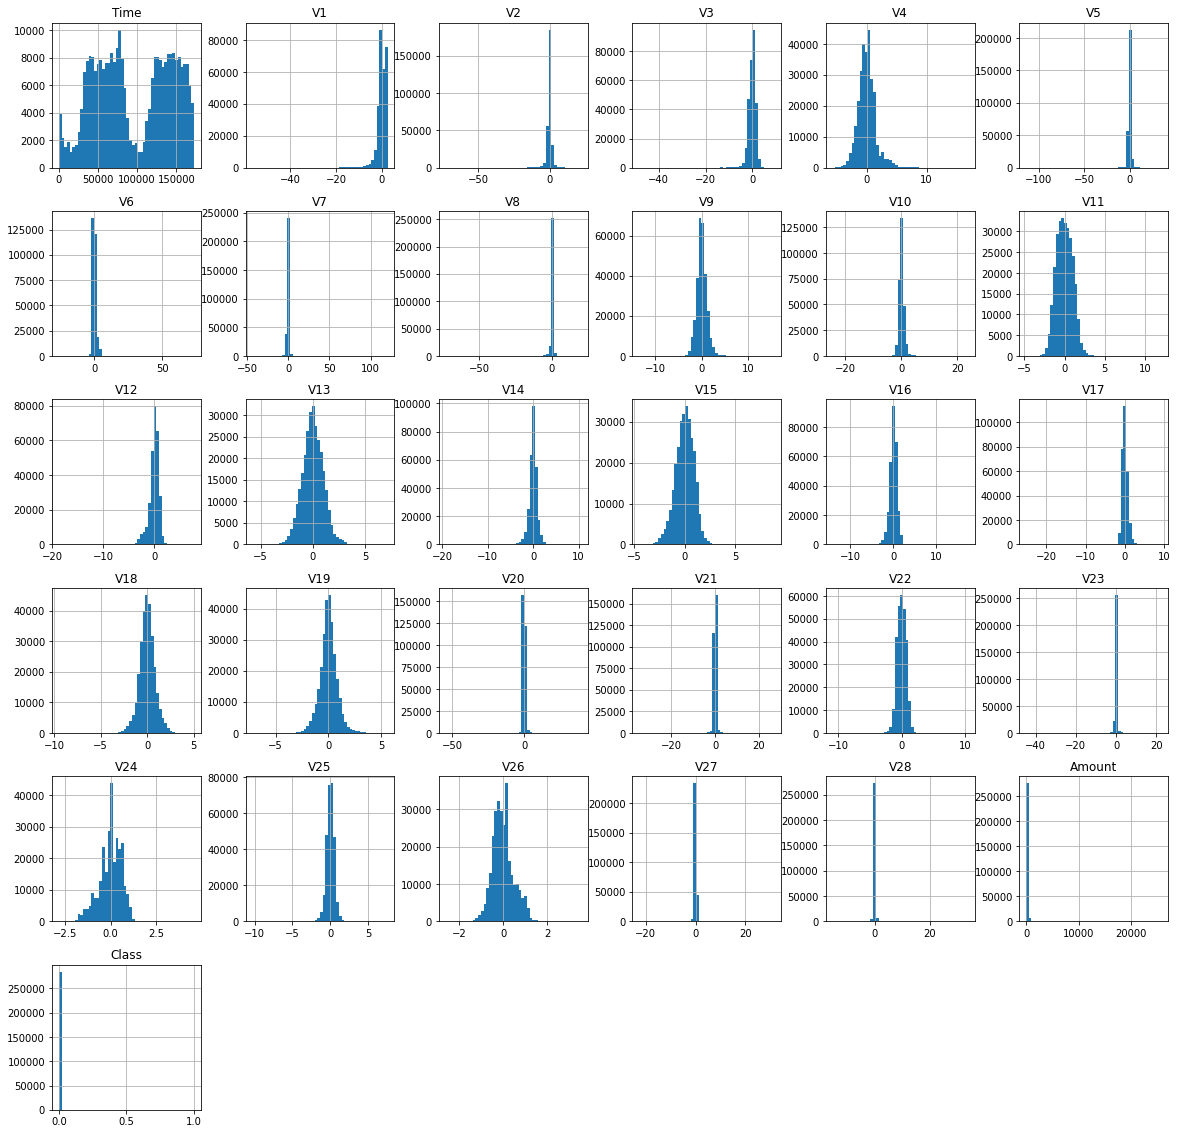

In [12]:
df.hist(figsize=(20,20), bins=50)

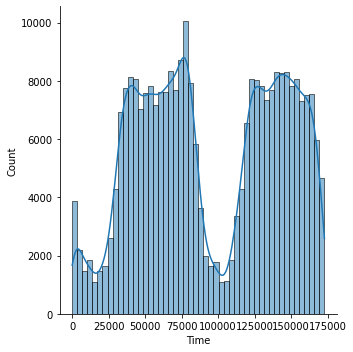

In [13]:
sns.displot(df['Time'], kde=True, bins=50)

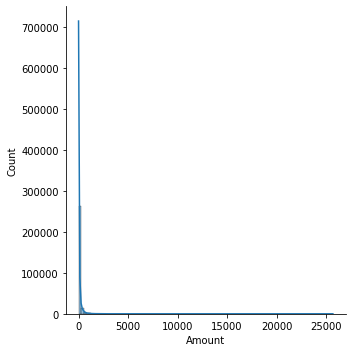

In [14]:
sns.displot(df['Amount'], kde=True, bins=100)

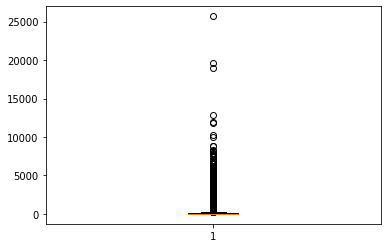

In [15]:
plt.boxplot(df["Amount"])
plt.show()

In [16]:
# memisahkan fitur-fitur dengan target
y = df["Class"]
x = df.drop("Class", axis=1)

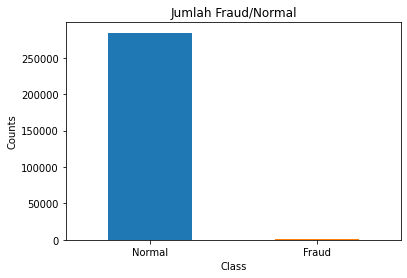

In [17]:
# Membandingkan data fraud dengan yang normal
import matplotlib.pyplot as plt

count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar', color=['C0', 'C1'])
plt.title('Jumlah Fraud/Normal')
plt.xticks(range(2), ['Normal', 'Fraud'], rotation = 0)
plt.xlabel("Class")
plt.ylabel("Counts")
plt.show()

## Data Scaling

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Mengambil daftar fitur
features = x.columns.tolist()

def normalize(x):
    # Menyalin dataset untuk menghindari SettingWithCopyWarning
    X_normalized = x.copy()

    for feature in features:
        # Standardisasi fitur dengan .ravel() untuk menghindari FutureWarning
        X_normalized.loc[:, feature] = scaler.fit_transform(X_normalized[[feature]]).ravel().astype(np.float64)

    return X_normalized

# Normalisasi dataset
x = normalize(x)

In [19]:
x.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
5,-1.996541,-0.217475,0.581675,0.752585,-0.118833,0.305009,-0.022313,0.384936,0.217955,-0.517619,...,0.110215,-0.283522,-0.771427,-0.042273,-0.613273,-0.446584,0.219637,0.628900,0.245636,-0.338556
6,-1.996499,0.627795,0.085389,0.029923,0.849383,0.139020,0.204695,-0.004170,0.067998,0.423218,...,-0.284895,-0.228334,-0.373032,-0.246780,-1.287973,1.439037,-0.533436,0.085492,0.015656,-0.333279
7,-1.996436,-0.328928,0.858692,0.708576,-0.347631,0.687512,0.321345,0.905860,-3.188229,0.560129,...,-0.203317,2.645889,-1.399276,0.092085,-1.072754,-0.796633,-0.107075,-2.990154,-3.288083,-0.190107
8,-1.996436,-0.456573,0.173291,-0.074653,-0.191774,1.934149,2.793594,0.299206,0.712592,-0.356851,...,0.068406,-0.099963,-0.369425,-0.327055,1.670269,0.715943,-0.796633,0.029104,0.431420,0.019392
9,-1.996394,-0.172698,0.678005,0.688781,-0.156927,0.361792,-0.185219,0.526706,0.058223,-0.670587,...,0.264243,-0.336156,-0.873298,-0.193438,-0.635767,-0.133773,0.195342,0.610010,0.251681,-0.338516


## Data Splitting

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Testing set size:", X_test.shape)

print("\nDistribusi di y_train:\n", pd.Series(y_train).value_counts())
print("Distribusi di y_val:\n", pd.Series(y_val).value_counts())
print("Distribusi di y_test:\n", pd.Series(y_test).value_counts())

Training set size: (205060, 30)
Validation set size: (22785, 30)
Testing set size: (56962, 30)

Distribusi di y_train:
 Class
0    204705
1       355
Name: count, dtype: int64
Distribusi di y_val:
 Class
0    22746
1       39
Name: count, dtype: int64
Distribusi di y_test:
 Class
0    56864
1       98
Name: count, dtype: int64


In [21]:
X_train.to_csv("X_train_gain.csv", index=False)
X_val.to_csv("X_val_gain.csv", index=False)
X_test.to_csv("X_test_gain.csv", index=False)

y_train.to_csv("y_train_gain.csv", index=False)
y_val.to_csv("y_val_gain.csv", index=False)
y_test.to_csv("y_test_gain.csv", index=False)

In [22]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


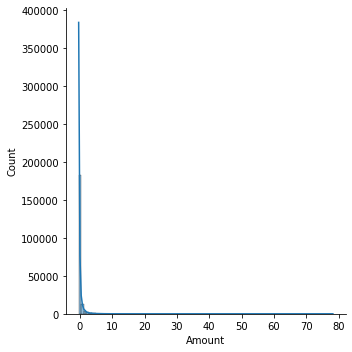

In [23]:
sns.displot(X_train['Amount'], kde=True, bins=100)

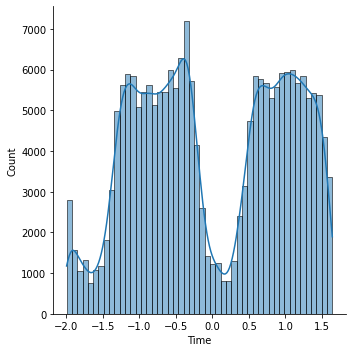

In [24]:
sns.displot(X_train['Time'], kde=True, bins=50)

## Imbalanced Data Handling

data test tidak diberi perlakuan imbalanced handling

In [25]:
!pip install imbalanced-learn==0.12.4

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import imblearn
print(imblearn.__version__)

0.12.4


In [27]:
import sklearn
print(sklearn.__version__)

1.3.2


In [28]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler

### Random Oversampling

In [29]:
# Menentukan jumlah sample yang diinginkan
jumlah_kelas_0 = y_train.value_counts()[0]  # Menghitung jumlah kelas 0
jumlah_kelas_1 = round(jumlah_kelas_0 * 0.01) # Menyamakan jumlah sample kelas 1 dengan jumlah dengan kelas 0

# Oversampling
oversampler = RandomOverSampler(sampling_strategy={0: jumlah_kelas_0, 1: jumlah_kelas_1}, random_state=42)
X_ros, y_ros = oversampler.fit_resample(X_train, y_train)

# Cek distribusi setelah oversampling
print(f"Distribusi sebelum oversampling:\n{y_train.value_counts()}")
print(f"Distribusi setelah oversampling:\n{pd.Series(y_ros).value_counts()}")

Distribusi sebelum oversampling:
Class
0    204705
1       355
Name: count, dtype: int64
Distribusi setelah oversampling:
Class
0    204705
1      2047
Name: count, dtype: int64


### SMOTE

In [30]:
# Menentukan jumlah kelas mayoritas (kelas 0)
jumlah_kelas_0 = y_train.value_counts()[0]
jumlah_kelas_1 = round(jumlah_kelas_0 * 0.01)

# Oversampling menggunakan SMOTE
smote = SMOTE(sampling_strategy={1: jumlah_kelas_1}, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi setelah SMOTE
print(f"Distribusi sebelum SMOTE:\n{y_train.value_counts()}")
print(f"Distribusi setelah SMOTE:\n{pd.Series(y_smote).value_counts()}")

Distribusi sebelum SMOTE:
Class
0    204705
1       355
Name: count, dtype: int64
Distribusi setelah SMOTE:
Class
0    204705
1      2047
Name: count, dtype: int64


### Adasyn

In [31]:
# Menentukan jumlah kelas mayoritas (kelas 0)
jumlah_kelas_0 = y_train.value_counts()[0]
jumlah_kelas_1 = round(jumlah_kelas_0 * 0.01)

# Oversampling menggunakan ADASYN
adasyn = ADASYN(sampling_strategy={1: jumlah_kelas_1}, random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

# Cek distribusi kelas setelah ADASYN
print(f"Distribusi sebelum ADASYN:\n{y_train.value_counts()}")
print(f"Distribusi setelah ADASYN:\n{pd.Series(y_adasyn).value_counts()}")

Distribusi sebelum ADASYN:
Class
0    204705
1       355
Name: count, dtype: int64
Distribusi setelah ADASYN:
Class
0    204705
1      2047
Name: count, dtype: int64


### Random Undersampling

In [32]:
# Menentukan jumlah kelas minoritas (kelas 1)
jumlah_kelas_1 = y_train.value_counts()[1]
# Tentukan jumlah target untuk kelas mayoritas (kelas 0) agar menjadi 1% dari kelas 1
jumlah_kelas_0 = round(jumlah_kelas_1 // 0.0099)

# Pastikan jumlah kelas 0 tidak menjadi 0
jumlah_kelas_0 = max(jumlah_kelas_0, 1)

# Undersampling
undersampler = RandomUnderSampler(sampling_strategy={0: jumlah_kelas_0, 1: jumlah_kelas_1}, random_state=42)
X_rus, y_rus = undersampler.fit_resample(X_train, y_train)

# Cek distribusi setelah undersampling
print(f"Distribusi sebelum undersampling:\n{y_train.value_counts()}")
print(f"Distribusi setelah undersampling:\n{pd.Series(y_rus).value_counts()}")

Distribusi sebelum undersampling:
Class
0    204705
1       355
Name: count, dtype: int64
Distribusi setelah undersampling:
Class
0    35858
1      355
Name: count, dtype: int64


## Hybrid Resampling

In [33]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import resample
import random

### Random Oversampling followed by Random Undersampling

#### 1. ROS + RUS

In [34]:
from sklearn.utils import resample

def ros_to_rus(X, y, PRUS, PROS):
    # Menentukan data berdasarkan kelas
    X_min = X.loc[y[y == 1].index] # kelas minoritas bernilai 1

    Nmin = len(X_min) # jumlah sampel kelas di kelas minor

    # Menentukan PROS_1 dan PRUS_1 jika tidak diberikan
    if PROS is None:
        PROS = (Nmaj / Nmin) - 1  # Default PROS
    if PRUS is None:
        PRUS = 1 - (Nmin / Nmaj)  # Default PRUS

    # 1. Random Oversampling
    NROS = int(Nmin * PROS) # Menghitung jumlah sampel baru untuk oversampling
    X_ros = resample(X_min, replace = True, n_samples = NROS, random_state = 42)

    # Membuat dataset setelah oversampling
    SROS_X = np.vstack((X, X_ros))
    SROS_y = np.hstack((y, np.ones(NROS)))

    print(f"Distribusi setelah ROS:\n{pd.Series(SROS_y).value_counts()}")

    # 2. Random undersampling
    Nmaj = len(SROS_X[SROS_y == 0]) # jumlah kelas mayoritas setelah smote
    NRUS = int(Nmaj * PRUS) # menghitung jumlah sampel yang akan dihapus
    X_rus = resample(SROS_X[SROS_y == 0], replace = False, n_samples = (Nmaj - NRUS), random_state = 42)
    # SROS_X[SROS_y == 0] sama saja dengan X_maj
    # menggabungkan kembali dataset
    S_X = np.vstack((SROS_X[SROS_y == 1], X_rus))
    S_y = np.hstack((np.ones(len(SROS_X[SROS_y == 1])), np.zeros(len(X_rus))))

    return S_X, S_y

# jika ingin memilih prus dan pros diluar default
PRUS_1 = 0.65 # Proporsi random undersampling
PROS_1 = 1 # Proporsi random oversampling
X_ros_to_rus, y_ros_to_rus = ros_to_rus(X_train, y_train, PRUS_1, PROS_1)

print(f"Distribusi sebelum ROS + RUS:\n{y_train.value_counts()}")
print(f"Distribusi setelah ROS + RUS:\n{pd.Series(y_ros_to_rus).value_counts()}")

Distribusi setelah ROS:
0.0    204705
1.0       710
Name: count, dtype: int64
Distribusi sebelum ROS + RUS:
Class
0    204705
1       355
Name: count, dtype: int64
Distribusi setelah ROS + RUS:
0.0    71647
1.0      710
Name: count, dtype: int64


#### 2. SMOTE + RUS

In [35]:
X_train_arr = X_train.to_numpy()
y_train_arr = y_train.to_numpy()

In [36]:
def smote_to_rus(X, y, K=5, PR=0.5, PS=100):
    # Memisahkan data berdasarkan kelas
    X_min = X[y == 1] # kelas minoritas bernilai 1
    X_maj = X[y == 0] # kelas mayoritas bernilai 0

    Nmin = len(X_min) # jumlah sampel kelas di kelas minor
    Nmaj = len(X_maj) # jumlah sampel kelas di kelas mayor

    # 1. smote
    smote_samples = []
    nbrs = NearestNeighbors(n_neighbors=K).fit(X_min)
    for xi in X_min:
        _, indices = nbrs.kneighbors([xi]) # menemukan K tetangga terdekat
        N_hat = int(PS / 100) # banyaknya sampel baru untuk smote

        while N_hat > 0:
            x_bar = X_min[np.random.choice(indices[0])] # pilih salah satu K tetangga
            alpha = np.random.rand() # memilih nilai alpha acak antara 0 dan 1
            x_hat = xi + alpha * (x_bar - xi) # menghitung X̂
            smote_samples.append(x_hat) # menambahkan ke daftar sampel sintetis
            N_hat -= 1

    smote_samples = np.array(smote_samples)
    S_smote = np.vstack((X, smote_samples)) # meggabungkan dataset original dengan smote
    y_smote = np.hstack((y, np.ones(len(smote_samples)))) # menambahkan target untuk smote

    print(f"Distribusi setelah smote:\n{pd.Series(y_smote).value_counts()}")

    # 2. random undersampling
    Nmaj_smote = len(S_smote[y_smote == 0]) # jumlah kelas mayoritas setelah smote
    Ns = int(Nmaj_smote * PR) # jumlah sampel mayoritas yang akan dihapus

    # Menghitung sampel mayoritas secara acak
    X_rus = resample(S_smote[y_smote == 0], replace = False, n_samples = Nmaj_smote - Ns, random_state = 42)

    # Menggabung kelas minoritas smote dan mayoritas rus
    S_smote_rus = np.vstack((X_rus, S_smote[y_smote == 1]))
    y_smote_rus = np.hstack((np.zeros(len(X_rus)), np.ones(len(S_smote[y_smote == 1]))))

    return S_smote_rus, y_smote_rus

X_smote_to_rus, y_smote_to_rus = smote_to_rus(X_train_arr, y_train_arr, K=5, PR=0.65, PS=100)

print("Distribusi sebelum smote + RUS:", np.bincount(y_train.astype(int)))
print("Distribusi setelah smote + RUS:", np.bincount(y_smote_to_rus.astype(int)))

Distribusi setelah smote:
0.0    204705
1.0       710
Name: count, dtype: int64
Distribusi sebelum smote + RUS: [204705    355]
Distribusi setelah smote + RUS: [71647   710]


### Random Undersampling followed by Random Oversampling

#### 3. RUS + ROS

In [37]:
def rus_to_ros(X, y, PRUS, PROS):
    # Memisahkan data berdasarkan kelas
    X_min = X.loc[y[y == 1].index] # kelas minoritas bernilai 1
    X_maj = X.loc[y[y == 0].index] # kelas mayoritas bernilai 0

    Nmaj = len(X_maj) # jumlah sampel kelas di kelas minor

    # Menentukan PROS_1 dan PRUS_1 jika tidak diberikan
    if PROS is None:
        PROS = (Nmaj / Nmin) - 1  # Default PROS
    if PRUS is None:
        PRUS = 1 - (Nmin / Nmaj)  # Default PRUS

    # 1. Random Undersampling
    NRUS = int(Nmaj * PRUS) # hitung jumlah sampel yang akan dihapus
    X_rus = resample(X_maj, replace = False, n_samples = (Nmaj - NRUS), random_state = 42)

    # dataset setelah undersampling
    SRUS_X = np.vstack((X_min, X_rus))
    SRUS_y = np.hstack((np.ones(len(X_min)), np.zeros(len(X_rus))))

    print(f"Distribusi setelah RUS:\n{pd.Series(SRUS_y).value_counts()}")

    # 2. Random oversampling
    Nmin = len(SRUS_X[SRUS_y == 1]) # banyaknya kelas 1 dari SRUS atau sama saja dengan X_min
    NROS = int(Nmin * PROS) # Hitung jumlah sampel baru untuk oversampling
    X_ros = resample(SRUS_X[SRUS_y == 1], replace = True, n_samples = NROS, random_state = 42)

    # Menggabungkan kembali dataset
    SROS_X = np.vstack((SRUS_X, X_ros))
    SROS_y = np.hstack((SRUS_y, np.ones(len(X_ros))))

    return SROS_X, SROS_y

# jika ingin memilih prus dan pros diluar default
PRUS_2 = 0.5 # Proporsi random undersampling
PROS_2 = 2 # Proporsi random oversampling
X_rus_to_ros, y_rus_to_ros = rus_to_ros(X_train, y_train, PRUS_2, PROS_2)

print(f"Distribusi sebelum RUS + ROS:\n{y_train.value_counts()}")
print(f"Distribusi setelah RUS + ROS:\n{pd.Series(y_rus_to_ros).value_counts()}")

Distribusi setelah RUS:
0.0    102353
1.0       355
Name: count, dtype: int64
Distribusi sebelum RUS + ROS:
Class
0    204705
1       355
Name: count, dtype: int64
Distribusi setelah RUS + ROS:
0.0    102353
1.0      1065
Name: count, dtype: int64


#### 4. RUS + SMOTE

In [38]:
def rus_to_smote(X, y, K=5, PR=0.5, PS=100):

    # Memisahkan data berdasarkan kelas
    X_min = X[y == 1]  # Kelas minoritas
    X_maj = X[y == 0]  # Kelas mayoritas

    Nmin = len(X_min)  # Jumlah sampel kelas minoritas
    Nmaj = len(X_maj)  # Jumlah sampel kelas mayoritas

    # 1. Random Undersampling
    Ns = int(Nmaj * PR) # jumlah sampel mayoritas yang akan dihapus
    X_rus = resample(X_maj, replace = False, n_samples = Nmaj - Ns, random_state = 42)

    # Menggabungkan hasil rus
    SRUS = np.vstack((X_min, X_rus))
    SRUS_y = np.hstack((np.ones(len(X_min)), np.zeros(len(X_rus))))

    print(f"Distribusi setelah RUS:\n{pd.Series(SRUS_y).value_counts()}")

    # 2. Smote
    S_Smote = []
    nbrs = NearestNeighbors(n_neighbors=K).fit(X_min)
    for xi in X_min:
        _, indices = nbrs.kneighbors([xi]) # menemukan tetangga terdekat
        N_hat = int(PS / 100)

        while N_hat > 0:
            x_bar = X_min[np.random.choice(indices[0])] # memilih salah satu tetangga
            alpha = np.random.rand() # pilih nilai alpha acak antara 0 dan 1
            x_hat = xi + alpha * (x_bar - xi) # menghitung sampel sintetis
            S_Smote.append(x_hat) # menambah ke daftar smote
            N_hat -= 1

    S_Smote = np.array(S_Smote)

    # Menggabungkan hasil smote dengan RUS
    S_X = np.vstack((SRUS, S_Smote))
    S_y = np.hstack((SRUS_y, np.ones(len(S_Smote))))

    return S_X, S_y

PR = 0.5
PS = 200
X_rus_to_smote, y_rus_to_smote = rus_to_smote(X_train_arr, y_train_arr, K=5, PR=PR, PS=PS)

print("Distribusi sebelum RUS + Smote:", np.bincount(y_train.astype(int)))
print("Distribusi setelah RUS + Smote:", np.bincount(y_rus_to_smote.astype(int)))

Distribusi setelah RUS:
0.0    102353
1.0       355
Name: count, dtype: int64
Distribusi sebelum RUS + Smote: [204705    355]
Distribusi setelah RUS + Smote: [102353   1065]


In [39]:
print(type(X_train))
print(type(X_ros))
print(type(X_rus))
print(type(X_smote))
print(type(X_ros_to_rus))
print(type(X_smote_to_rus))
print(type(X_rus_to_ros))
print(type(X_rus_to_smote))
print(type(X_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [40]:
# Mengubah format data menjadi dataframe
X_ros_to_rus = pd.DataFrame(X_ros_to_rus, columns = X_train.columns)
X_smote_to_rus = pd.DataFrame(X_smote_to_rus, columns = X_train.columns)
X_rus_to_ros = pd.DataFrame(X_rus_to_ros, columns = X_train.columns)
X_rus_to_smote = pd.DataFrame(X_rus_to_smote, columns = X_train.columns)
# Mengubah numpy.ndarray menjadi pandas Series
y_ros_to_rus = pd.Series(y_ros_to_rus)
y_smote_to_rus = pd.Series(y_smote_to_rus)
y_rus_to_ros = pd.Series(y_rus_to_ros)
y_rus_to_smote = pd.Series(y_rus_to_smote)

In [41]:
X_ros.to_csv("X_ros_gain.csv", index=False)
y_ros.to_csv("y_ros_gain.csv", index=False)

X_smote.to_csv("X_smote_gain.csv", index=False)
y_smote.to_csv("y_smote_gain.csv", index=False)

X_adasyn.to_csv("X_adasyn_gain.csv", index=False)
y_adasyn.to_csv("y_adasyn_gain.csv", index=False)

X_rus.to_csv("X_rus_gain.csv", index=False)
y_rus.to_csv("y_rus_gain.csv", index=False)

X_ros_to_rus.to_csv("X_ros_to_rus_gain.csv", index=False)
y_ros_to_rus.to_csv("y_ros_to_rus_gain.csv", index=False)

X_smote_to_rus.to_csv("X_smote_to_rus_gain.csv", index=False)
y_smote_to_rus.to_csv("y_smote_to_rus_gain.csv", index=False)

X_rus_to_ros.to_csv("X_rus_to_ros_gain.csv", index=False)
y_rus_to_ros.to_csv("y_rus_to_ros_gain.csv", index=False)

X_rus_to_smote.to_csv("X_rus_to_smote_gain.csv", index=False)
y_rus_to_smote.to_csv("y_rus_to_smote_gain.csv", index=False)

# **BASELINE MODEL DEVELOPMENT**

## XGBoost

Reference:
- https://xgboosting.com/use-xgboost-feature-importance-for-feature-selection/
- https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

In [42]:
current_time = datetime.now()

# Mencetak waktu dalam format jam:menit:detik
print("Starting Feature Selection with XGBoost")
print(current_time.strftime("%H:%M:%S"))

Starting Feature Selection with XGBoost
05:14:35


In [43]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from sklearn.feature_selection import SelectFromModel
from xgboost import plot_importance

/home/g6421089/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [44]:
def feature_selection_with_importance(X_train, y_train, X_val, y_val, X_test, y_test):

    best_aucpr = 0
    best_recall = 0
    best_features = []
    best_num_features = 0
    results = []

    # Menginisiasi XGBoost model
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Mendapatkan booster dari model yang telah dilatih
    booster = xgb_model.get_booster()

    # Mendapatkan feature importance berdasarkan 'gain'
    gain_importance = booster.get_score(importance_type='gain')

    # Menampilkan hasil gain importance
    print("Feature Importance (Gain):")
    print(gain_importance)

    # Menormalisasi hasilnya, bagi dengan total gain, untuk menjadi threshold
    total_gain = sum(gain_importance.values())
    normalized_gain_importance = {k: v / total_gain for k, v in gain_importance.items()}

    # Menampilkan hasil gain yang dinormalisasi
    print("\nNormalized Feature Importance (Gain):")
    print(normalized_gain_importance)

    # Mengubah ke DataFrame agar lebih mudah dianalisis
    importance_df = pd.DataFrame(list(normalized_gain_importance.items()), columns=['Feature', 'Normalized Gain'])
    threshold = importance_df.sort_values(by='Normalized Gain', ascending=False)

    for thresh in threshold["Normalized Gain"].values:
        # Memilih fitur secara manual berdasarkan threshold importance
        selected_features = importance_df[importance_df["Normalized Gain"] >= thresh]["Feature"].tolist()

        # Membuat data x train dengan fitur terseleksi
        X_train_selected = X_train[selected_features]

        # Melatih model dengan fitur terseleksi
        selection_model = XGBClassifier(random_state=42)
        selection_model.fit(X_train_selected, y_train)

        # Mengevaluasi model
        y_pred_probs = selection_model.predict(X_test[selected_features])
        y_pred = (y_pred_probs >= 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        aucpr_score = average_precision_score(y_test, y_pred)

        # Membandingkan dan mendapatkan skor aucpr terbaik
        if recall > best_recall or (recall == best_recall and aucpr_score > best_aucpr) or (recall == best_recall and aucpr_score == best_aucpr and len(selected_features) > best_num_features):
            best_recall = recall
            best_aucpr = aucpr_score
            best_features = selected_features
            best_num_features = len(selected_features)

        # Menyimpan hasil
        results.append({
            'threshold' : thresh,
            'Selected Features': selected_features,
            'Number of Features': len(selected_features),
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-PR': aucpr_score
        })

    # Mengkonversi hasil ke dataframe
    result_df = pd.DataFrame(results)

    # Membuat data final dengan fitur terseleksi yang menghasilkan aucpr terbaik
    X_selected = X_train[best_features]
    X_val_selected = X_val[best_features]
    X_test_selected = X_test[best_features]

    # Mengkonversi fitur terpilih ke dataframe
    df_X_selected = pd.DataFrame(X_selected)
    df_X_val_selected = pd.DataFrame(X_val_selected)
    df_X_test_selected = pd.DataFrame(X_test_selected)

    df_X_selected = df_X_selected.to_numpy()
    y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

    return xgb_model, result_df, threshold, best_aucpr, best_recall, best_features, X_selected, X_val_selected, X_test_selected, df_X_selected, df_X_val_selected, df_X_test_selected, y_train

Feature Importance (Gain):
{'Time': 1.4186654090881348, 'V1': 1.1108299493789673, 'V2': 1.3466765880584717, 'V3': 1.5325580835342407, 'V4': 2.672177791595459, 'V5': 1.2007856369018555, 'V6': 1.067195177078247, 'V7': 5.596962928771973, 'V8': 1.474143147468567, 'V9': 0.9910394549369812, 'V10': 25.436355590820312, 'V11': 1.2187166213989258, 'V12': 4.79700231552124, 'V13': 1.6544034481048584, 'V14': 30.351966857910156, 'V15': 1.480733871459961, 'V16': 1.3971718549728394, 'V17': 2.5889103412628174, 'V18': 1.7390613555908203, 'V19': 1.3247103691101074, 'V20': 1.5177032947540283, 'V21': 1.1833012104034424, 'V22': 1.4682737588882446, 'V23': 0.8095701336860657, 'V24': 0.8917093276977539, 'V25': 0.6241470575332642, 'V26': 1.688883900642395, 'V27': 1.0904685258865356, 'V28': 1.3429962396621704, 'Amount': 1.08915114402771}

Normalized Feature Importance (Gain):
{'Time': 0.013894008564106816, 'V1': 0.010879154965692745, 'V2': 0.013188970371522004, 'V3': 0.015009441268679735, 'V4': 0.026170555004303

/home/g6421089/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


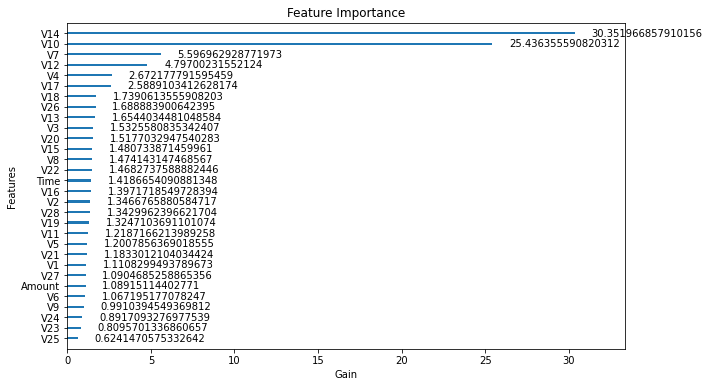

Results for ROS Feature Selection:

   Feature  Normalized Gain
14     V14         0.297259
10     V10         0.249116
7       V7         0.054815
12     V12         0.046980
4       V4         0.026171
17     V17         0.025355
18     V18         0.017032
26     V26         0.016540
13     V13         0.016203
3       V3         0.015009
20     V20         0.014864
15     V15         0.014502
8       V8         0.014437
22     V22         0.014380
0     Time         0.013894
16     V16         0.013684
2       V2         0.013189
28     V28         0.013153
19     V19         0.012974
11     V11         0.011936
5       V5         0.011760
21     V21         0.011589
1       V1         0.010879
27     V27         0.010680
29  Amount         0.010667
6       V6         0.010452
9       V9         0.009706
24     V24         0.008733
23     V23         0.007929
25     V25         0.006113
    threshold                                  Selected Features  \
0    0.297259               

In [45]:
# Seleksi fitur untuk model 1: tidak ada metode penyeimbangan data
start_time0 = time.time()
with tf.device('/GPU:0'):
    xgb_model, result_df, threshold_df, best_aucpr, best_recall, best_features, X_selected, X_val_selected, X_test_selected, df_X_selected, df_X_val_selected, df_X_test_selected, y_train = feature_selection_with_importance(
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test
    )
end_time0 = time.time() - start_time0

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model, ax=ax, importance_type='gain',
                    grid=False, show_values=True)
plt.xlabel('Gain')
plt.title('Feature Importance')
plt.show()

print("Results for ROS Feature Selection:\n")
print(threshold_df)
print(result_df)
print("Best recall:", best_recall)
print("Best aucpr:", best_aucpr)
print("Best features:", best_features)
print("Time Taken:", end_time0)

### Random Oversampling

Feature Importance (Gain):
{'Time': 3.5994532108306885, 'V1': 7.514806270599365, 'V2': 3.12749981880188, 'V3': 6.2273454666137695, 'V4': 12.28064250946045, 'V5': 6.03753662109375, 'V6': 2.0128886699676514, 'V7': 8.142632484436035, 'V8': 3.359712839126587, 'V9': 1.260182499885559, 'V10': 26.776166915893555, 'V11': 3.396206855773926, 'V12': 10.847833633422852, 'V13': 5.180122375488281, 'V14': 98.45661163330078, 'V15': 2.782761573791504, 'V16': 3.2359583377838135, 'V17': 256.1446228027344, 'V18': 3.1443190574645996, 'V19': 3.6990575790405273, 'V20': 5.348249912261963, 'V21': 5.773487567901611, 'V22': 3.1139628887176514, 'V23': 1.439799427986145, 'V24': 2.952892780303955, 'V25': 4.503111839294434, 'V26': 5.6647162437438965, 'V27': 2.0671536922454834, 'V28': 3.467148780822754, 'Amount': 3.578859567642212}

Normalized Feature Importance (Gain):
{'Time': 0.007125714730363106, 'V1': 0.014876805615116454, 'V2': 0.006191404700299291, 'V3': 0.01232806338167926, 'V4': 0.024311569036284352, 'V5': 0

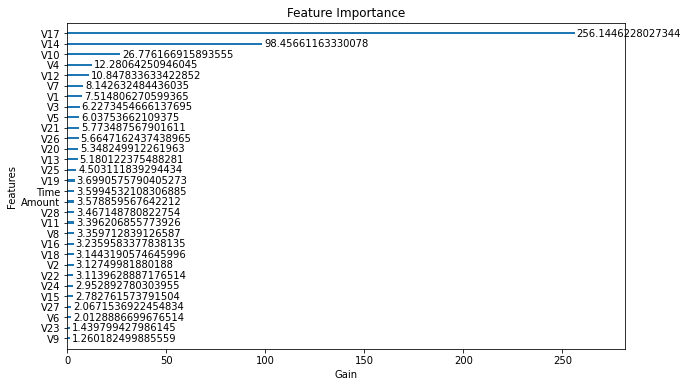

Results for ROS Feature Selection:

   Feature  Normalized Gain
17     V17         0.507081
14     V14         0.194911
10     V10         0.053008
4       V4         0.024312
12     V12         0.021475
7       V7         0.016120
1       V1         0.014877
3       V3         0.012328
5       V5         0.011952
21     V21         0.011430
26     V26         0.011214
20     V20         0.010588
13     V13         0.010255
25     V25         0.008915
19     V19         0.007323
0     Time         0.007126
29  Amount         0.007085
28     V28         0.006864
11     V11         0.006723
8       V8         0.006651
16     V16         0.006406
18     V18         0.006225
2       V2         0.006191
22     V22         0.006165
24     V24         0.005846
15     V15         0.005509
27     V27         0.004092
6       V6         0.003985
23     V23         0.002850
9       V9         0.002495
    threshold                                  Selected Features  \
0    0.507081               

In [46]:
# # Seleksi fitur untuk model 2: Random Oversampling
start_time1 = time.time()
with tf.device('/GPU:0'):
    xgb_model_ros, result_ros_df, threshold_df_ros, best_aucpr_ros, best_recall_ros, best_features_ros, X_ros_selected, X_val_ros_selected, X_test_ros_selected, df_X_ros_selected, df_X_ros_val_selected, df_X_ros_test_selected, y_ros = feature_selection_with_importance(
        X_train=X_ros,
        y_train=y_ros,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test
    )
end_time1 = time.time() - start_time1

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model_ros, ax=ax, importance_type='gain',
                    grid=False, show_values=True)
plt.xlabel('Gain')
plt.title('Feature Importance')
plt.show()

print("Results for ROS Feature Selection:\n")
print(threshold_df_ros)
print(result_ros_df)
print("Best recall:", best_recall_ros)
print("Best aucpr:", best_aucpr_ros)
print("Best features:", best_features_ros)
print("Time Taken:", end_time1)

### SMOTE

Feature Importance (Gain):
{'Time': 4.62985372543335, 'V1': 5.335511207580566, 'V2': 3.279266357421875, 'V3': 4.021718978881836, 'V4': 9.872258186340332, 'V5': 2.3773694038391113, 'V6': 2.1500301361083984, 'V7': 7.94357967376709, 'V8': 4.545366287231445, 'V9': 4.300933361053467, 'V10': 21.04135513305664, 'V11': 4.179053783416748, 'V12': 8.333120346069336, 'V13': 4.04481840133667, 'V14': 72.34629821777344, 'V15': 3.581251382827759, 'V16': 3.312978506088257, 'V17': 186.97239685058594, 'V18': 2.481945753097534, 'V19': 4.067641735076904, 'V20': 1.9963113069534302, 'V21': 5.1397271156311035, 'V22': 2.902310848236084, 'V23': 3.744574546813965, 'V24': 3.1355416774749756, 'V25': 2.6021623611450195, 'V26': 5.4089155197143555, 'V27': 3.7939748764038086, 'V28': 3.6080117225646973, 'Amount': 2.460961103439331}

Normalized Feature Importance (Gain):
{'Time': 0.011762563660888924, 'V1': 0.013555350549801342, 'V2': 0.00833127385392198, 'V3': 0.010217542134309011, 'V4': 0.025081368069072414, 'V5': 0.0

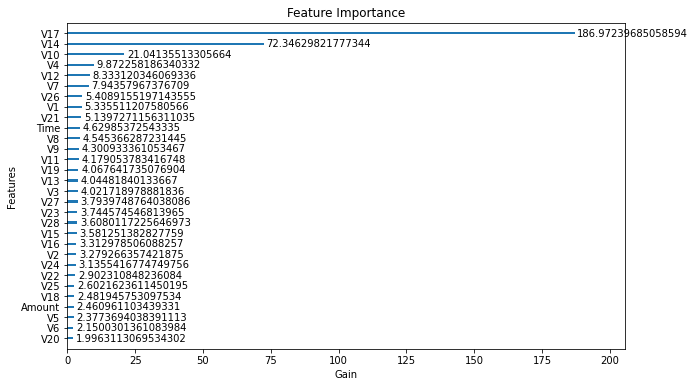

Results for SMOTE Feature Selection:

   Feature  Normalized Gain
17     V17         0.475020
14     V14         0.183802
10     V10         0.053457
4       V4         0.025081
12     V12         0.021171
7       V7         0.020181
26     V26         0.013742
1       V1         0.013555
21     V21         0.013058
0     Time         0.011763
8       V8         0.011548
9       V9         0.010927
11     V11         0.010617
19     V19         0.010334
13     V13         0.010276
3       V3         0.010218
27     V27         0.009639
23     V23         0.009513
28     V28         0.009166
15     V15         0.009098
16     V16         0.008417
2       V2         0.008331
24     V24         0.007966
22     V22         0.007374
25     V25         0.006611
18     V18         0.006306
29  Amount         0.006252
5       V5         0.006040
6       V6         0.005462
20     V20         0.005072
    threshold                                  Selected Features  \
0    0.475020             

In [47]:
# Seleksi fitur untuk model 3: smote
start_time2 = time.time()
with tf.device('/GPU:0'):
    xgb_model_smote, result_smote_df, threshold_df_smote, best_aucpr_smote, best_recall_smote, best_features_smote, X_smote_selected, X_val_smote_selected, X_test_smote_selected, df_X_smote_selected, df_X_smote_val_selected, df_X_smote_test_selected, y_smote= feature_selection_with_importance(
        X_train=X_smote,
        y_train=y_smote,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test
    )
end_time2 = time.time() - start_time2

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model_smote, ax=ax, importance_type='gain',
                grid=False, show_values=True)
plt.xlabel('Gain')
plt.title('Feature Importance')
plt.show()

print("Results for SMOTE Feature Selection:\n")
print(threshold_df_smote)
print(result_smote_df)
print("Best recall:", best_recall_smote)
print("Best aucpr:", best_aucpr_smote)
print("Best features:", best_features_smote)
print("Time Taken:", end_time2)

### ADASYN

Feature Importance (Gain):
{'Time': 8.614361763000488, 'V1': 10.069725036621094, 'V2': 6.52520751953125, 'V3': 7.783504009246826, 'V4': 27.168140411376953, 'V5': 6.59570837020874, 'V6': 7.481170177459717, 'V7': 9.346564292907715, 'V8': 10.703028678894043, 'V9': 8.19237232208252, 'V10': 9.885030746459961, 'V11': 7.959554672241211, 'V12': 11.234207153320312, 'V13': 8.253639221191406, 'V14': 47.84868621826172, 'V15': 5.203917980194092, 'V16': 6.363065242767334, 'V17': 81.2789306640625, 'V18': 6.06081485748291, 'V19': 8.698248863220215, 'V20': 4.437446117401123, 'V21': 11.858637809753418, 'V22': 4.759909152984619, 'V23': 5.10971736907959, 'V24': 7.12111234664917, 'V25': 3.9267807006835938, 'V26': 8.061508178710938, 'V27': 11.82691764831543, 'V28': 4.691835403442383, 'Amount': 6.740798473358154}

Normalized Feature Importance (Gain):
{'Time': 0.023678804132145126, 'V1': 0.027679246979251258, 'V2': 0.0179362226741176, 'V3': 0.02139497643207017, 'V4': 0.0746786695444677, 'V5': 0.0181300125195

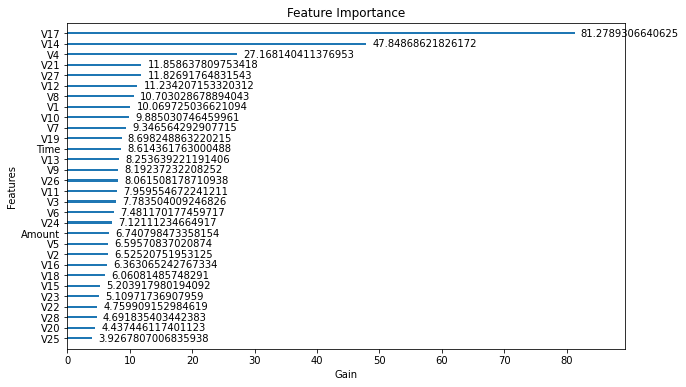

Results for ADASYN Feature Selection:

   Feature  Normalized Gain
17     V17         0.223416
14     V14         0.131525
4       V4         0.074679
21     V21         0.032597
27     V27         0.032509
12     V12         0.030880
8       V8         0.029420
1       V1         0.027679
10     V10         0.027172
7       V7         0.025691
19     V19         0.023909
0     Time         0.023679
13     V13         0.022687
9       V9         0.022519
26     V26         0.022159
11     V11         0.021879
3       V3         0.021395
6       V6         0.020564
24     V24         0.019574
29  Amount         0.018529
5       V5         0.018130
2       V2         0.017936
16     V16         0.017491
18     V18         0.016660
15     V15         0.014304
23     V23         0.014045
22     V22         0.013084
28     V28         0.012897
20     V20         0.012197
25     V25         0.010794
    threshold                                  Selected Features  \
0    0.223416            

In [48]:
# Seleksi fitur untuk model 4: adasyn
start_time3 = time.time()
with tf.device('/GPU:0'):
    xgb_model_adasyn, result_adasyn_df, threshold_df_adasyn, best_aucpr_adasyn, best_recall_adasyn, best_features_adasyn, X_adasyn_selected, X_val_adasyn_selected, X_test_adasyn_selected, df_X_adasyn_selected, df_X_adasyn_val_selected, df_X_adasyn_test_selected, y_adasyn = feature_selection_with_importance(
        X_train=X_adasyn,
        y_train=y_adasyn,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test
    )
end_time3 = time.time() - start_time3

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model_adasyn, ax=ax, importance_type='gain',
                grid=False, show_values=True)
plt.xlabel('Gain')
plt.title('Feature Importance')
plt.show()

print("Results for ADASYN Feature Selection:\n")
print(threshold_df_adasyn)
print(result_adasyn_df)
print("Best recall:", best_recall_adasyn)
print("Best aucpr:", best_aucpr_adasyn)
print("Best features:", best_features_adasyn)
print("Time Taken:", end_time3)

### Random Undersampling

Feature Importance (Gain):
{'Time': 1.1971163749694824, 'V1': 1.0330982208251953, 'V2': 1.4902702569961548, 'V3': 1.5135607719421387, 'V4': 2.9092929363250732, 'V5': 1.2034927606582642, 'V6': 1.0464732646942139, 'V7': 3.413097381591797, 'V8': 1.1634516716003418, 'V9': 9.212190628051758, 'V10': 3.2047741413116455, 'V11': 1.5473979711532593, 'V12': 2.230558156967163, 'V13': 1.3553096055984497, 'V14': 23.66217041015625, 'V15': 1.1191071271896362, 'V16': 0.9948343634605408, 'V17': 55.86098861694336, 'V18': 1.2438626289367676, 'V19': 0.8989629149436951, 'V20': 0.9923669099807739, 'V21': 0.8916692733764648, 'V22': 0.8571183681488037, 'V23': 0.6788355112075806, 'V24': 0.6419431567192078, 'V25': 0.5729343891143799, 'V26': 1.2165130376815796, 'V27': 1.023189663887024, 'V28': 1.0571199655532837, 'Amount': 1.1755963563919067}

Normalized Feature Importance (Gain):
{'Time': 0.00954582711826894, 'V1': 0.008237943460125123, 'V2': 0.01188344135142765, 'V3': 0.012069160328979426, 'V4': 0.0231987532601

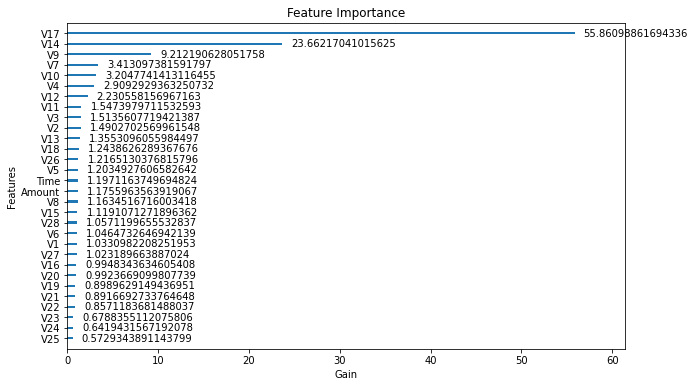

Results for RUS Feature Selection:

   Feature  Normalized Gain
17     V17         0.445437
14     V14         0.188683
9       V9         0.073458
7       V7         0.027216
10     V10         0.025555
4       V4         0.023199
12     V12         0.017787
11     V11         0.012339
3       V3         0.012069
2       V2         0.011883
13     V13         0.010807
18     V18         0.009919
26     V26         0.009700
5       V5         0.009597
0     Time         0.009546
29  Amount         0.009374
8       V8         0.009277
15     V15         0.008924
28     V28         0.008429
6       V6         0.008345
1       V1         0.008238
27     V27         0.008159
16     V16         0.007933
20     V20         0.007913
19     V19         0.007168
21     V21         0.007110
22     V22         0.006835
23     V23         0.005413
24     V24         0.005119
25     V25         0.004569
    threshold                                  Selected Features  \
0    0.445437               

In [49]:
# Seleksi fitur untuk model 5: rus
start_time4 = time.time()
with tf.device('/GPU:0'):
    xgb_model_rus, result_rus_df, threshold_df_rus, best_aucpr_rus, best_recall_rus, best_features_rus, X_rus_selected, X_val_rus_selected, X_test_rus_selected, df_X_rus_selected, df_X_rus_val_selected, df_X_rus_test_selected, y_rus = feature_selection_with_importance(
        X_train=X_rus,
        y_train=y_rus,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test
    )
end_time4 = time.time() - start_time4

# Plot feature importance with feature names
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model_rus, ax=ax, importance_type='gain',
                grid=False, show_values=True)
plt.xlabel('Gain')
plt.title('Feature Importance')
plt.show()

print("Results for RUS Feature Selection:\n")
print(threshold_df_rus)
print(result_rus_df)
print("Best recall:", best_recall_rus)
print("Best aucpr:", best_aucpr_rus)
print("Best features:", best_features_rus)
print("Time Taken:", end_time4)

### Oversampling followed by undersampling

#### 1. ROS + RUS

Feature Importance (Gain):
{'Time': 1.9149425029754639, 'V1': 2.9045286178588867, 'V2': 1.1716063022613525, 'V3': 1.4882205724716187, 'V4': 5.449455261230469, 'V5': 1.1604493856430054, 'V6': 1.89359450340271, 'V7': 5.118346691131592, 'V8': 1.6855095624923706, 'V9': 0.892996609210968, 'V10': 10.418760299682617, 'V11': 1.9018657207489014, 'V12': 3.5180680751800537, 'V13': 3.061392307281494, 'V14': 36.6627197265625, 'V15': 2.2800304889678955, 'V16': 1.9547593593597412, 'V17': 119.87506866455078, 'V18': 2.487409830093384, 'V19': 1.797232985496521, 'V20': 1.0414141416549683, 'V21': 1.7671141624450684, 'V22': 1.3291696310043335, 'V23': 1.5193849802017212, 'V24': 0.860383152961731, 'V25': 0.5571839213371277, 'V26': 2.2439565658569336, 'V27': 1.3020883798599243, 'V28': 1.1716889142990112, 'Amount': 2.278794050216675}

Normalized Feature Importance (Gain):
{'Time': 0.008637222534980242, 'V1': 0.01310068578700675, 'V2': 0.005284453366246207, 'V3': 0.006712521261395679, 'V4': 0.02457941045881602,

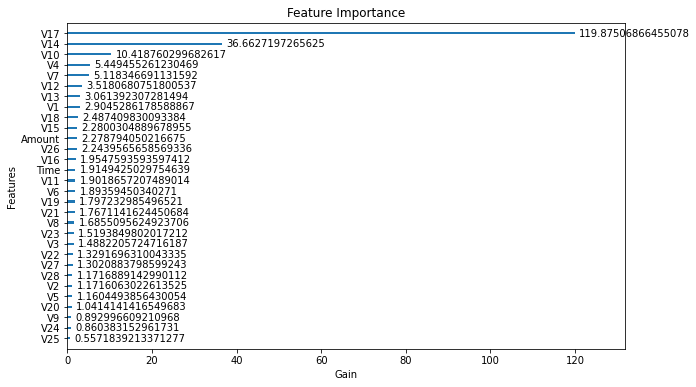

Results for ROS to RUS Feature Selection:

   Feature  Normalized Gain
17     V17         0.540689
14     V14         0.165365
10     V10         0.046993
4       V4         0.024579
7       V7         0.023086
12     V12         0.015868
13     V13         0.013808
1       V1         0.013101
18     V18         0.011219
15     V15         0.010284
29  Amount         0.010278
26     V26         0.010121
16     V16         0.008817
0     Time         0.008637
11     V11         0.008578
6       V6         0.008541
19     V19         0.008106
21     V21         0.007970
8       V8         0.007602
23     V23         0.006853
3       V3         0.006713
22     V22         0.005995
27     V27         0.005873
28     V28         0.005285
2       V2         0.005284
5       V5         0.005234
20     V20         0.004697
9       V9         0.004028
24     V24         0.003881
25     V25         0.002513
    threshold                                  Selected Features  \
0    0.540689        

In [50]:
# Seleksi fitur untuk model 6: ROS + RUS
start_time5 = time.time()
with tf.device('/GPU:0'):
    xgb_model_ros_to_rus, result_ros_to_rus_df, threshold_df_ros_to_rus, best_aucpr_ros_to_rus, best_recall_ros_to_rus, best_features_ros_to_rus, X_ros_to_rus_selected, X_val_ros_to_rus_selected, X_test_ros_to_rus_selected, df_X_ros_to_rus_selected, df_X_ros_to_rus_val_selected, df_X_ros_to_rus_test_selected, y_ros_to_rus = feature_selection_with_importance(
        X_train=X_ros_to_rus,
        y_train=y_ros_to_rus,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test
    )
end_time5 = time.time() - start_time5

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model_ros_to_rus, ax=ax, importance_type='gain',
                grid=False, show_values=True)
plt.xlabel('Gain')
plt.title('Feature Importance')
plt.show()

print("Results for ROS to RUS Feature Selection:\n")
print(threshold_df_ros_to_rus)
print(result_ros_to_rus_df)
print("Best recall:", best_recall_ros_to_rus)
print("Best aucpr:", best_aucpr_ros_to_rus)
print("Best features:", best_features_ros_to_rus)
print("Time Taken:", end_time5)

#### 2. SMOTE + RUS

Feature Importance (Gain):
{'Time': 1.5236119031906128, 'V1': 2.3033554553985596, 'V2': 0.997373640537262, 'V3': 1.7984883785247803, 'V4': 4.027365684509277, 'V5': 1.7220065593719482, 'V6': 2.062746047973633, 'V7': 5.8212056159973145, 'V8': 2.6525113582611084, 'V9': 1.096533179283142, 'V10': 11.385269165039062, 'V11': 1.8873658180236816, 'V12': 3.3939995765686035, 'V13': 2.4339284896850586, 'V14': 34.97800827026367, 'V15': 1.3127061128616333, 'V16': 1.572020173072815, 'V17': 116.05870056152344, 'V18': 2.1703732013702393, 'V19': 1.4802566766738892, 'V20': 1.3035024404525757, 'V21': 1.7175073623657227, 'V22': 1.1126383543014526, 'V23': 1.0394827127456665, 'V24': 1.6197751760482788, 'V25': 0.7897968292236328, 'V26': 2.0671536922454834, 'V27': 1.4335306882858276, 'V28': 1.569385051727295, 'Amount': 1.4978381395339966}

Normalized Feature Importance (Gain):
{'Time': 0.00709222637991992, 'V1': 0.010721836898819769, 'V2': 0.004642651865112259, 'V3': 0.0083717426304178, 'V4': 0.018746892886204

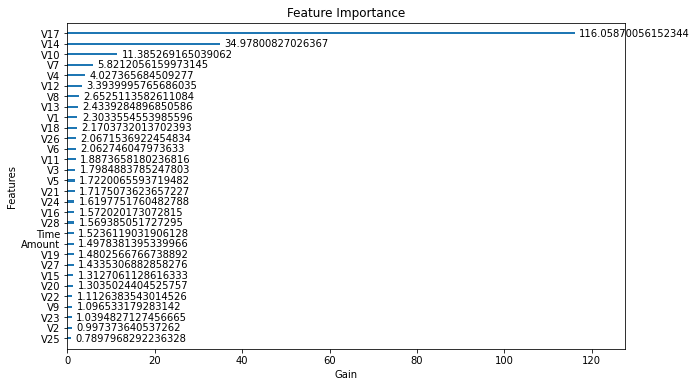

Results for SMOTE to RUS Feature Selection:

   Feature  Normalized Gain
17     V17         0.540239
14     V14         0.162818
10     V10         0.052997
7       V7         0.027097
4       V4         0.018747
12     V12         0.015799
8       V8         0.012347
13     V13         0.011330
1       V1         0.010722
18     V18         0.010103
26     V26         0.009622
6       V6         0.009602
11     V11         0.008785
3       V3         0.008372
5       V5         0.008016
21     V21         0.007995
24     V24         0.007540
16     V16         0.007318
28     V28         0.007305
0     Time         0.007092
29  Amount         0.006972
19     V19         0.006890
27     V27         0.006673
15     V15         0.006110
20     V20         0.006068
22     V22         0.005179
9       V9         0.005104
23     V23         0.004839
2       V2         0.004643
25     V25         0.003676
    threshold                                  Selected Features  \
0    0.540239      

In [51]:
# Seleksi fitur untuk model 7: SMOTE + RUS
start_time6 = time.time()
with tf.device('/GPU:0'):
    xgb_model_smote_to_rus, result_smote_to_rus_df, threshold_df_smote_to_rus, best_aucpr_smote_to_rus, best_recall_smote_to_rus, best_features_smote_to_rus, X_smote_to_rus_selected, X_val_smote_to_rus_selected, X_test_smote_to_rus_selected, df_X_smote_to_rus_selected, df_X_smote_to_rus_val_selected, df_X_smote_to_rus_test_selected, y_smote_to_rus = feature_selection_with_importance(
        X_train=X_smote_to_rus,
        y_train=y_smote_to_rus,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test
    )
end_time6 = time.time() - start_time6

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model_smote_to_rus, ax=ax, importance_type='gain',
                grid=False, show_values=True)
plt.xlabel('Gain')
plt.title('Feature Importance')
plt.show()

print("Results for SMOTE to RUS Feature Selection:\n")
print(threshold_df_smote_to_rus)
print(result_smote_to_rus_df)
print("Best recall:", best_recall_smote_to_rus)
print("Best aucpr:", best_aucpr_smote_to_rus)
print("Best features:", best_features_smote_to_rus)
print("Time Taken:", end_time6)

### Undersampling followed by oversampling

#### 3. RUS + ROS

Feature Importance (Gain):
{'Time': 2.7467312812805176, 'V1': 3.289297342300415, 'V2': 1.853424072265625, 'V3': 1.812057614326477, 'V4': 6.698040008544922, 'V5': 1.7441647052764893, 'V6': 1.493285059928894, 'V7': 5.084781646728516, 'V8': 3.2587921619415283, 'V9': 9.54878044128418, 'V10': 9.667187690734863, 'V11': 2.3013856410980225, 'V12': 4.714776515960693, 'V13': 4.221262454986572, 'V14': 56.656211853027344, 'V15': 4.154758930206299, 'V16': 2.3981456756591797, 'V17': 141.18101501464844, 'V18': 1.9791889190673828, 'V19': 1.7539596557617188, 'V20': 1.7913236618041992, 'V21': 2.2497482299804688, 'V22': 0.9526909589767456, 'V23': 1.6799395084381104, 'V24': 1.192008137702942, 'V25': 1.2509452104568481, 'V26': 3.2393593788146973, 'V27': 0.7807775139808655, 'V28': 2.0816872119903564, 'Amount': 2.0868046283721924}

Normalized Feature Importance (Gain):
{'Time': 0.009676272773266104, 'V1': 0.011587641839372026, 'V2': 0.006529301577480476, 'V3': 0.00638357449692805, 'V4': 0.023596069484713152,

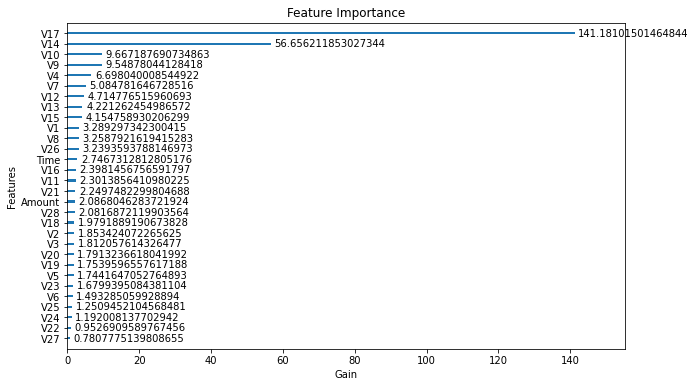

Results for RUS to ROS Feature Selection:

   Feature  Normalized Gain
17     V17         0.497357
14     V14         0.199590
10     V10         0.034056
9       V9         0.033639
4       V4         0.023596
7       V7         0.017913
12     V12         0.016609
13     V13         0.014871
15     V15         0.014637
1       V1         0.011588
8       V8         0.011480
26     V26         0.011412
0     Time         0.009676
16     V16         0.008448
11     V11         0.008107
21     V21         0.007925
29  Amount         0.007351
28     V28         0.007333
18     V18         0.006972
2       V2         0.006529
3       V3         0.006384
20     V20         0.006311
19     V19         0.006179
5       V5         0.006144
23     V23         0.005918
6       V6         0.005261
25     V25         0.004407
24     V24         0.004199
22     V22         0.003356
27     V27         0.002751
    threshold                                  Selected Features  \
0    0.497357        

In [52]:
# Seleksi fitur untuk model 8: RUS + ROS
start_time7 = time.time()
with tf.device('/GPU:0'):
    xgb_model_rus_to_ros, result_rus_to_ros_df, threshold_df_rus_to_ros, best_aucpr_rus_to_ros, best_recall_rus_to_ros, best_features_rus_to_ros, X_rus_to_ros_selected, X_val_rus_to_ros_selected, X_test_rus_to_ros_selected, df_X_rus_to_ros_selected, df_X_rus_to_ros_val_selected, df_X_rus_to_ros_test_selected, y_rus_to_ros = feature_selection_with_importance(
        X_train=X_rus_to_ros,
        y_train=y_rus_to_ros,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test
    )
end_time7 = time.time() - start_time7

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model_rus_to_ros, ax=ax, importance_type='gain',
                grid=False, show_values=True)
plt.xlabel('Gain')
plt.title('Feature Importance')
plt.show()

print("Results for RUS to ROS Feature Selection:\n")
print(threshold_df_rus_to_ros)
print(result_rus_to_ros_df)
print("Best recall:", best_recall_rus_to_ros)
print("Best aucpr:", best_aucpr_rus_to_ros)
print("Best features:", best_features_rus_to_ros)
print("Time Taken:", end_time7)

#### 4. RUS + Smote

Feature Importance (Gain):
{'Time': 2.335843801498413, 'V1': 2.3503212928771973, 'V2': 1.9457000494003296, 'V3': 3.5088062286376953, 'V4': 6.234071254730225, 'V5': 2.193690776824951, 'V6': 3.2902491092681885, 'V7': 6.478331565856934, 'V8': 2.88604474067688, 'V9': 6.054742336273193, 'V10': 8.102365493774414, 'V11': 2.56695818901062, 'V12': 4.4509711265563965, 'V13': 2.796111583709717, 'V14': 47.21086883544922, 'V15': 2.4195687770843506, 'V16': 1.519964337348938, 'V17': 145.89285278320312, 'V18': 1.3933072090148926, 'V19': 1.961626648902893, 'V20': 1.7322474718093872, 'V21': 2.852078676223755, 'V22': 1.3173975944519043, 'V23': 2.1119651794433594, 'V24': 1.4952725172042847, 'V25': 1.1235911846160889, 'V26': 2.498401403427124, 'V27': 2.9330413341522217, 'V28': 1.7896841764450073, 'Amount': 1.9915504455566406}

Normalized Feature Importance (Gain):
{'Time': 0.008480481894843522, 'V1': 0.008533043672922078, 'V2': 0.007064031435300084, 'V3': 0.012739022907005954, 'V4': 0.022633332063124265, '

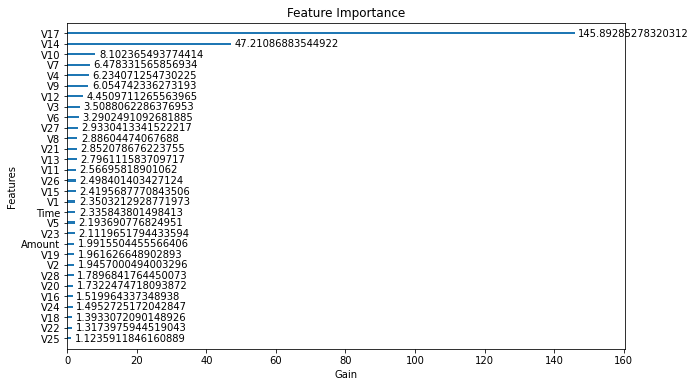

Results for RUS to SMOTE Feature Selection:

   Feature  Normalized Gain
17     V17         0.529677
14     V14         0.171403
10     V10         0.029416
7       V7         0.023520
4       V4         0.022633
9       V9         0.021982
12     V12         0.016160
3       V3         0.012739
6       V6         0.011946
27     V27         0.010649
8       V8         0.010478
21     V21         0.010355
13     V13         0.010152
11     V11         0.009320
26     V26         0.009071
15     V15         0.008784
1       V1         0.008533
0     Time         0.008480
5       V5         0.007964
23     V23         0.007668
29  Amount         0.007230
19     V19         0.007122
2       V2         0.007064
28     V28         0.006498
20     V20         0.006289
16     V16         0.005518
24     V24         0.005429
18     V18         0.005059
22     V22         0.004783
25     V25         0.004079
    threshold                                  Selected Features  \
0    0.529677      

In [53]:
# Seleksi fitur untuk model 9: SMOTE + RUS
start_time8 = time.time()
with tf.device('/GPU:0'):
    xgb_model_rus_to_smote, result_rus_to_smote_df, threshold_df_rus_to_smote, best_aucpr_rus_to_smote, best_recall_rus_to_smote, best_features_rus_to_smote, X_rus_to_smote_selected, X_val_rus_to_smote_selected, X_test_rus_to_smote_selected, df_X_rus_to_smote_selected, df_X_rus_to_smote_val_selected, df_X_rus_to_smote_test_selected, y_rus_to_smote = feature_selection_with_importance(
        X_train=X_rus_to_smote,
        y_train=y_rus_to_smote,
        X_val=X_val,
        y_val=y_val,
        X_test=X_test,
        y_test=y_test
    )
end_time8 = time.time() - start_time8

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model_rus_to_smote, ax=ax, importance_type='gain',
                grid=False, show_values=True)
plt.xlabel('Gain')
plt.title('Feature Importance')
plt.show()

print("Results for RUS to SMOTE Feature Selection:\n")
print(threshold_df_rus_to_smote)
print(result_rus_to_smote_df)
print("Best recall:", best_recall_rus_to_smote)
print("Best aucpr:", best_aucpr_rus_to_smote)
print("Best features:", best_features_rus_to_smote)
print("Time Taken:", end_time8)

In [54]:
current_time = datetime.now()

# Mencetak waktu dalam format jam:menit:detik
print("End of feature selection")
print(current_time.strftime("%H:%M:%S"))

End of feature selection
05:16:16


## DNN Modelling

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.metrics import AUC, Recall, Precision, Metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [56]:
class F1Score(Metric):

    def __init__(self, name="f1_score", **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.tp = self.add_weight(name="tp", initializer="zeros")
        self.fp = self.add_weight(name="fp", initializer="zeros")
        self.fn = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)  # Konversi y_true ke float32
        y_pred = tf.round(y_pred)  # Konversi probabilitas ke 0/1

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_state(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)
    

def build_dnn_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer
    ])

    optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), F1Score(name='f1_score'), AUC(name='aucpr', curve='PR')])

    return model

In [57]:
input_shape = df_X_selected.shape[1]
model = build_dnn_model(input_shape)

start_time00 = time.time()
    # train model
with tf.device('/GPU:0'):
    model.fit(df_X_selected, y_train, epochs=10, batch_size=32, verbose=1, shuffle=False)
    
end_time00 = time.time()

training_time = end_time0 + (end_time00 - start_time00)
print(f"Training time before hyperparameter tuning: {training_time:.2f} seconds")

Epoch 1/10
6409/6409 [==============================] - 17s 2ms/step - loss: 0.0055 - accuracy: 0.9991 - precision: 0.7449 - recall: 0.7239 - f1_score: 0.7343 - aucpr: 0.6916
Epoch 2/10
6409/6409 [==============================] - 16s 2ms/step - loss: 0.0029 - accuracy: 0.9994 - precision: 0.8778 - recall: 0.7690 - f1_score: 0.8198 - aucpr: 0.8111
Epoch 3/10
6409/6409 [==============================] - 16s 2ms/step - loss: 0.0026 - accuracy: 0.9994 - precision: 0.8951 - recall: 0.7690 - f1_score: 0.8273 - aucpr: 0.8417
Epoch 4/10
6409/6409 [==============================] - 16s 2ms/step - loss: 0.0024 - accuracy: 0.9994 - precision: 0.8960 - recall: 0.7521 - f1_score: 0.8178 - aucpr: 0.8569
Epoch 5/10
6409/6409 [==============================] - 16s 2ms/step - loss: 0.0021 - accuracy: 0.9995 - precision: 0.9167 - recall: 0.7746 - f1_score: 0.8397 - aucpr: 0.8773
Epoch 6/10
6409/6409 [==============================] - 16s 2ms/step - loss: 0.0020 - accuracy: 0.9995 - precision: 0.9164 - 

### Random Oversampling

In [58]:
input_shape_ros = df_X_ros_selected.shape[1]
model_ros = build_dnn_model(input_shape_ros)

start_time9 = time.time()
with tf.device('/GPU:0'):
    model_ros.fit(df_X_ros_selected, y_ros, epochs=10, batch_size=32, verbose=1, shuffle=False)
end_time9 = time.time()

training_time_ros = end_time1 + (end_time9 - start_time9)
print(f"Training time before hyperparameter tuning: {training_time_ros:.2f} seconds")

Epoch 1/10
6461/6461 [==============================] - 16s 2ms/step - loss: 0.0061 - accuracy: 0.9991 - precision: 0.9760 - recall: 0.9355 - f1_score: 0.9554 - aucpr: 0.9562
Epoch 2/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0079 - accuracy: 0.9981 - precision: 0.8785 - recall: 0.9399 - f1_score: 0.9082 - aucpr: 0.9300
Epoch 3/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0049 - accuracy: 0.9987 - precision: 0.9277 - recall: 0.9409 - f1_score: 0.9343 - aucpr: 0.9649
Epoch 4/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0048 - accuracy: 0.9987 - precision: 0.9257 - recall: 0.9428 - f1_score: 0.9342 - aucpr: 0.9659
Epoch 5/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0045 - accuracy: 0.9987 - precision: 0.9264 - recall: 0.9468 - f1_score: 0.9365 - aucpr: 0.9698
Epoch 6/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0041 - accuracy: 0.9988 - precision: 0.9322 - 

### SMOTE

In [59]:
input_shape_smote = df_X_smote_selected.shape[1]
model_smote = build_dnn_model(input_shape_smote)

start_time10 = time.time()
with tf.device('/GPU:0'):
    model_smote.fit(df_X_smote_selected, y_smote, epochs=10, batch_size=32, verbose=1)
end_time10 = time.time()

training_time_smote = end_time2 + (end_time10 - start_time10)
print(f"Training time before hyperparameter tuning: {training_time_smote:.2f} seconds")

Epoch 1/10
6461/6461 [==============================] - 16s 2ms/step - loss: 0.0143 - accuracy: 0.9975 - precision: 0.9535 - recall: 0.7909 - f1_score: 0.8646 - aucpr: 0.8396
Epoch 2/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0100 - accuracy: 0.9977 - precision: 0.9519 - recall: 0.8129 - f1_score: 0.8769 - aucpr: 0.8890
Epoch 3/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0092 - accuracy: 0.9978 - precision: 0.9525 - recall: 0.8227 - f1_score: 0.8828 - aucpr: 0.9028
Epoch 4/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0086 - accuracy: 0.9979 - precision: 0.9490 - recall: 0.8276 - f1_score: 0.8841 - aucpr: 0.9117
Epoch 5/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0080 - accuracy: 0.9980 - precision: 0.9504 - recall: 0.8427 - f1_score: 0.8933 - aucpr: 0.9193
Epoch 6/10
6461/6461 [==============================] - 14s 2ms/step - loss: 0.0076 - accuracy: 0.9981 - precision: 0.9502 - 

### ADASYN

In [60]:
input_shape_adasyn = df_X_adasyn_selected.shape[1]
model_adasyn = build_dnn_model(input_shape_adasyn)

start_time11 = time.time()
with tf.device('/GPU:0'):
    model_adasyn.fit(df_X_adasyn_selected, y_adasyn, epochs=10, batch_size=32, verbose=1)
end_time_11 = time.time()

training_time_adasyn = end_time3 + (end_time_11 - start_time11)
print(f"Training time before hyperparameter tuning: {training_time_adasyn:.2f} seconds")

Epoch 1/10
6461/6461 [==============================] - 16s 2ms/step - loss: 0.0308 - accuracy: 0.9937 - precision: 0.8746 - recall: 0.4294 - f1_score: 0.5760 - aucpr: 0.5273
Epoch 2/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0258 - accuracy: 0.9940 - precision: 0.8810 - recall: 0.4592 - f1_score: 0.6037 - aucpr: 0.6047
Epoch 3/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0245 - accuracy: 0.9944 - precision: 0.8928 - recall: 0.4880 - f1_score: 0.6311 - aucpr: 0.6230
Epoch 4/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0235 - accuracy: 0.9945 - precision: 0.8822 - recall: 0.5085 - f1_score: 0.6452 - aucpr: 0.6376
Epoch 5/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0227 - accuracy: 0.9945 - precision: 0.8797 - recall: 0.5144 - f1_score: 0.6492 - aucpr: 0.6510
Epoch 6/10
6461/6461 [==============================] - 15s 2ms/step - loss: 0.0221 - accuracy: 0.9945 - precision: 0.8688 - 

### Random Undersampling

In [61]:
input_shape_rus = df_X_rus_selected.shape[1]
model_rus = build_dnn_model(input_shape_rus)

start_time12 = time.time()
with tf.device('/GPU:0'):
    model_rus.fit(df_X_rus_selected, y_rus, epochs=10, batch_size=32, verbose=1)
end_time12 = time.time()

training_time_rus = end_time4 + (end_time12 - start_time12)
print(f"Training time before hyperparameter tuning: {training_time_rus:.2f} seconds")

Epoch 1/10
1132/1132 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9924 - precision: 0.6042 - recall: 0.6535 - f1_score: 0.6279 - aucpr: 0.6579
Epoch 2/10
1132/1132 [==============================] - 3s 2ms/step - loss: 0.0145 - accuracy: 0.9971 - precision: 0.9197 - recall: 0.7746 - f1_score: 0.8410 - aucpr: 0.8369
Epoch 3/10
1132/1132 [==============================] - 3s 2ms/step - loss: 0.0145 - accuracy: 0.9972 - precision: 0.9291 - recall: 0.7746 - f1_score: 0.8449 - aucpr: 0.8308
Epoch 4/10
1132/1132 [==============================] - 3s 2ms/step - loss: 0.0140 - accuracy: 0.9973 - precision: 0.9211 - recall: 0.7887 - f1_score: 0.8498 - aucpr: 0.8393
Epoch 5/10
1132/1132 [==============================] - 3s 2ms/step - loss: 0.0137 - accuracy: 0.9972 - precision: 0.9317 - recall: 0.7690 - f1_score: 0.8426 - aucpr: 0.8466
Epoch 6/10
1132/1132 [==============================] - 3s 3ms/step - loss: 0.0139 - accuracy: 0.9972 - precision: 0.9257 - recall

### Oversampling followed by undersampling

#### 1. ROS + RUS

In [62]:
input_shape_ros_to_rus = df_X_ros_to_rus_selected.shape[1]
model_ros_to_rus = build_dnn_model(input_shape_ros_to_rus)

start_time13 = time.time()
with tf.device('/GPU:0'):
    model_ros_to_rus.fit(df_X_ros_to_rus_selected, y_ros_to_rus, epochs=10, batch_size=32, verbose=1)
end_time13 = time.time()

training_time_ros_to_rus = end_time5 + (end_time13 - start_time13)
print(f"Training time before hyperparameter tuning: {training_time_ros_to_rus:.2f} seconds")

Epoch 1/10
2262/2262 [==============================] - 6s 2ms/step - loss: 0.0172 - accuracy: 0.9971 - precision: 0.8947 - recall: 0.8014 - f1_score: 0.8455 - aucpr: 0.8244
Epoch 2/10
2262/2262 [==============================] - 6s 2ms/step - loss: 0.0091 - accuracy: 0.9981 - precision: 0.9541 - recall: 0.8493 - f1_score: 0.8987 - aucpr: 0.9006
Epoch 3/10
2262/2262 [==============================] - 6s 2ms/step - loss: 0.0081 - accuracy: 0.9982 - precision: 0.9573 - recall: 0.8535 - f1_score: 0.9025 - aucpr: 0.9193
Epoch 4/10
2262/2262 [==============================] - 6s 2ms/step - loss: 0.0073 - accuracy: 0.9983 - precision: 0.9507 - recall: 0.8690 - f1_score: 0.9080 - aucpr: 0.9257
Epoch 5/10
2262/2262 [==============================] - 6s 2ms/step - loss: 0.0064 - accuracy: 0.9984 - precision: 0.9485 - recall: 0.8817 - f1_score: 0.9139 - aucpr: 0.9410
Epoch 6/10
2262/2262 [==============================] - 6s 2ms/step - loss: 0.0059 - accuracy: 0.9985 - precision: 0.9560 - recall

#### 2. SMOTE + RUS

In [63]:
input_shape_smote_to_rus = df_X_smote_to_rus_selected.shape[1]
model_smote_to_rus = build_dnn_model(input_shape_smote_to_rus)

start_time14 = time.time()
with tf.device('/GPU:0'):
    model_smote_to_rus.fit(df_X_smote_to_rus_selected, y_smote_to_rus, epochs=10, batch_size=32, verbose=1)
end_time14 = time.time()

training_time_smote_to_rus = end_time6 + (end_time14 - start_time14)
print(f"Training time before hyperparameter tuning: {training_time_smote_to_rus:.2f} seconds")

Epoch 1/10
2262/2262 [==============================] - 6s 2ms/step - loss: 0.0197 - accuracy: 0.9976 - precision: 0.9651 - recall: 0.7789 - f1_score: 0.8620 - aucpr: 0.7935
Epoch 2/10
2262/2262 [==============================] - 6s 2ms/step - loss: 0.0109 - accuracy: 0.9978 - precision: 0.9556 - recall: 0.8183 - f1_score: 0.8816 - aucpr: 0.8706
Epoch 3/10
2262/2262 [==============================] - 6s 2ms/step - loss: 0.0105 - accuracy: 0.9978 - precision: 0.9570 - recall: 0.8155 - f1_score: 0.8806 - aucpr: 0.8791
Epoch 4/10
2262/2262 [==============================] - 6s 2ms/step - loss: 0.0101 - accuracy: 0.9980 - precision: 0.9638 - recall: 0.8239 - f1_score: 0.8884 - aucpr: 0.8803
Epoch 5/10
2262/2262 [==============================] - 6s 2ms/step - loss: 0.0101 - accuracy: 0.9979 - precision: 0.9560 - recall: 0.8254 - f1_score: 0.8859 - aucpr: 0.8877
Epoch 6/10
2262/2262 [==============================] - 6s 2ms/step - loss: 0.0098 - accuracy: 0.9979 - precision: 0.9557 - recall

### Undersampling followed by oversampling

#### 3. RUS + ROS

In [64]:
input_shape_rus_to_ros = df_X_rus_to_ros_selected.shape[1]
model_rus_to_ros = build_dnn_model(input_shape_rus_to_ros)

start_time15 = time.time()
with tf.device('/GPU:0'):
    model_rus_to_ros.fit(df_X_rus_to_ros_selected, y_rus_to_ros, epochs=10, batch_size=32, verbose=1)
end_time15 = time.time()

training_time_rus_to_ros = end_time7 + (end_time15 - start_time15)
print(f"Training time before hyperparameter tuning: {training_time_rus_to_ros:.2f} seconds")

Epoch 1/10
3232/3232 [==============================] - 9s 2ms/step - loss: 0.0155 - accuracy: 0.9970 - precision: 0.8812 - recall: 0.8150 - f1_score: 0.8468 - aucpr: 0.8434
Epoch 2/10
3232/3232 [==============================] - 8s 2ms/step - loss: 0.0083 - accuracy: 0.9982 - precision: 0.9611 - recall: 0.8573 - f1_score: 0.9062 - aucpr: 0.9162
Epoch 3/10
3232/3232 [==============================] - 8s 2ms/step - loss: 0.0072 - accuracy: 0.9983 - precision: 0.9607 - recall: 0.8714 - f1_score: 0.9138 - aucpr: 0.9345
Epoch 4/10
3232/3232 [==============================] - 7s 2ms/step - loss: 0.0065 - accuracy: 0.9984 - precision: 0.9498 - recall: 0.8892 - f1_score: 0.9185 - aucpr: 0.9439
Epoch 5/10
3232/3232 [==============================] - 8s 2ms/step - loss: 0.0056 - accuracy: 0.9985 - precision: 0.9487 - recall: 0.9023 - f1_score: 0.9249 - aucpr: 0.9573
Epoch 6/10
3232/3232 [==============================] - 8s 2ms/step - loss: 0.0051 - accuracy: 0.9986 - precision: 0.9520 - recall

#### 4. RUS + Smote

In [65]:
# Cek dimensi X dan y
print(df_X_rus_to_smote_selected.shape)  # Harus (n_samples, n_features)
print(y_rus_to_smote.shape)  # Harus (n_samples,)

(103418, 4)
(103418,)


In [66]:
input_shape_rus_to_smote = df_X_rus_to_smote_selected.shape[1]
model_rus_to_smote = build_dnn_model(input_shape_rus_to_smote)

start_time16 = time.time()
with tf.device('/GPU:0'):
    model_rus_to_smote.fit(df_X_rus_to_smote_selected, y_rus_to_smote, epochs=10, batch_size=32, verbose=1)
end_time16 = time.time()

training_time_rus_to_smote = end_time8 + (end_time16 - start_time16)
print(f"Training time: {training_time_rus_to_smote:.2f} seconds")

Epoch 1/10
3232/3232 [==============================] - 9s 2ms/step - loss: 0.0230 - accuracy: 0.9970 - precision: 0.9180 - recall: 0.7775 - f1_score: 0.8419 - aucpr: 0.7926
Epoch 2/10
3232/3232 [==============================] - 8s 2ms/step - loss: 0.0128 - accuracy: 0.9977 - precision: 0.9602 - recall: 0.8150 - f1_score: 0.8817 - aucpr: 0.8522
Epoch 3/10
3232/3232 [==============================] - 8s 2ms/step - loss: 0.0124 - accuracy: 0.9978 - precision: 0.9582 - recall: 0.8178 - f1_score: 0.8825 - aucpr: 0.8569
Epoch 4/10
3232/3232 [==============================] - 8s 2ms/step - loss: 0.0123 - accuracy: 0.9978 - precision: 0.9605 - recall: 0.8216 - f1_score: 0.8856 - aucpr: 0.8603
Epoch 5/10
3232/3232 [==============================] - 8s 2ms/step - loss: 0.0117 - accuracy: 0.9979 - precision: 0.9600 - recall: 0.8329 - f1_score: 0.8919 - aucpr: 0.8668
Epoch 6/10
3232/3232 [==============================] - 8s 2ms/step - loss: 0.0119 - accuracy: 0.9977 - precision: 0.9571 - recall

### Testing

Normal - Test Metrics:
Accuracy: 0.9994733333587646
Precision: 0.8541666865348816
Recall: 0.8367347121238708
F1 Score: 0.8453607559204102
AUCPR dengan Keras: 0.8325258493423462


1781/1781 [==============================] - 1s 695us/step

Latency After hyperparameter tuning with threshold 0.1: 0.000106 sec

Latency After hyperparameter tuning with threshold 0.2: 0.000047 sec

Latency After hyperparameter tuning with threshold 0.3: 0.000132 sec

Latency After hyperparameter tuning with threshold 0.4: 0.000113 sec

Latency After hyperparameter tuning with threshold 0.5: 0.000097 sec

Latency After hyperparameter tuning with threshold 0.6: 0.000098 sec

Latency After hyperparameter tuning with threshold 0.7: 0.000096 sec

Latency After hyperparameter tuning with threshold 0.8: 0.000097 sec

Latency After hyperparameter tuning with threshold 0.9: 0.000095 sec
AUC-PR dengan scikit-learn: 0.8521 


🔹 Confusion Matrix with threshold 0.1:


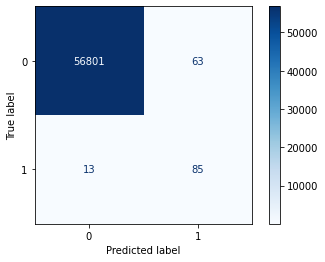

Akurasi: 0.9987
Recall: 0.8673
Precision: 0.5743
F1 Score: 0.6911

🔹 Confusion Matrix with threshold 0.2:


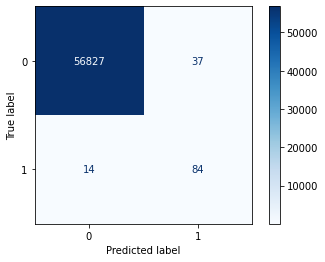

Akurasi: 0.9991
Recall: 0.8571
Precision: 0.6942
F1 Score: 0.7671

🔹 Confusion Matrix with threshold 0.3:


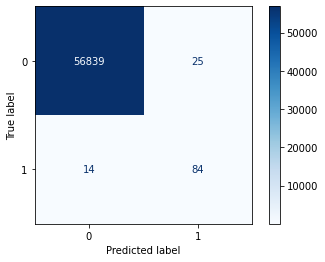

Akurasi: 0.9993
Recall: 0.8571
Precision: 0.7706
F1 Score: 0.8116

🔹 Confusion Matrix with threshold 0.4:


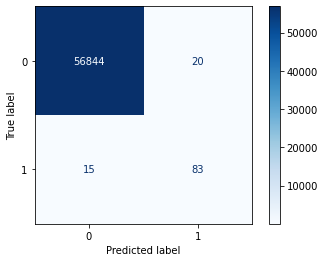

Akurasi: 0.9994
Recall: 0.8469
Precision: 0.8058
F1 Score: 0.8259

🔹 Confusion Matrix with threshold 0.5:


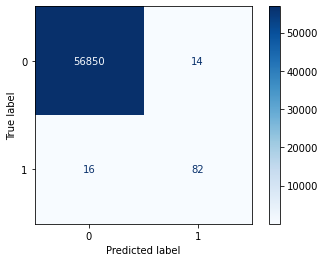

Akurasi: 0.9995
Recall: 0.8367
Precision: 0.8542
F1 Score: 0.8454

🔹 Confusion Matrix with threshold 0.6:


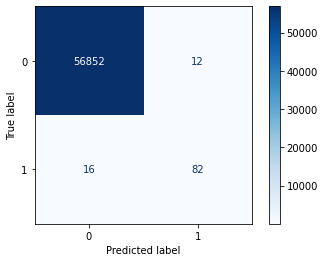

Akurasi: 0.9995
Recall: 0.8367
Precision: 0.8723
F1 Score: 0.8542

🔹 Confusion Matrix with threshold 0.7:


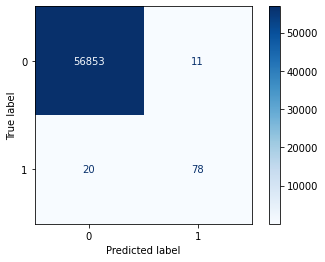

Akurasi: 0.9995
Recall: 0.7959
Precision: 0.8764
F1 Score: 0.8342

🔹 Confusion Matrix with threshold 0.8:


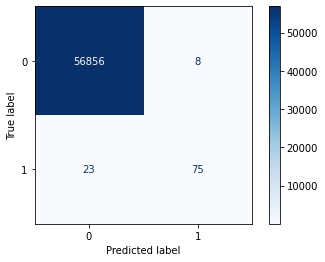

Akurasi: 0.9995
Recall: 0.7653
Precision: 0.9036
F1 Score: 0.8287

🔹 Confusion Matrix with threshold 0.9:


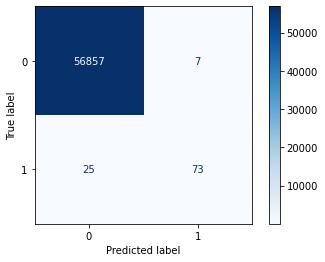

Akurasi: 0.9994
Recall: 0.7449
Precision: 0.9125
F1 Score: 0.8202


Random Oversampling - Test Metrics:
Accuracy: 0.49027422070503235
Precision: 0.0033297862391918898
Recall: 0.9897959232330322
F1 Score: 0.006637243088334799
AUCPR dengan Keras: 0.0444210022687912


1781/1781 [==============================] - 1s 694us/step

Latency After hyperparameter tuning with threshold 0.1: 0.000080 sec

Latency After hyperparameter tuning with threshold 0.2: 0.000037 sec

Latency After hyperparameter tuning with threshold 0.3: 0.000041 sec

Latency After hyperparameter tuning with threshold 0.4: 0.000033 sec

Latency After hyperparameter tuning with threshold 0.5: 0.000035 sec

Latency After hyperparameter tuning with threshold 0.6: 0.000035 sec

Latency After hyperparameter tuning with threshold 0.7: 0.000034 sec

Latency After hyperparameter tuning with threshold 0.8: 0.000033 sec

Latency After hyperparameter tuning with threshold 0.9: 0.000045 sec
AUC-PR dengan scikit-learn: 0.3599 


🔹 Confu

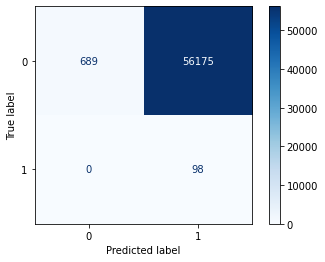

Akurasi: 0.0138
Recall: 1.0000
Precision: 0.0017
F1 Score: 0.0035

🔹 Confusion Matrix with threshold 0.2:


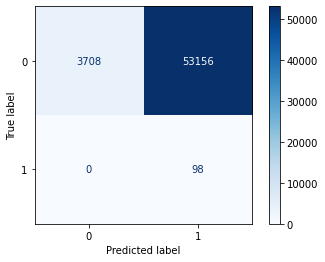

Akurasi: 0.0668
Recall: 1.0000
Precision: 0.0018
F1 Score: 0.0037

🔹 Confusion Matrix with threshold 0.3:


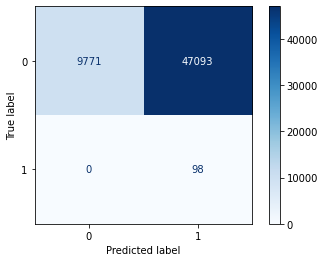

Akurasi: 0.1733
Recall: 1.0000
Precision: 0.0021
F1 Score: 0.0041

🔹 Confusion Matrix with threshold 0.4:


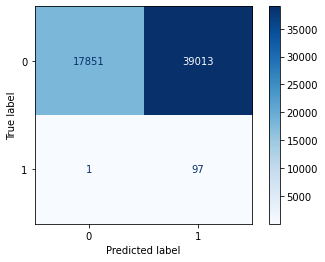

Akurasi: 0.3151
Recall: 0.9898
Precision: 0.0025
F1 Score: 0.0049

🔹 Confusion Matrix with threshold 0.5:


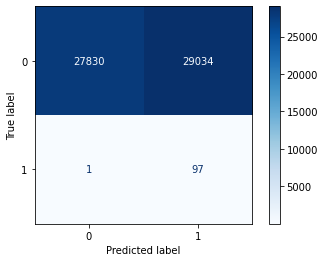

Akurasi: 0.4903
Recall: 0.9898
Precision: 0.0033
F1 Score: 0.0066

🔹 Confusion Matrix with threshold 0.6:


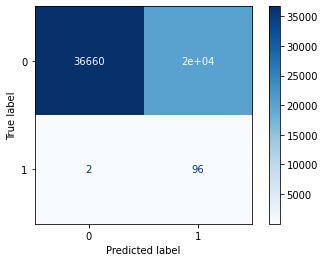

Akurasi: 0.6453
Recall: 0.9796
Precision: 0.0047
F1 Score: 0.0094

🔹 Confusion Matrix with threshold 0.7:


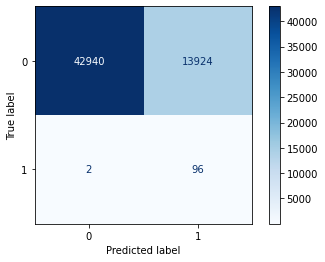

Akurasi: 0.7555
Recall: 0.9796
Precision: 0.0068
F1 Score: 0.0136

🔹 Confusion Matrix with threshold 0.8:


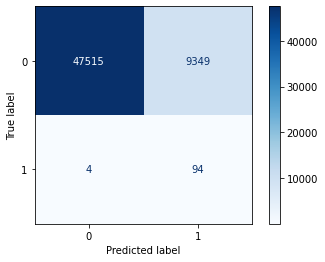

Akurasi: 0.8358
Recall: 0.9592
Precision: 0.0100
F1 Score: 0.0197

🔹 Confusion Matrix with threshold 0.9:


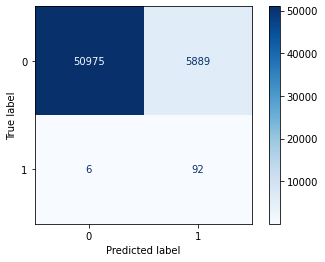

Akurasi: 0.8965
Recall: 0.9388
Precision: 0.0154
F1 Score: 0.0303


Smote - Test Metrics:
Accuracy: 0.9991924166679382
Precision: 0.7280701994895935
Recall: 0.8469387888908386
F1 Score: 0.7830188274383545
AUCPR dengan Keras: 0.8025103211402893


1781/1781 [==============================] - 1s 686us/step

Latency After hyperparameter tuning with threshold 0.1: 0.000068 sec

Latency After hyperparameter tuning with threshold 0.2: 0.000036 sec

Latency After hyperparameter tuning with threshold 0.3: 0.000033 sec

Latency After hyperparameter tuning with threshold 0.4: 0.000032 sec

Latency After hyperparameter tuning with threshold 0.5: 0.000036 sec

Latency After hyperparameter tuning with threshold 0.6: 0.000034 sec

Latency After hyperparameter tuning with threshold 0.7: 0.000036 sec

Latency After hyperparameter tuning with threshold 0.8: 0.000036 sec

Latency After hyperparameter tuning with threshold 0.9: 0.000034 sec
AUC-PR dengan scikit-learn: 0.8143 


🔹 Confusion Matrix with thr

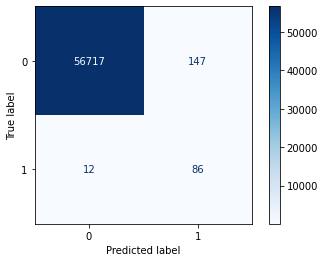

Akurasi: 0.9972
Recall: 0.8776
Precision: 0.3691
F1 Score: 0.5196

🔹 Confusion Matrix with threshold 0.2:


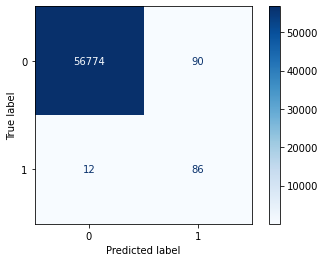

Akurasi: 0.9982
Recall: 0.8776
Precision: 0.4886
F1 Score: 0.6277

🔹 Confusion Matrix with threshold 0.3:


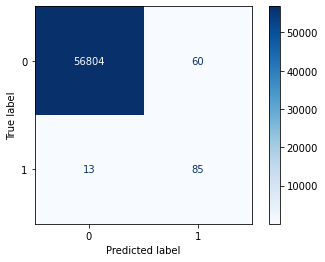

Akurasi: 0.9987
Recall: 0.8673
Precision: 0.5862
F1 Score: 0.6996

🔹 Confusion Matrix with threshold 0.4:


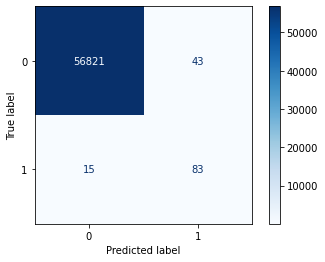

Akurasi: 0.9990
Recall: 0.8469
Precision: 0.6587
F1 Score: 0.7411

🔹 Confusion Matrix with threshold 0.5:


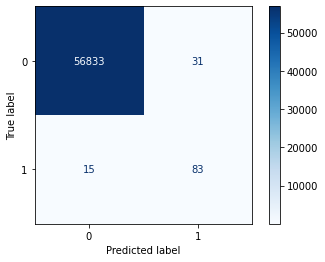

Akurasi: 0.9992
Recall: 0.8469
Precision: 0.7281
F1 Score: 0.7830

🔹 Confusion Matrix with threshold 0.6:


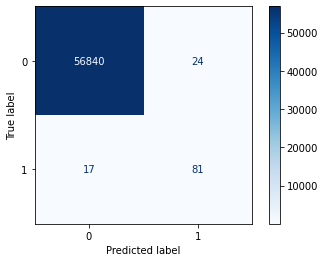

Akurasi: 0.9993
Recall: 0.8265
Precision: 0.7714
F1 Score: 0.7980

🔹 Confusion Matrix with threshold 0.7:


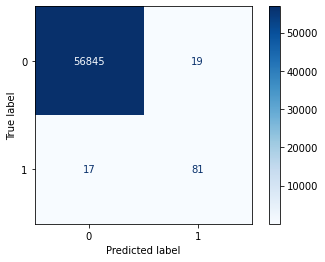

Akurasi: 0.9994
Recall: 0.8265
Precision: 0.8100
F1 Score: 0.8182

🔹 Confusion Matrix with threshold 0.8:


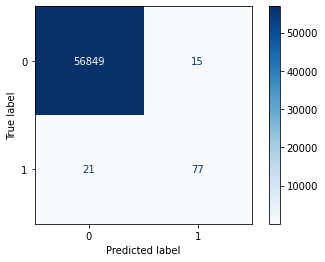

Akurasi: 0.9994
Recall: 0.7857
Precision: 0.8370
F1 Score: 0.8105

🔹 Confusion Matrix with threshold 0.9:


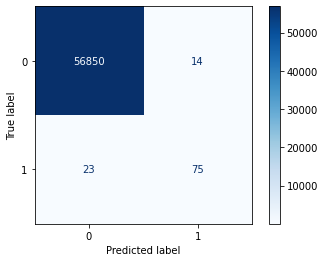

Akurasi: 0.9994
Recall: 0.7653
Precision: 0.8427
F1 Score: 0.8021


Adasyn - Test Metrics:
Accuracy: 0.9988939762115479
Precision: 0.6315789222717285
Recall: 0.8571428656578064
F1 Score: 0.7272725701332092
AUCPR dengan Keras: 0.7668262720108032


1781/1781 [==============================] - 1s 700us/step

Latency After hyperparameter tuning with threshold 0.1: 0.000082 sec

Latency After hyperparameter tuning with threshold 0.2: 0.000036 sec

Latency After hyperparameter tuning with threshold 0.3: 0.000033 sec

Latency After hyperparameter tuning with threshold 0.4: 0.000035 sec

Latency After hyperparameter tuning with threshold 0.5: 0.000036 sec

Latency After hyperparameter tuning with threshold 0.6: 0.000035 sec

Latency After hyperparameter tuning with threshold 0.7: 0.000033 sec

Latency After hyperparameter tuning with threshold 0.8: 0.000034 sec

Latency After hyperparameter tuning with threshold 0.9: 0.000102 sec
AUC-PR dengan scikit-learn: 0.7681 


🔹 Confusion Matrix with th

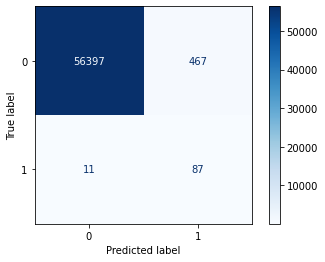

Akurasi: 0.9916
Recall: 0.8878
Precision: 0.1570
F1 Score: 0.2669

🔹 Confusion Matrix with threshold 0.2:


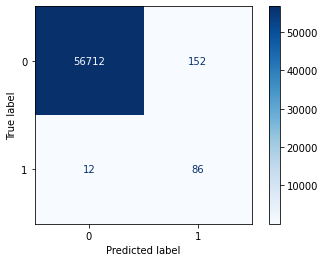

Akurasi: 0.9971
Recall: 0.8776
Precision: 0.3613
F1 Score: 0.5119

🔹 Confusion Matrix with threshold 0.3:


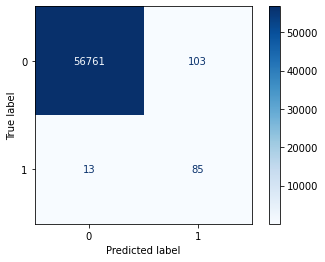

Akurasi: 0.9980
Recall: 0.8673
Precision: 0.4521
F1 Score: 0.5944

🔹 Confusion Matrix with threshold 0.4:


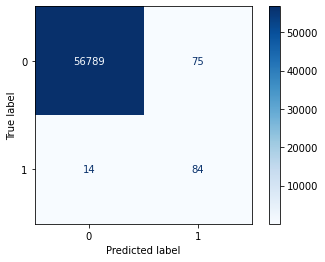

Akurasi: 0.9984
Recall: 0.8571
Precision: 0.5283
F1 Score: 0.6537

🔹 Confusion Matrix with threshold 0.5:


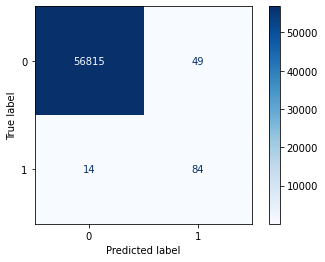

Akurasi: 0.9989
Recall: 0.8571
Precision: 0.6316
F1 Score: 0.7273

🔹 Confusion Matrix with threshold 0.6:


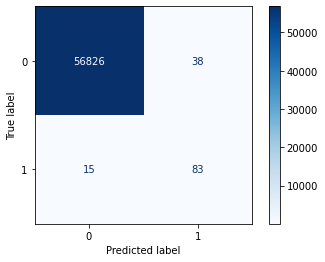

Akurasi: 0.9991
Recall: 0.8469
Precision: 0.6860
F1 Score: 0.7580

🔹 Confusion Matrix with threshold 0.7:


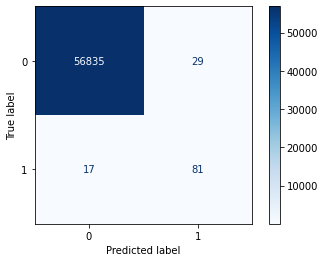

Akurasi: 0.9992
Recall: 0.8265
Precision: 0.7364
F1 Score: 0.7788

🔹 Confusion Matrix with threshold 0.8:


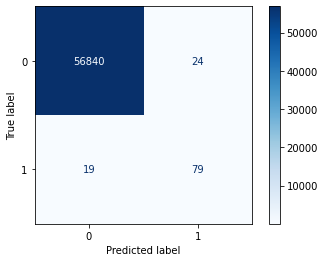

Akurasi: 0.9992
Recall: 0.8061
Precision: 0.7670
F1 Score: 0.7861

🔹 Confusion Matrix with threshold 0.9:


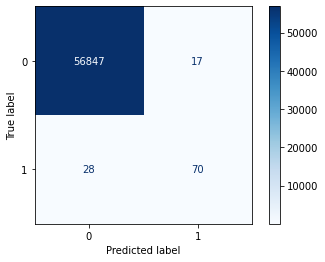

Akurasi: 0.9992
Recall: 0.7143
Precision: 0.8046
F1 Score: 0.7568


Random Undersampling - Test Metrics:
Accuracy: 0.9986833333969116
Precision: 0.5827338099479675
Recall: 0.8265306353569031
F1 Score: 0.6835442185401917
AUCPR dengan Keras: 0.6654040813446045


1781/1781 [==============================] - 1s 693us/step

Latency After hyperparameter tuning with threshold 0.1: 0.000072 sec

Latency After hyperparameter tuning with threshold 0.2: 0.000033 sec

Latency After hyperparameter tuning with threshold 0.3: 0.000090 sec

Latency After hyperparameter tuning with threshold 0.4: 0.000084 sec

Latency After hyperparameter tuning with threshold 0.5: 0.000084 sec

Latency After hyperparameter tuning with threshold 0.6: 0.000083 sec

Latency After hyperparameter tuning with threshold 0.7: 0.000084 sec

Latency After hyperparameter tuning with threshold 0.8: 0.000083 sec

Latency After hyperparameter tuning with threshold 0.9: 0.000082 sec
AUC-PR dengan scikit-learn: 0.6952 


🔹 Confusion 

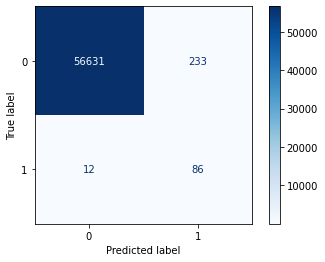

Akurasi: 0.9957
Recall: 0.8776
Precision: 0.2696
F1 Score: 0.4125

🔹 Confusion Matrix with threshold 0.2:


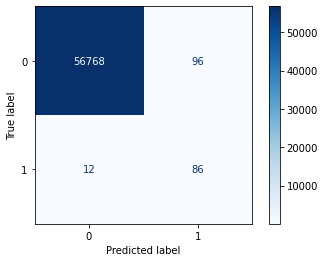

Akurasi: 0.9981
Recall: 0.8776
Precision: 0.4725
F1 Score: 0.6143

🔹 Confusion Matrix with threshold 0.3:


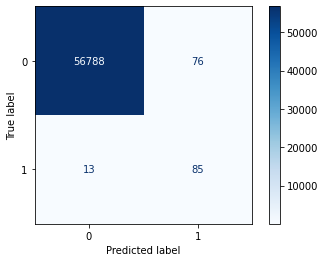

Akurasi: 0.9984
Recall: 0.8673
Precision: 0.5280
F1 Score: 0.6564

🔹 Confusion Matrix with threshold 0.4:


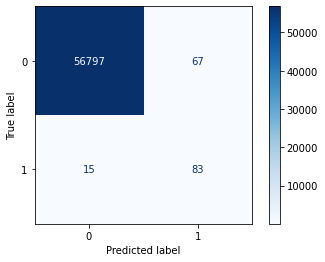

Akurasi: 0.9986
Recall: 0.8469
Precision: 0.5533
F1 Score: 0.6694

🔹 Confusion Matrix with threshold 0.5:


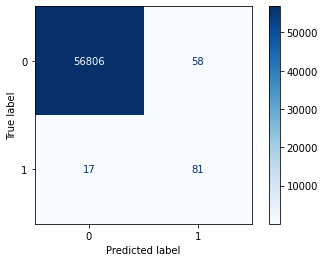

Akurasi: 0.9987
Recall: 0.8265
Precision: 0.5827
F1 Score: 0.6835

🔹 Confusion Matrix with threshold 0.6:


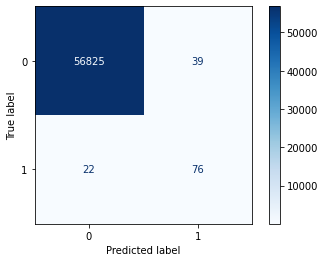

Akurasi: 0.9989
Recall: 0.7755
Precision: 0.6609
F1 Score: 0.7136

🔹 Confusion Matrix with threshold 0.7:


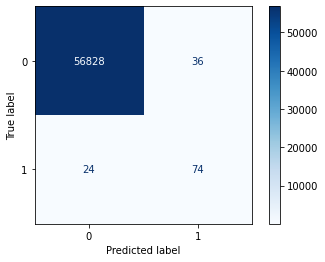

Akurasi: 0.9989
Recall: 0.7551
Precision: 0.6727
F1 Score: 0.7115

🔹 Confusion Matrix with threshold 0.8:


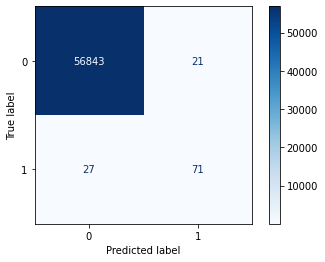

Akurasi: 0.9992
Recall: 0.7245
Precision: 0.7717
F1 Score: 0.7474

🔹 Confusion Matrix with threshold 0.9:


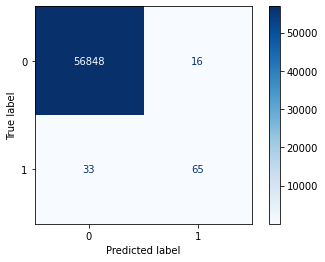

Akurasi: 0.9991
Recall: 0.6633
Precision: 0.8025
F1 Score: 0.7263


ROS + RUS - Test Metrics:
Accuracy: 0.9985780119895935
Precision: 0.556291401386261
Recall: 0.8571428656578064
F1 Score: 0.6746987700462341
AUCPR dengan Keras: 0.8028349876403809


1781/1781 [==============================] - 1s 701us/step

Latency After hyperparameter tuning with threshold 0.1: 0.000072 sec

Latency After hyperparameter tuning with threshold 0.2: 0.000036 sec

Latency After hyperparameter tuning with threshold 0.3: 0.000033 sec

Latency After hyperparameter tuning with threshold 0.4: 0.000031 sec

Latency After hyperparameter tuning with threshold 0.5: 0.000038 sec

Latency After hyperparameter tuning with threshold 0.6: 0.000034 sec

Latency After hyperparameter tuning with threshold 0.7: 0.000036 sec

Latency After hyperparameter tuning with threshold 0.8: 0.000036 sec

Latency After hyperparameter tuning with threshold 0.9: 0.000035 sec
AUC-PR dengan scikit-learn: 0.8034 


🔹 Confusion Matrix with 

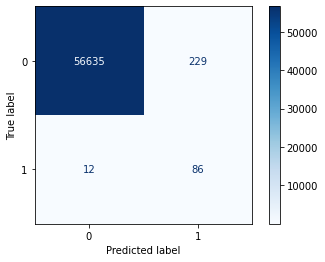

Akurasi: 0.9958
Recall: 0.8776
Precision: 0.2730
F1 Score: 0.4165

🔹 Confusion Matrix with threshold 0.2:


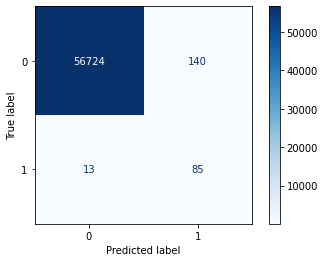

Akurasi: 0.9973
Recall: 0.8673
Precision: 0.3778
F1 Score: 0.5263

🔹 Confusion Matrix with threshold 0.3:


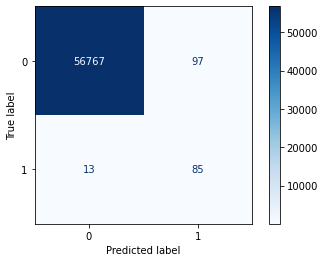

Akurasi: 0.9981
Recall: 0.8673
Precision: 0.4670
F1 Score: 0.6071

🔹 Confusion Matrix with threshold 0.4:


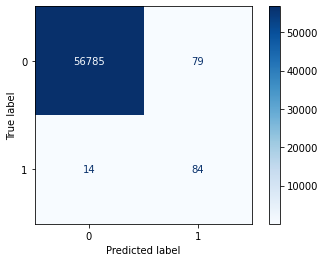

Akurasi: 0.9984
Recall: 0.8571
Precision: 0.5153
F1 Score: 0.6437

🔹 Confusion Matrix with threshold 0.5:


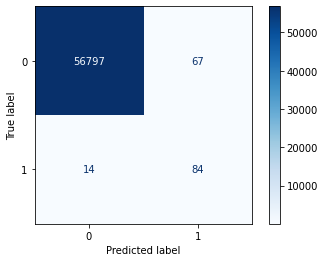

Akurasi: 0.9986
Recall: 0.8571
Precision: 0.5563
F1 Score: 0.6747

🔹 Confusion Matrix with threshold 0.6:


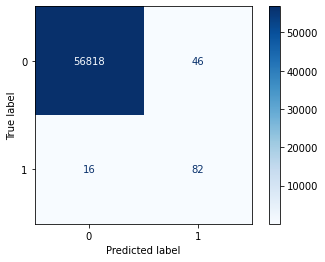

Akurasi: 0.9989
Recall: 0.8367
Precision: 0.6406
F1 Score: 0.7257

🔹 Confusion Matrix with threshold 0.7:


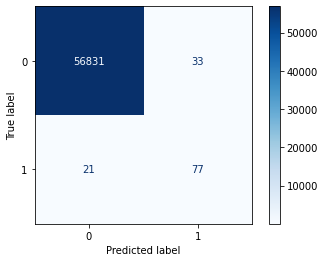

Akurasi: 0.9991
Recall: 0.7857
Precision: 0.7000
F1 Score: 0.7404

🔹 Confusion Matrix with threshold 0.8:


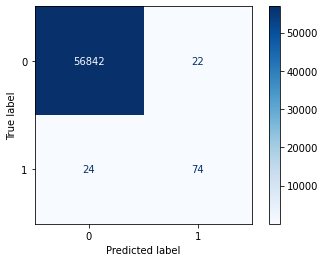

Akurasi: 0.9992
Recall: 0.7551
Precision: 0.7708
F1 Score: 0.7629

🔹 Confusion Matrix with threshold 0.9:


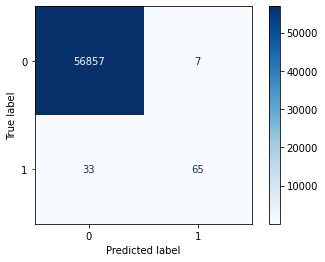

Akurasi: 0.9993
Recall: 0.6633
Precision: 0.9028
F1 Score: 0.7647


SMOTE + RUS - Test Metrics:
Accuracy: 0.9985604286193848
Precision: 0.5512820482254028
Recall: 0.8775510191917419
F1 Score: 0.6771653294563293
AUCPR dengan Keras: 0.7483011484146118


1781/1781 [==============================] - 1s 704us/step

Latency After hyperparameter tuning with threshold 0.1: 0.000077 sec

Latency After hyperparameter tuning with threshold 0.2: 0.000038 sec

Latency After hyperparameter tuning with threshold 0.3: 0.000033 sec

Latency After hyperparameter tuning with threshold 0.4: 0.000035 sec

Latency After hyperparameter tuning with threshold 0.5: 0.000034 sec

Latency After hyperparameter tuning with threshold 0.6: 0.000101 sec

Latency After hyperparameter tuning with threshold 0.7: 0.000096 sec

Latency After hyperparameter tuning with threshold 0.8: 0.000094 sec

Latency After hyperparameter tuning with threshold 0.9: 0.000094 sec
AUC-PR dengan scikit-learn: 0.8030 


🔹 Confusion Matrix wi

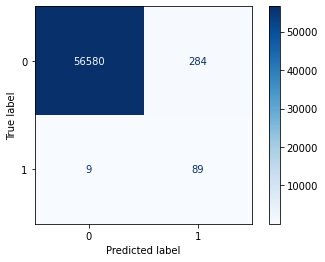

Akurasi: 0.9949
Recall: 0.9082
Precision: 0.2386
F1 Score: 0.3779

🔹 Confusion Matrix with threshold 0.2:


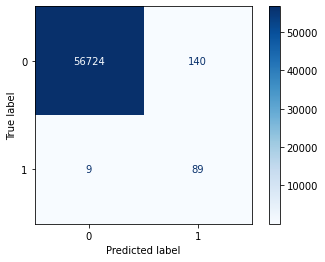

Akurasi: 0.9974
Recall: 0.9082
Precision: 0.3886
F1 Score: 0.5443

🔹 Confusion Matrix with threshold 0.3:


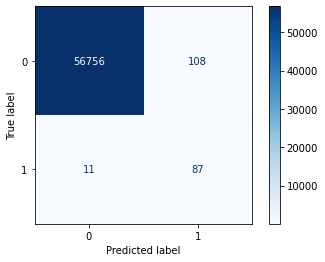

Akurasi: 0.9979
Recall: 0.8878
Precision: 0.4462
F1 Score: 0.5939

🔹 Confusion Matrix with threshold 0.4:


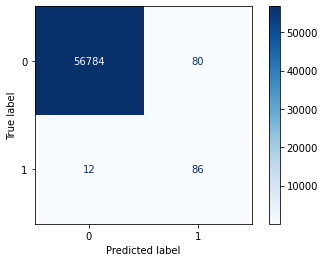

Akurasi: 0.9984
Recall: 0.8776
Precision: 0.5181
F1 Score: 0.6515

🔹 Confusion Matrix with threshold 0.5:


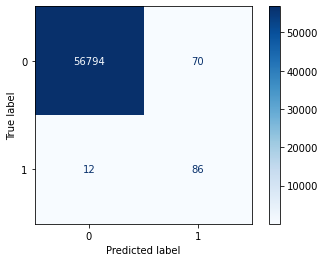

Akurasi: 0.9986
Recall: 0.8776
Precision: 0.5513
F1 Score: 0.6772

🔹 Confusion Matrix with threshold 0.6:


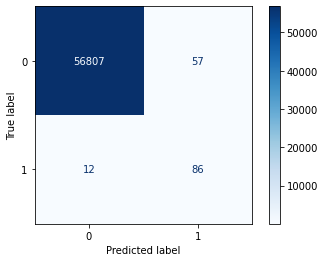

Akurasi: 0.9988
Recall: 0.8776
Precision: 0.6014
F1 Score: 0.7137

🔹 Confusion Matrix with threshold 0.7:


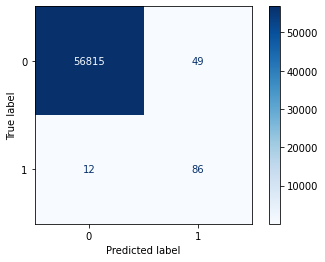

Akurasi: 0.9989
Recall: 0.8776
Precision: 0.6370
F1 Score: 0.7382

🔹 Confusion Matrix with threshold 0.8:


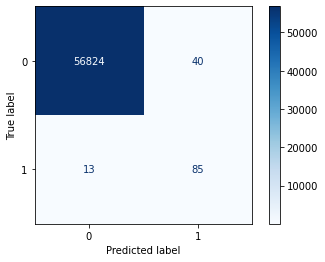

Akurasi: 0.9991
Recall: 0.8673
Precision: 0.6800
F1 Score: 0.7623

🔹 Confusion Matrix with threshold 0.9:


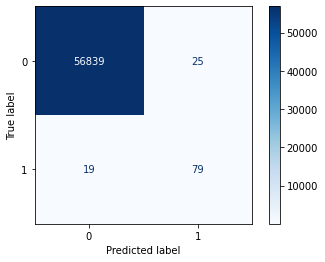

Akurasi: 0.9992
Recall: 0.8061
Precision: 0.7596
F1 Score: 0.7822


RUS + ROS - Test Metrics:
Accuracy: 0.999210000038147
Precision: 0.7264957427978516
Recall: 0.8673469424247742
F1 Score: 0.7906975746154785
AUCPR dengan Keras: 0.8307619094848633


1781/1781 [==============================] - 1s 717us/step

Latency After hyperparameter tuning with threshold 0.1: 0.000072 sec

Latency After hyperparameter tuning with threshold 0.2: 0.000036 sec

Latency After hyperparameter tuning with threshold 0.3: 0.000033 sec

Latency After hyperparameter tuning with threshold 0.4: 0.000034 sec

Latency After hyperparameter tuning with threshold 0.5: 0.000032 sec

Latency After hyperparameter tuning with threshold 0.6: 0.000031 sec

Latency After hyperparameter tuning with threshold 0.7: 0.000032 sec

Latency After hyperparameter tuning with threshold 0.8: 0.000032 sec

Latency After hyperparameter tuning with threshold 0.9: 0.000033 sec
AUC-PR dengan scikit-learn: 0.8304 


🔹 Confusion Matrix with 

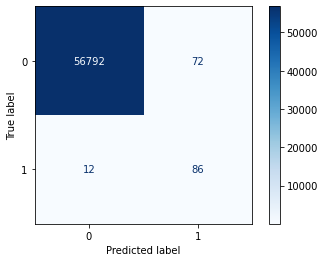

Akurasi: 0.9985
Recall: 0.8776
Precision: 0.5443
F1 Score: 0.6719

🔹 Confusion Matrix with threshold 0.2:


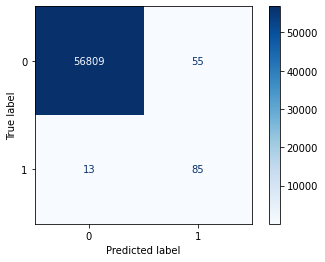

Akurasi: 0.9988
Recall: 0.8673
Precision: 0.6071
F1 Score: 0.7143

🔹 Confusion Matrix with threshold 0.3:


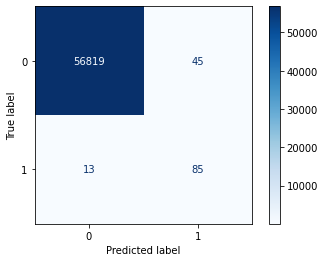

Akurasi: 0.9990
Recall: 0.8673
Precision: 0.6538
F1 Score: 0.7456

🔹 Confusion Matrix with threshold 0.4:


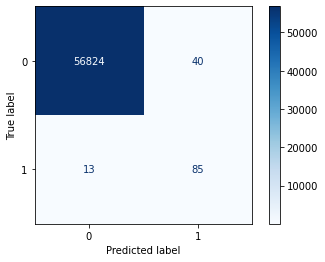

Akurasi: 0.9991
Recall: 0.8673
Precision: 0.6800
F1 Score: 0.7623

🔹 Confusion Matrix with threshold 0.5:


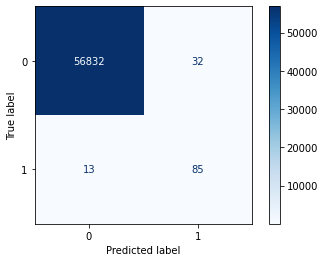

Akurasi: 0.9992
Recall: 0.8673
Precision: 0.7265
F1 Score: 0.7907

🔹 Confusion Matrix with threshold 0.6:


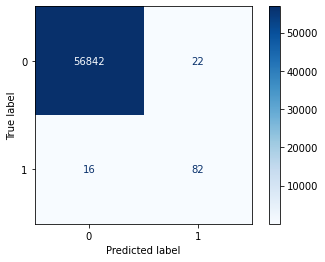

Akurasi: 0.9993
Recall: 0.8367
Precision: 0.7885
F1 Score: 0.8119

🔹 Confusion Matrix with threshold 0.7:


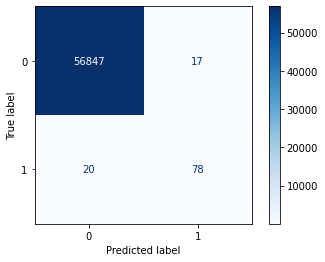

Akurasi: 0.9994
Recall: 0.7959
Precision: 0.8211
F1 Score: 0.8083

🔹 Confusion Matrix with threshold 0.8:


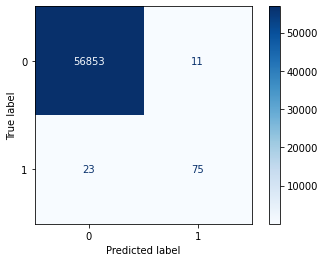

Akurasi: 0.9994
Recall: 0.7653
Precision: 0.8721
F1 Score: 0.8152

🔹 Confusion Matrix with threshold 0.9:


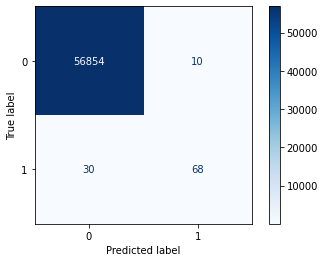

Akurasi: 0.9993
Recall: 0.6939
Precision: 0.8718
F1 Score: 0.7727


RUS + SMOTE - Test Metrics:
Accuracy: 0.998981773853302
Precision: 0.6515151262283325
Recall: 0.8775510191917419
F1 Score: 0.7478260397911072
AUCPR dengan Keras: 0.7178753018379211


1781/1781 [==============================] - 1s 692us/step

Latency After hyperparameter tuning with threshold 0.1: 0.000105 sec

Latency After hyperparameter tuning with threshold 0.2: 0.000046 sec

Latency After hyperparameter tuning with threshold 0.3: 0.000044 sec

Latency After hyperparameter tuning with threshold 0.4: 0.000042 sec

Latency After hyperparameter tuning with threshold 0.5: 0.000041 sec

Latency After hyperparameter tuning with threshold 0.6: 0.000043 sec

Latency After hyperparameter tuning with threshold 0.7: 0.000129 sec

Latency After hyperparameter tuning with threshold 0.8: 0.000120 sec

Latency After hyperparameter tuning with threshold 0.9: 0.000118 sec
AUC-PR dengan scikit-learn: 0.7680 


🔹 Confusion Matrix wit

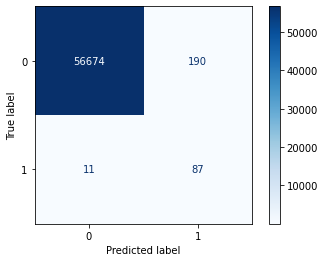

Akurasi: 0.9965
Recall: 0.8878
Precision: 0.3141
F1 Score: 0.4640

🔹 Confusion Matrix with threshold 0.2:


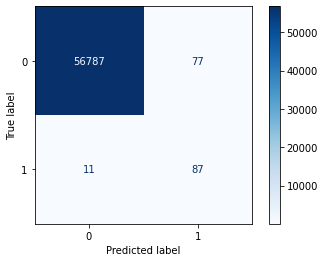

Akurasi: 0.9985
Recall: 0.8878
Precision: 0.5305
F1 Score: 0.6641

🔹 Confusion Matrix with threshold 0.3:


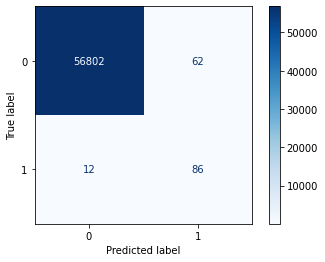

Akurasi: 0.9987
Recall: 0.8776
Precision: 0.5811
F1 Score: 0.6992

🔹 Confusion Matrix with threshold 0.4:


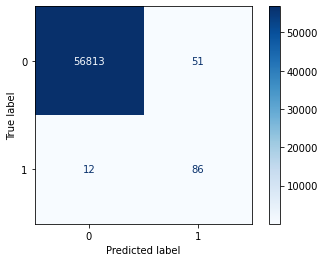

Akurasi: 0.9989
Recall: 0.8776
Precision: 0.6277
F1 Score: 0.7319

🔹 Confusion Matrix with threshold 0.5:


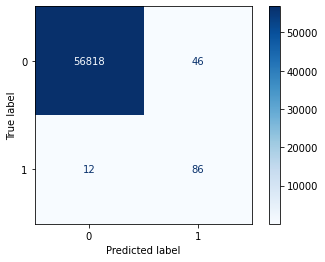

Akurasi: 0.9990
Recall: 0.8776
Precision: 0.6515
F1 Score: 0.7478

🔹 Confusion Matrix with threshold 0.6:


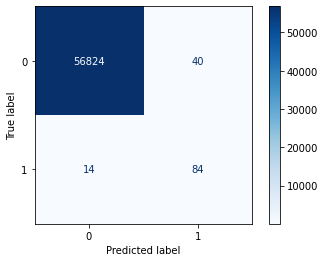

Akurasi: 0.9991
Recall: 0.8571
Precision: 0.6774
F1 Score: 0.7568

🔹 Confusion Matrix with threshold 0.7:


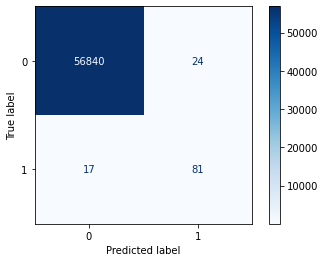

Akurasi: 0.9993
Recall: 0.8265
Precision: 0.7714
F1 Score: 0.7980

🔹 Confusion Matrix with threshold 0.8:


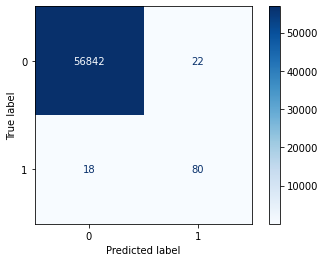

Akurasi: 0.9993
Recall: 0.8163
Precision: 0.7843
F1 Score: 0.8000

🔹 Confusion Matrix with threshold 0.9:


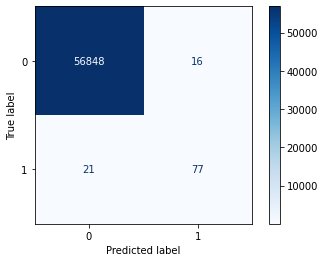

Akurasi: 0.9994
Recall: 0.7857
Precision: 0.8280
F1 Score: 0.8063




In [67]:
# test model
def evaluate_model(model, X_test, y_test, method_name):
    # evaluasi metriks
    test_loss, test_accuracy, test_precision, test_recall, test_f1, test_aucpr = model.evaluate(X_test, y_test, verbose=0)

    # Print semua metriks
    print(f"{method_name} - Test Metrics:")
    print("Accuracy:", test_accuracy)
    print("Precision:", test_precision)
    print("Recall:", test_recall)
    print("F1 Score:", test_f1)
    print("AUCPR dengan Keras:", test_aucpr)
    print("\n")

    # Mendapatkan Probabilitas Prediksi
    y_pred_prob = model.predict(X_test)

    # Mengkonversi probability ke label kelas
    start_time4 = time.time()
    with tf.device('/GPU:0'):
        y_pred4 = (y_pred_prob >= 0.1).astype(int)
    end_time4 = time.time() - start_time4

    start_time5 = time.time()
    with tf.device('/GPU:0'):
        y_pred5 = (y_pred_prob >= 0.2).astype(int)
    end_time5 = time.time() - start_time5

    start_time6 = time.time()
    with tf.device('/GPU:0'):
        y_pred6 = (y_pred_prob >= 0.3).astype(int)
    end_time6 = time.time() - start_time6

    start_time7 = time.time()
    with tf.device('/GPU:0'):
        y_pred7 = (y_pred_prob >= 0.4).astype(int)
    end_time7 = time.time() - start_time7

    start_time8 = time.time()
    with tf.device('/GPU:0'):
        y_pred8 = (y_pred_prob >= 0.5).astype(int)
    end_time8 = time.time() - start_time8

    start_time9 = time.time()
    with tf.device('/GPU:0'):
        y_pred9 = (y_pred_prob >= 0.6).astype(int)
    end_time9 = time.time() - start_time9

    start_time10 = time.time()
    with tf.device('/GPU:0'):
        y_pred10 = (y_pred_prob >= 0.7).astype(int)
    end_time10 = time.time() - start_time10

    start_time11 = time.time()
    with tf.device('/GPU:0'):
        y_pred11 = (y_pred_prob >= 0.8).astype(int)
    end_time11 = time.time() - start_time11

    start_time12 = time.time()
    with tf.device('/GPU:0'):
        y_pred12 = (y_pred_prob >= 0.9).astype(int)
    end_time12 = time.time() - start_time12

    print(f"\nLatency After hyperparameter tuning with threshold 0.1: {end_time4:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.2: {end_time5:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.3: {end_time6:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.4: {end_time7:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.5: {end_time8:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.6: {end_time9:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.7: {end_time10:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.8: {end_time11:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.9: {end_time12:.6f} sec")


    # Menghitung Confusion Matrix
    cm1 = confusion_matrix(y_test, y_pred4)
    cm2 = confusion_matrix(y_test, y_pred5)
    cm3 = confusion_matrix(y_test, y_pred6)
    cm4 = confusion_matrix(y_test, y_pred7)
    cm5 = confusion_matrix(y_test, y_pred8)
    cm6 = confusion_matrix(y_test, y_pred9)
    cm7 = confusion_matrix(y_test, y_pred10)
    cm8 = confusion_matrix(y_test, y_pred11)
    cm9 = confusion_matrix(y_test, y_pred12)

    # Menghitung AUCPR
    aucpr = average_precision_score(y_test, y_pred_prob)  # pakai probabilitas, bukan y_pred4
    print(f"AUC-PR dengan scikit-learn: {aucpr:.4f} \n")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.1:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred4)
    recall = recall_score(y_test, y_pred4)
    precision = precision_score(y_test, y_pred4)
    f1 = f1_score(y_test, y_pred4)

    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.2:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred5)
    recall = recall_score(y_test, y_pred5)
    precision = precision_score(y_test, y_pred5)
    f1 = f1_score(y_test, y_pred5)
    
    # Tampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.3:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred6)
    recall = recall_score(y_test, y_pred6)
    precision = precision_score(y_test, y_pred6)
    f1 = f1_score(y_test, y_pred6)
    
    # Tampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.4:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred7)
    recall = recall_score(y_test, y_pred7)
    precision = precision_score(y_test, y_pred7)
    f1 = f1_score(y_test, y_pred7)
    
    # Tampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.5:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred8)
    recall = recall_score(y_test, y_pred8)
    precision = precision_score(y_test, y_pred8)
    f1 = f1_score(y_test, y_pred8)
    
    # Tampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.6:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm6, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred9)
    recall = recall_score(y_test, y_pred9)
    precision = precision_score(y_test, y_pred9)
    f1 = f1_score(y_test, y_pred9)
    
    # Tampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.7:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm7, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred10)
    recall = recall_score(y_test, y_pred10)
    precision = precision_score(y_test, y_pred10)
    f1 = f1_score(y_test, y_pred10)
    
    # Tampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.8:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm8, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred11)
    recall = recall_score(y_test, y_pred11)
    precision = precision_score(y_test, y_pred11)
    f1 = f1_score(y_test, y_pred11)
    
    # Tampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.9:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm9, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred12)
    recall = recall_score(y_test, y_pred12)
    precision = precision_score(y_test, y_pred12)
    f1 = f1_score(y_test, y_pred12)
    
    # Tampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    print("\n")

# No Method
evaluate_model(model, df_X_test_selected, y_test, "Normal")
# Random Oversampling
evaluate_model(model_ros, df_X_ros_test_selected, y_test, "Random Oversampling")
# Smote
evaluate_model(model_smote, df_X_smote_test_selected, y_test, "Smote")
# Smote
evaluate_model(model_adasyn, df_X_adasyn_test_selected, y_test, "Adasyn")
# Random Undersampling
evaluate_model(model_rus, df_X_rus_test_selected, y_test, "Random Undersampling")
# ROS + RUS
evaluate_model(model_ros_to_rus, df_X_ros_to_rus_test_selected, y_test, "ROS + RUS")
# SMOTE + RUS
evaluate_model(model_smote_to_rus, df_X_smote_to_rus_test_selected, y_test, "SMOTE + RUS")
# RUS + ROS
evaluate_model(model_rus_to_ros, df_X_rus_to_ros_test_selected, y_test, "RUS + ROS")
# RUS + SMOTE
evaluate_model(model_rus_to_smote, df_X_rus_to_smote_test_selected, y_test, "RUS + SMOTE")

# **HYPERPARAMETER OPTIMIZATION**

## DNN HYPERPARAMETER TUNING

Reference: https://www.tensorflow.org/tutorials/keras/keras_tuner

In [68]:
current_time = datetime.now()

# Mencetak waktu dalam format jam:menit:detik
print("Starting tuning hyperparameter")
print(current_time.strftime("%H:%M:%S"))

Starting tuning hyperparameter
05:32:18


In [69]:
!pip install keras_tuner

Defaulting to user installation because normal site-packages is not writeable


In [70]:
import time
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Recall, Precision, Metric
from sklearn.utils.class_weight import compute_class_weight

In [71]:
class F1Score(Metric):
    def __init__(self, name="f1_score", **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.tp = self.add_weight(name="tp", initializer="zeros")
        self.fp = self.add_weight(name="fp", initializer="zeros")
        self.fn = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)  # Konversi y_true ke float32
        y_pred = tf.round(y_pred)  # Konversi probabilitas ke 0/1

        tp = tf.reduce_sum(y_true * y_pred)
        fp = tf.reduce_sum((1 - y_true) * y_pred)
        fn = tf.reduce_sum(y_true * (1 - y_pred))

        self.tp.assign_add(tp)
        self.fp.assign_add(fp)
        self.fn.assign_add(fn)

    def result(self):
        precision = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        recall = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_state(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)

# Fungsi untuk membangun model dengan Hyperparameter Tuning
def build_ann_model(hp, input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))

    # Hyperparameter tuning untuk jumlah neuron di hidden layer pertama
    model.add(Dense(units=hp.Int('units_layer1', min_value=32, max_value=128), activation='relu'))

    # Hyperparameter tuning untuk jumlah neuron di hidden layer kedua
    model.add(Dense(units=hp.Int('units_layer2', min_value=16, max_value=64), activation='relu'))

    # Hyperparameter tuning untuk jumlah neuron di hidden layer ketiga
    model.add(Dense(units=hp.Int('units_layer3', min_value=8, max_value=64), activation='relu'))

    # Layer output
    model.add(Dense(1, activation='sigmoid'))

    # Hyperparameter tuning untuk learning rate
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-1, sampling='LOG')

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), F1Score(name='f1_score'), AUC(name='aucpr', curve='PR')],
                  weighted_metrics=[])

    return model

In [72]:
input_shape = df_X_selected.shape[1]
input_shape_ros = df_X_ros_selected.shape[1]
input_shape_smote = df_X_smote_selected.shape[1]
input_shape_adasyn = df_X_adasyn_selected.shape[1]
input_shape_rus = df_X_rus_selected.shape[1]
input_shape_ros_to_rus = df_X_ros_to_rus_selected.shape[1]
input_shape_smote_to_rus = df_X_smote_to_rus_selected.shape[1]
input_shape_rus_to_ros = df_X_rus_to_ros_selected.shape[1]
input_shape_rus_to_smote = df_X_rus_to_smote_selected.shape[1]

In [73]:
from sklearn.metrics import auc, precision_recall_curve

tuner_time1 = time.time()
# Inisialisasi tuner dengan RandomSearch hanya untuk learning rate
tuner = kt.RandomSearch(
    lambda hp: build_ann_model(hp, input_shape),  # Model dengan hanya tuning learning rate
    objective=kt.Objective("val_recall", direction="max"),  # Mencari nilai AUC-PR tertinggi
    max_trials=5,  # Mencoba 5 kombinasi parameter
    executions_per_trial=3, # Setiap percobaan dieksekusi 3 kali untuk hasil yang lebih stabil
    seed=42,
    directory='CCFD10/my_dir',  # Folder penyimpanan hasil tuning
    project_name='dnn_learning_rate_tuning'
)

# Memulai pencarian learning rate terbaik
tuner.search(df_X_selected, y_train,
                 epochs=20,
                 batch_size=32,
                 validation_data=(df_X_val_selected, y_val))

# Mendapatkan hasil hyperparameter terbaik
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Mencetak learning rate terbaik yang ditemukan
print("Best learning rate found:")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Membangun model terbaik dengan learning rate terbaik
best_model = tuner.hypermodel.build(best_hps)
end_tuner1 = time.time() - tuner_time1

count00 = time.time()
with tf.device('/GPU:0'):
    # Melatih model terbaik"
    best_model.fit(df_X_selected, y_train,
                       validation_data=(df_X_val_selected, y_val),
                       epochs=20, verbose=1)
end_count00 = (time.time() - count00) + end_time0
end_count00_with_tuning = end_count00 + end_tuner1
print(f"\nWaktu komputasi tanpa hyperparameter tuning: {end_count00} sec")
print(f"\nWaktu komputasi dengan hyperparameter tuning: {end_count00_with_tuning} sec")

best_model.save('CCFD10/nomodel_model_gain.keras')

Trial 5 Complete [00h 16m 27s]
val_recall: 0.7948718070983887

Best val_recall So Far: 0.7948718070983887
Total elapsed time: 01h 24m 10s
Best learning rate found:
Learning Rate: 0.00012232117875737863
Epoch 1/20
6409/6409 [==============================] - 17s 3ms/step - loss: 0.0263 - accuracy: 0.9957 - precision: 0.2002 - recall: 0.5042 - f1_score: 0.2866 - aucpr: 0.4220 - val_loss: 0.0063 - val_accuracy: 0.9993 - val_precision: 0.8286 - val_recall: 0.7436 - val_f1_score: 0.7838 - val_aucpr: 0.6611
Epoch 2/20
6409/6409 [==============================] - 16s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - precision: 0.8722 - recall: 0.7690 - f1_score: 0.8174 - aucpr: 0.7967 - val_loss: 0.0060 - val_accuracy: 0.9993 - val_precision: 0.8485 - val_recall: 0.7179 - val_f1_score: 0.7778 - val_aucpr: 0.7534
Epoch 3/20
6409/6409 [==============================] - 16s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - precision: 0.8822 - recall: 0.7803 - f1_score: 0.8281 - aucpr: 0.8326 - val_loss: 0

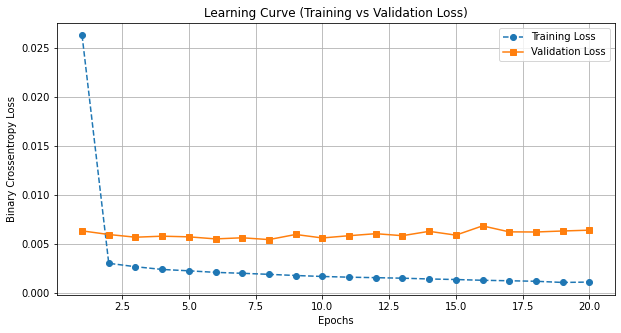

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# 1. Learning Curve (Training vs Validation Loss)
history = best_model.history.history

plt.figure(figsize=(10, 5))
epochs = range(1, len(history['loss']) + 1)

# Plot training loss
plt.plot(epochs, history['loss'], label='Training Loss', linestyle='--', marker='o')

# Plot validation loss (if exists)
val_loss = history.get('val_loss', [])
if val_loss:
    plt.plot(epochs, val_loss, label='Validation Loss', linestyle='-', marker='s')

# # Menambahkan label nilai loss pada titik-titik tertentu
# for epoch, loss in zip(epochs, history['loss']):
#     plt.text(epoch, loss, f'{loss:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# if val_loss:
#     for epoch, val in zip(epochs, val_loss):
#         plt.text(epoch, val, f'{val:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Menambahkan label, judul, dan grid
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.grid()
plt.show()

In [75]:
# Menampilkan semua kombinasi hyperparameters yang diuji
trials = tuner.oracle.get_best_trials(num_trials=5)  # Menampilkan 5 percobaan terbaik

for trial in trials:
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Validation Recall: {trial.score}\n")

Trial ID: 0
Hyperparameters: {'units_layer1': 94, 'units_layer2': 17, 'units_layer3': 31, 'learning_rate': 0.00012232117875737863}
Validation Recall: 0.7948718070983887

Trial ID: 4
Hyperparameters: {'units_layer1': 88, 'units_layer2': 26, 'units_layer3': 25, 'learning_rate': 0.0009504947970741314}
Validation Recall: 0.7948718070983887

Trial ID: 1
Hyperparameters: {'units_layer1': 118, 'units_layer2': 33, 'units_layer3': 39, 'learning_rate': 1.8515519652548627e-05}
Validation Recall: 0.7606837749481201

Trial ID: 2
Hyperparameters: {'units_layer1': 80, 'units_layer2': 27, 'units_layer3': 63, 'learning_rate': 0.002941480046354757}
Validation Recall: 0.7606837749481201

Trial ID: 3
Hyperparameters: {'units_layer1': 120, 'units_layer2': 20, 'units_layer3': 63, 'learning_rate': 1.4800038812985168e-05}
Validation Recall: 0.752136766910553



### Random Oversampling

In [76]:
from sklearn.metrics import auc, precision_recall_curve

tuner_time2 = time.time()
# Inisialisasi tuner dengan RandomSearch hanya untuk learning rate
tuner_ros = kt.RandomSearch(
    lambda hp: build_ann_model(hp, input_shape_ros),  # Model dengan hanya tuning learning rate
    objective=kt.Objective("val_recall", direction="max"),  # Mencari nilai AUC-PR tertinggi
    max_trials=5,  # Mencoba 5 kombinasi parameter
    executions_per_trial=3,  # Setiap percobaan dieksekusi 3 kali untuk hasil yang lebih stabil
    seed=43,
    directory='CCFD10/my_dir_ros',  # Folder penyimpanan hasil tuning
    project_name='dnn_learning_rate_tuning'
)

# Memulai pencarian learning rate terbaik
tuner_ros.search(df_X_ros_selected, y_ros,
                 epochs=20,
                 batch_size=32,
                 validation_data=(df_X_ros_val_selected, y_val))

# Mendapatkan hasil hyperparameter terbaik
best_hps_ros = tuner_ros.get_best_hyperparameters(num_trials=1)[0]

# Mencetak learning rate terbaik yang ditemukan
print("Best learning rate found:")
print(f"Learning Rate: {best_hps_ros.get('learning_rate')}")

# Membangun model terbaik dengan learning rate terbaik
best_model_ros = tuner_ros.hypermodel.build(best_hps_ros)
end_tuner2 = time.time() - tuner_time2

count9 = time.time()
with tf.device('/GPU:0'):
    best_model_ros.fit(df_X_ros_selected, y_ros,
                       validation_data=(df_X_ros_val_selected, y_val),
                       epochs=20, verbose=1)
end_count9 = (time.time() - count9) + end_time1
end_count9_with_tuning = end_count9 + end_tuner2
print(f"\nWaktu komputasi tanpa hyperparameter tuning: {end_count9} sec")
print(f"\nWaktu komputasi dengan hyperparameter tuning: {end_count9_with_tuning} sec")

best_model_ros.save('CCFD10/randomoversampling_model_gain.keras')

Trial 5 Complete [00h 15m 58s]
val_recall: 0.24786325295766196

Best val_recall So Far: 0.8205128312110901
Total elapsed time: 01h 20m 13s
Best learning rate found:
Learning Rate: 0.002103917275801273
Epoch 1/20
6461/6461 [==============================] - 17s 2ms/step - loss: 0.0112 - accuracy: 0.9975 - precision: 0.9413 - recall: 0.7992 - f1_score: 0.8645 - aucpr: 0.8787 - val_loss: 0.0056 - val_accuracy: 0.9993 - val_precision: 0.8108 - val_recall: 0.7692 - val_f1_score: 0.7895 - val_aucpr: 0.6816
Epoch 2/20
6461/6461 [==============================] - 16s 2ms/step - loss: 0.0068 - accuracy: 0.9982 - precision: 0.9384 - recall: 0.8788 - f1_score: 0.9077 - aucpr: 0.9356 - val_loss: 0.0088 - val_accuracy: 0.9980 - val_precision: 0.4559 - val_recall: 0.7949 - val_f1_score: 0.5794 - val_aucpr: 0.6535
Epoch 3/20
6461/6461 [==============================] - 16s 2ms/step - loss: 0.0053 - accuracy: 0.9986 - precision: 0.9450 - recall: 0.9155 - f1_score: 0.9300 - aucpr: 0.9570 - val_loss: 0.

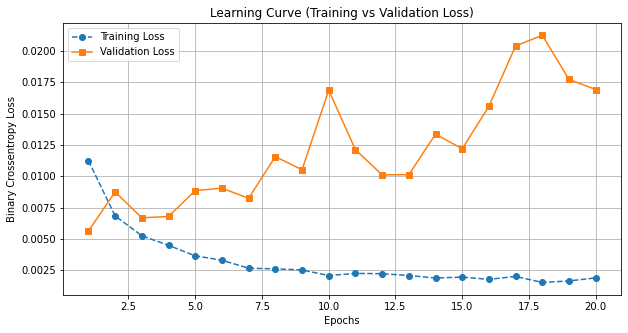

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# 1. Learning Curve (Training vs Validation Loss)
history = best_model_ros.history.history

plt.figure(figsize=(10, 5))
epochs = range(1, len(history['loss']) + 1)

# Plot training loss
plt.plot(epochs, history['loss'], label='Training Loss', linestyle='--', marker='o')

# Plot validation loss (if exists)
val_loss = history.get('val_loss', [])
if val_loss:
    plt.plot(epochs, val_loss, label='Validation Loss', linestyle='-', marker='s')

# # Menambahkan label nilai loss pada titik-titik tertentu
# for epoch, loss in zip(epochs, history['loss']):
#     plt.text(epoch, loss, f'{loss:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# if val_loss:
#     for epoch, val in zip(epochs, val_loss):
#         plt.text(epoch, val, f'{val:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Menambahkan label, judul, dan grid
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.grid()
plt.show()

In [78]:
# Menampilkan semua kombinasi hyperparameters yang diuji
trials = tuner_ros.oracle.get_best_trials(num_trials=5)  # Menampilkan 5 percobaan terbaik

for trial in trials:
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Validation Recall: {trial.score}\n")

Trial ID: 3
Hyperparameters: {'units_layer1': 40, 'units_layer2': 63, 'units_layer3': 10, 'learning_rate': 0.002103917275801273}
Validation Recall: 0.8205128312110901

Trial ID: 1
Hyperparameters: {'units_layer1': 66, 'units_layer2': 42, 'units_layer3': 11, 'learning_rate': 0.0009775664203574934}
Validation Recall: 0.8034188151359558

Trial ID: 0
Hyperparameters: {'units_layer1': 35, 'units_layer2': 36, 'units_layer3': 23, 'learning_rate': 0.035733232555873684}
Validation Recall: 0.752136766910553

Trial ID: 2
Hyperparameters: {'units_layer1': 55, 'units_layer2': 63, 'units_layer3': 43, 'learning_rate': 0.04514107426881946}
Validation Recall: 0.24786325295766196

Trial ID: 4
Hyperparameters: {'units_layer1': 53, 'units_layer2': 31, 'units_layer3': 36, 'learning_rate': 0.05151886225891427}
Validation Recall: 0.24786325295766196



### Smote

In [83]:
from sklearn.metrics import auc, precision_recall_curve

tuner_time3 = time.time()
# Inisialisasi tuner dengan RandomSearch hanya untuk learning rate
tuner_smote = kt.RandomSearch(
    lambda hp: build_ann_model(hp, input_shape_smote),  # Model dengan hanya tuning learning rate
    objective=kt.Objective("val_recall", direction="max"),  # Mencari nilai AUC-PR tertinggi
    max_trials=5,  # Mencoba 5 kombinasi parameter
    executions_per_trial=3,  # Setiap percobaan dieksekusi 3 kali untuk hasil yang lebih stabil
    seed=44,
    directory='CCFD10/my_dir_smote',  # Folder penyimpanan hasil tuning
    project_name='dnn_learning_rate_tuning'
)

# Memulai pencarian learning rate terbaik
tuner_smote.search(df_X_smote_selected, y_smote,
                   epochs=20,
                   batch_size=32,
                   validation_data=(df_X_smote_val_selected, y_val))

# Mendapatkan hasil hyperparameter terbaik
best_hps_smote = tuner_smote.get_best_hyperparameters(num_trials=1)[0]

# Mencetak learning rate terbaik yang ditemukan
print("Best learning rate found:")
print(f"Learning Rate: {best_hps_smote.get('learning_rate')}")

# Membangun model terbaik dengan learning rate terbaik
best_model_smote = tuner_smote.hypermodel.build(best_hps_smote)
end_tuner3 = time.time() - tuner_time3

count10 = time.time()
with tf.device('/GPU:0'):
    best_model_smote.fit(df_X_smote_selected, y_smote,
                         validation_data=(df_X_smote_val_selected, y_val),
                         epochs=20, verbose=1)
end_count10 = (time.time() - count10) + end_time2
end_count10_with_tuning = end_count10 + end_tuner3
print(f"\nWaktu komputasi tanpa hyperparameter tuning: {end_count10} sec")
print(f"\nWaktu komputasi dengan hyperparameter tuning: {end_count10_with_tuning} sec")

best_model_smote.save('CCFD10/smote_model_gain.keras')

Trial 5 Complete [00h 16m 05s]
val_recall: 0.7948718070983887

Best val_recall So Far: 0.7948718070983887
Total elapsed time: 01h 20m 25s
Best learning rate found:
Learning Rate: 0.0002554965400757683
Epoch 1/20
6461/6461 [==============================] - 17s 2ms/step - loss: 0.0227 - accuracy: 0.9966 - precision: 0.9084 - recall: 0.7264 - f1_score: 0.8073 - aucpr: 0.7695 - val_loss: 0.0083 - val_accuracy: 0.9992 - val_precision: 0.7692 - val_recall: 0.7692 - val_f1_score: 0.7692 - val_aucpr: 0.6396
Epoch 2/20
6461/6461 [==============================] - 16s 2ms/step - loss: 0.0103 - accuracy: 0.9978 - precision: 0.9578 - recall: 0.8100 - f1_score: 0.8777 - aucpr: 0.8836 - val_loss: 0.0073 - val_accuracy: 0.9993 - val_precision: 0.8333 - val_recall: 0.7692 - val_f1_score: 0.8000 - val_aucpr: 0.6584
Epoch 3/20
6461/6461 [==============================] - 16s 2ms/step - loss: 0.0095 - accuracy: 0.9978 - precision: 0.9608 - recall: 0.8139 - f1_score: 0.8812 - aucpr: 0.8971 - val_loss: 0.

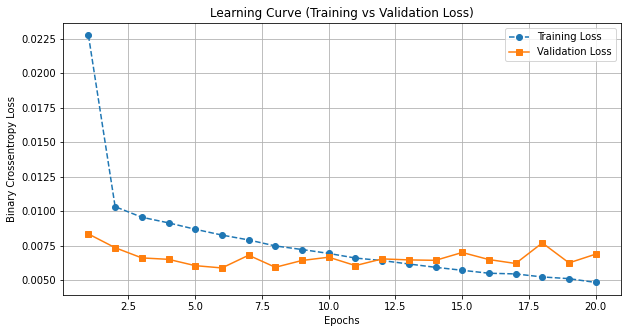

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# 1. Learning Curve (Training vs Validation Loss)
history = best_model_smote.history.history

plt.figure(figsize=(10, 5))
epochs = range(1, len(history['loss']) + 1)

# Plot training loss
plt.plot(epochs, history['loss'], label='Training Loss', linestyle='--', marker='o')

# Plot validation loss (if exists)
val_loss = history.get('val_loss', [])
if val_loss:
    plt.plot(epochs, val_loss, label='Validation Loss', linestyle='-', marker='s')

# # Menambahkan label nilai loss pada titik-titik tertentu
# for epoch, loss in zip(epochs, history['loss']):
#     plt.text(epoch, loss, f'{loss:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# if val_loss:
#     for epoch, val in zip(epochs, val_loss):
#         plt.text(epoch, val, f'{val:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Menambahkan label, judul, dan grid
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.grid()
plt.show()

In [85]:
# Menampilkan semua kombinasi hyperparameters yang diuji
trials = tuner_smote.oracle.get_best_trials(num_trials=5)  # Menampilkan 5 percobaan terbaik

for trial in trials:
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Validation Recall: {trial.score}\n")

Trial ID: 0
Hyperparameters: {'units_layer1': 71, 'units_layer2': 29, 'units_layer3': 58, 'learning_rate': 0.0002554965400757683}
Validation Recall: 0.7948718070983887

Trial ID: 1
Hyperparameters: {'units_layer1': 85, 'units_layer2': 19, 'units_layer3': 36, 'learning_rate': 9.420437028305497e-05}
Validation Recall: 0.7948718070983887

Trial ID: 3
Hyperparameters: {'units_layer1': 125, 'units_layer2': 18, 'units_layer3': 41, 'learning_rate': 7.883914384218181e-05}
Validation Recall: 0.7948718070983887

Trial ID: 4
Hyperparameters: {'units_layer1': 61, 'units_layer2': 40, 'units_layer3': 60, 'learning_rate': 0.0006033327505222818}
Validation Recall: 0.7948718070983887

Trial ID: 2
Hyperparameters: {'units_layer1': 126, 'units_layer2': 46, 'units_layer3': 60, 'learning_rate': 2.2980497006447554e-05}
Validation Recall: 0.7692307829856873



### Adasyn

In [86]:
from sklearn.metrics import auc, precision_recall_curve

tuner_time4 = time.time()
# Inisialisasi tuner dengan RandomSearch hanya untuk learning rate
tuner_adasyn = kt.RandomSearch(
    lambda hp: build_ann_model(hp, input_shape_adasyn),  # Model dengan hanya tuning learning rate
    objective=kt.Objective("val_recall", direction="max"),  # Mencari nilai AUC-PR tertinggi
    max_trials=5,  # Mencoba 5 kombinasi parameter
    executions_per_trial=3,  # Setiap percobaan dieksekusi 3 kali untuk hasil yang lebih stabil
    seed=45,
    directory='CCFD10/my_dir_adasyn',  # Folder penyimpanan hasil tuning
    project_name='dnn_learning_rate_tuning'
)

# Memulai pencarian learning rate terbaik
tuner_adasyn.search(df_X_adasyn_selected, y_adasyn,
                   epochs=20,
                   batch_size=32,
                   validation_data=(df_X_adasyn_val_selected, y_val))

# Mendapatkan hasil hyperparameter terbaik
best_hps_adasyn = tuner_adasyn.get_best_hyperparameters(num_trials=1)[0]

# Mencetak learning rate terbaik yang ditemukan
print("Best learning rate found:")
print(f"Learning Rate: {best_hps_adasyn.get('learning_rate')}")

# Membangun model terbaik dengan learning rate terbaik
best_model_adasyn = tuner_adasyn.hypermodel.build(best_hps_adasyn)
end_tuner4 = time.time() - tuner_time4

count11 = time.time()
with tf.device('/GPU:0'):
    best_model_adasyn.fit(df_X_adasyn_selected, y_adasyn,
                         validation_data=(df_X_adasyn_val_selected, y_val),
                         epochs=20, verbose=1)
end_count11 = (time.time() - count11) + end_time3
end_count11_with_tuning = end_count11 + end_tuner4
print(f"\nWaktu komputasi tanpa hyperparameter tuning: {end_count11} sec")
print(f"\nWaktu komputasi dengan hyperparameter tuning: {end_count11_with_tuning} sec")

best_model_adasyn.save('CCFD10/adasyn_model_gain.keras')

Trial 5 Complete [00h 16m 02s]
val_recall: 0.8034188151359558

Best val_recall So Far: 0.8034188151359558
Total elapsed time: 02h 47m 15s
Best learning rate found:
Learning Rate: 0.00155822911114866
Epoch 1/20
6461/6461 [==============================] - 17s 2ms/step - loss: 0.0311 - accuracy: 0.9937 - precision: 0.8545 - recall: 0.4333 - f1_score: 0.5750 - aucpr: 0.5273 - val_loss: 0.0100 - val_accuracy: 0.9989 - val_precision: 0.6667 - val_recall: 0.7692 - val_f1_score: 0.7143 - val_aucpr: 0.6223
Epoch 2/20
6461/6461 [==============================] - 16s 2ms/step - loss: 0.0255 - accuracy: 0.9942 - precision: 0.8709 - recall: 0.4846 - f1_score: 0.6227 - aucpr: 0.6084 - val_loss: 0.0071 - val_accuracy: 0.9993 - val_precision: 0.8108 - val_recall: 0.7692 - val_f1_score: 0.7895 - val_aucpr: 0.6618
Epoch 3/20
6461/6461 [==============================] - 16s 2ms/step - loss: 0.0239 - accuracy: 0.9944 - precision: 0.8781 - recall: 0.4998 - f1_score: 0.6370 - aucpr: 0.6354 - val_loss: 0.01

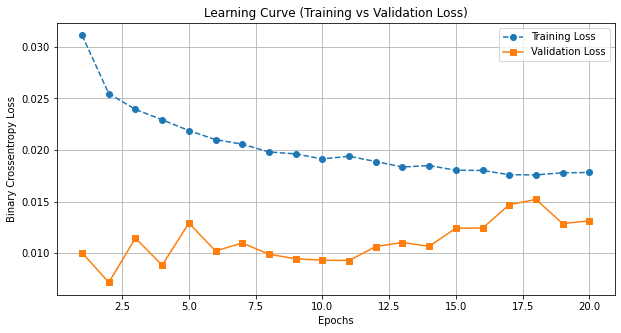

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# 1. Learning Curve (Training vs Validation Loss)
history = best_model_adasyn.history.history

plt.figure(figsize=(10, 5))
epochs = range(1, len(history['loss']) + 1)

# Plot training loss
plt.plot(epochs, history['loss'], label='Training Loss', linestyle='--', marker='o')

# Plot validation loss (if exists)
val_loss = history.get('val_loss', [])
if val_loss:
    plt.plot(epochs, val_loss, label='Validation Loss', linestyle='-', marker='s')

# # Menambahkan label nilai loss pada titik-titik tertentu
# for epoch, loss in zip(epochs, history['loss']):
#     plt.text(epoch, loss, f'{loss:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# if val_loss:
#     for epoch, val in zip(epochs, val_loss):
#         plt.text(epoch, val, f'{val:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Menambahkan label, judul, dan grid
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.grid()
plt.show()

In [88]:
# Menampilkan semua kombinasi hyperparameters yang diuji
trials = tuner_adasyn.oracle.get_best_trials(num_trials=5)  # Menampilkan 5 percobaan terbaik

for trial in trials:
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Validation Recall: {trial.score}\n")

Trial ID: 0
Hyperparameters: {'units_layer1': 58, 'units_layer2': 59, 'units_layer3': 28, 'learning_rate': 0.00155822911114866}
Validation Recall: 0.8034188151359558

Trial ID: 4
Hyperparameters: {'units_layer1': 79, 'units_layer2': 61, 'units_layer3': 33, 'learning_rate': 0.0008028474807082748}
Validation Recall: 0.8034188151359558

Trial ID: 3
Hyperparameters: {'units_layer1': 36, 'units_layer2': 44, 'units_layer3': 20, 'learning_rate': 0.00017030485110152736}
Validation Recall: 0.7777777910232544

Trial ID: 1
Hyperparameters: {'units_layer1': 38, 'units_layer2': 40, 'units_layer3': 21, 'learning_rate': 0.0819255627939509}
Validation Recall: 0.0

Trial ID: 2
Hyperparameters: {'units_layer1': 91, 'units_layer2': 60, 'units_layer3': 13, 'learning_rate': 0.07305950948976508}
Validation Recall: 0.0



### Random Undersampling

In [89]:
from sklearn.metrics import auc, precision_recall_curve

tuner_time5 = time.time()
# Inisialisasi tuner dengan RandomSearch hanya untuk learning rate
tuner_rus = kt.RandomSearch(
    lambda hp: build_ann_model(hp, input_shape_rus),  # Model dengan hanya tuning learning rate
    objective=kt.Objective("val_recall", direction="max"),  # Mencari nilai AUC-PR tertinggi
    max_trials=5,  # Mencoba 5 kombinasi parameter
    executions_per_trial=3,  # Setiap percobaan dieksekusi 3 kali untuk hasil yang lebih stabil
    seed=46,
    directory='CCFD10/my_dir_rus',  # Folder penyimpanan hasil tuning
    project_name='dnn_learning_rate_tuning'
)

# Memulai pencarian learning rate terbaik
tuner_rus.search(df_X_rus_selected, y_rus,
                 epochs=20,
                 batch_size=32,
                 validation_data=(df_X_rus_val_selected, y_val))

# Mendapatkan hasil hyperparameter terbaik
best_hps_rus = tuner_rus.get_best_hyperparameters(num_trials=1)[0]

# Mencetak learning rate terbaik yang ditemukan
print("Best learning rate found:")
print(f"Learning Rate: {best_hps_rus.get('learning_rate')}")

# Membangun model terbaik dengan learning rate terbaik
best_model_rus = tuner_rus.hypermodel.build(best_hps_rus)
end_tuner5 = time.time() - tuner_time5

count12 = time.time()
with tf.device('/GPU:0'):
    best_model_rus.fit(df_X_rus_selected, y_rus,
                       validation_data=(df_X_rus_val_selected, y_val),
                       epochs=20, verbose=1)
end_count12 = (time.time() - count12) + end_time4
end_count12_with_tuning = end_count12 + end_tuner5
print(f"\nWaktu komputasi tanpa hyperparameter tuning: {end_count12} sec")
print(f"\nWaktu komputasi dengan hyperparameter tuning: {end_count12_with_tuning} sec")

best_model_rus.save('CCFD10/randomundersampling_model_gain.keras')

Trial 5 Complete [00h 03m 57s]
val_recall: 0.7692307829856873

Best val_recall So Far: 0.7692307829856873
Total elapsed time: 00h 19m 46s
Best learning rate found:
Learning Rate: 0.002941480046354757
Epoch 1/20
1132/1132 [==============================] - 5s 3ms/step - loss: 0.0274 - accuracy: 0.9964 - precision: 0.8885 - recall: 0.7183 - f1_score: 0.7944 - aucpr: 0.7388 - val_loss: 0.0084 - val_accuracy: 0.9985 - val_precision: 0.5370 - val_recall: 0.7436 - val_f1_score: 0.6237 - val_aucpr: 0.5839
Epoch 2/20
1132/1132 [==============================] - 4s 3ms/step - loss: 0.0146 - accuracy: 0.9970 - precision: 0.9046 - recall: 0.7746 - f1_score: 0.8346 - aucpr: 0.8344 - val_loss: 0.0064 - val_accuracy: 0.9987 - val_precision: 0.6042 - val_recall: 0.7436 - val_f1_score: 0.6667 - val_aucpr: 0.5617
Epoch 3/20
1132/1132 [==============================] - 4s 3ms/step - loss: 0.0142 - accuracy: 0.9971 - precision: 0.9139 - recall: 0.7775 - f1_score: 0.8402 - aucpr: 0.8377 - val_loss: 0.0069

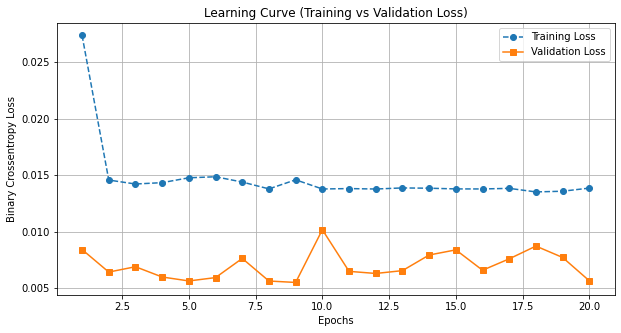

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# 1. Learning Curve (Training vs Validation Loss)
history = best_model_rus.history.history

plt.figure(figsize=(10, 5))
epochs = range(1, len(history['loss']) + 1)

# Plot training loss
plt.plot(epochs, history['loss'], label='Training Loss', linestyle='--', marker='o')

# Plot validation loss (if exists)
val_loss = history.get('val_loss', [])
if val_loss:
    plt.plot(epochs, val_loss, label='Validation Loss', linestyle='-', marker='s')

# # Menambahkan label nilai loss pada titik-titik tertentu
# for epoch, loss in zip(epochs, history['loss']):
#     plt.text(epoch, loss, f'{loss:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# if val_loss:
#     for epoch, val in zip(epochs, val_loss):
#         plt.text(epoch, val, f'{val:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Menambahkan label, judul, dan grid
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.grid()
plt.show()

In [91]:
# Menampilkan semua kombinasi hyperparameters yang diuji
trials = tuner_rus.oracle.get_best_trials(num_trials=5)  # Menampilkan 5 percobaan terbaik

for trial in trials:
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Validation Recall: {trial.score}\n")

Trial ID: 1
Hyperparameters: {'units_layer1': 80, 'units_layer2': 27, 'units_layer3': 63, 'learning_rate': 0.002941480046354757}
Validation Recall: 0.7692307829856873

Trial ID: 3
Hyperparameters: {'units_layer1': 88, 'units_layer2': 26, 'units_layer3': 25, 'learning_rate': 0.0009504947970741314}
Validation Recall: 0.7692307829856873

Trial ID: 4
Hyperparameters: {'units_layer1': 122, 'units_layer2': 37, 'units_layer3': 35, 'learning_rate': 0.0004560117122127547}
Validation Recall: 0.7692307829856873

Trial ID: 2
Hyperparameters: {'units_layer1': 120, 'units_layer2': 20, 'units_layer3': 63, 'learning_rate': 1.4800038812985168e-05}
Validation Recall: 0.7350427508354187

Trial ID: 0
Hyperparameters: {'units_layer1': 118, 'units_layer2': 33, 'units_layer3': 39, 'learning_rate': 1.8515519652548627e-05}
Validation Recall: 0.7264957427978516



### Oversampling followed by undersampling

#### ROS + RUS

In [92]:
from sklearn.metrics import auc, precision_recall_curve

tuner_time6 = time.time()
# Inisialisasi tuner dengan RandomSearch hanya untuk learning rate
tuner_ros_to_rus = kt.RandomSearch(
    lambda hp: build_ann_model(hp, input_shape_ros_to_rus),  # Model dengan hanya tuning learning rate
    objective=kt.Objective("val_recall", direction="max"),  # Mencari nilai AUC-PR tertinggi
    max_trials=5,  # Mencoba 5 kombinasi parameter
    executions_per_trial=3,  # Setiap percobaan dieksekusi 3 kali untuk hasil yang lebih stabil
    seed=47,
    directory='CCFD10/my_dir_ros_to_rus',  # Folder penyimpanan hasil tuning
    project_name='dnn_learning_rate_tuning'
)

# Memulai pencarian learning rate terbaik
tuner_ros_to_rus.search(df_X_ros_to_rus_selected, y_ros_to_rus,
                         epochs=20,
                         batch_size=32,
                         validation_data=(df_X_ros_to_rus_val_selected, y_val))

# Mendapatkan hasil hyperparameter terbaik
best_hps_ros_to_rus = tuner_ros_to_rus.get_best_hyperparameters(num_trials=1)[0]

# Mencetak learning rate terbaik yang ditemukan
print("Best learning rate found:")
print(f"Learning Rate: {best_hps_ros_to_rus.get('learning_rate')}")

# Membangun model terbaik dengan learning rate terbaik
best_model_ros_to_rus = tuner_ros_to_rus.hypermodel.build(best_hps_ros_to_rus)
end_tuner6 = time.time() - tuner_time6

count13 = time.time()
with tf.device('/GPU:0'):
    best_model_ros_to_rus.fit(df_X_ros_to_rus_selected, y_ros_to_rus,
                               validation_data=(df_X_ros_to_rus_val_selected, y_val),
                               epochs=20, verbose=1)
end_count13 = (time.time() - count13) + end_time5
end_count13_with_tuning = end_count13 + end_tuner6
print(f"\nWaktu komputasi tanpa hyperparameter tuning: {end_count13} sec")
print(f"\nWaktu komputasi dengan hyperparameter tuning: {end_count13_with_tuning} sec")

best_model_ros_to_rus.save('CCFD10/ros_to_rus_model_gain.keras')

Trial 5 Complete [00h 06m 39s]
val_recall: 0.7606837749481201

Best val_recall So Far: 0.811965823173523
Total elapsed time: 00h 33m 16s
Best learning rate found:
Learning Rate: 0.002103917275801273
Epoch 1/20
2262/2262 [==============================] - 7s 3ms/step - loss: 0.0175 - accuracy: 0.9969 - precision: 0.8760 - recall: 0.7958 - f1_score: 0.8339 - aucpr: 0.8228 - val_loss: 0.0071 - val_accuracy: 0.9993 - val_precision: 0.7895 - val_recall: 0.7692 - val_f1_score: 0.7792 - val_aucpr: 0.6563
Epoch 2/20
2262/2262 [==============================] - 6s 3ms/step - loss: 0.0091 - accuracy: 0.9981 - precision: 0.9583 - recall: 0.8423 - f1_score: 0.8966 - aucpr: 0.9033 - val_loss: 0.0074 - val_accuracy: 0.9992 - val_precision: 0.7838 - val_recall: 0.7436 - val_f1_score: 0.7632 - val_aucpr: 0.6478
Epoch 3/20
2262/2262 [==============================] - 6s 3ms/step - loss: 0.0086 - accuracy: 0.9981 - precision: 0.9509 - recall: 0.8451 - f1_score: 0.8949 - aucpr: 0.9014 - val_loss: 0.0070 

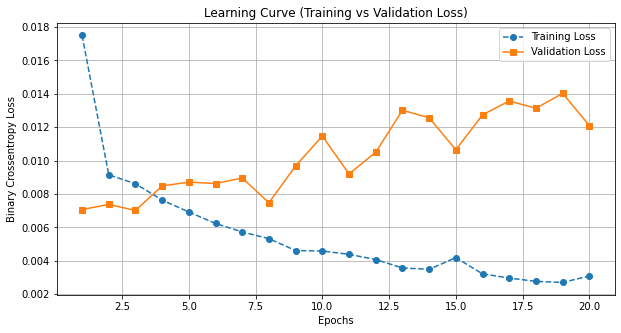

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# 1. Learning Curve (Training vs Validation Loss)
history = best_model_ros_to_rus.history.history

plt.figure(figsize=(10, 5))
epochs = range(1, len(history['loss']) + 1)

# Plot training loss
plt.plot(epochs, history['loss'], label='Training Loss', linestyle='--', marker='o')

# Plot validation loss (if exists)
val_loss = history.get('val_loss', [])
if val_loss:
    plt.plot(epochs, val_loss, label='Validation Loss', linestyle='-', marker='s')

# # Menambahkan label nilai loss pada titik-titik tertentu
# for epoch, loss in zip(epochs, history['loss']):
#     plt.text(epoch, loss, f'{loss:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# if val_loss:
#     for epoch, val in zip(epochs, val_loss):
#         plt.text(epoch, val, f'{val:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Menambahkan label, judul, dan grid
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.grid()
plt.show()

In [94]:
# Menampilkan semua kombinasi hyperparameters yang diuji
trials = tuner_ros_to_rus.oracle.get_best_trials(num_trials=5)  # Menampilkan 5 percobaan terbaik

for trial in trials:
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Validation Recall: {trial.score}\n")

Trial ID: 2
Hyperparameters: {'units_layer1': 40, 'units_layer2': 63, 'units_layer3': 10, 'learning_rate': 0.002103917275801273}
Validation Recall: 0.811965823173523

Trial ID: 0
Hyperparameters: {'units_layer1': 66, 'units_layer2': 42, 'units_layer3': 11, 'learning_rate': 0.0009775664203574934}
Validation Recall: 0.8034188151359558

Trial ID: 4
Hyperparameters: {'units_layer1': 75, 'units_layer2': 39, 'units_layer3': 31, 'learning_rate': 1.919710358262862e-05}
Validation Recall: 0.7606837749481201

Trial ID: 3
Hyperparameters: {'units_layer1': 53, 'units_layer2': 31, 'units_layer3': 36, 'learning_rate': 0.05151886225891427}
Validation Recall: 0.09401709834734599

Trial ID: 1
Hyperparameters: {'units_layer1': 55, 'units_layer2': 63, 'units_layer3': 43, 'learning_rate': 0.04514107426881946}
Validation Recall: 0.0



#### Smote + RUS

In [95]:
from sklearn.metrics import auc, precision_recall_curve

tuner_time7 = time.time()
# Inisialisasi tuner dengan RandomSearch hanya untuk learning rate
tuner_smote_to_rus = kt.RandomSearch(
    lambda hp: build_ann_model(hp, input_shape_smote_to_rus),  # Model dengan hanya tuning learning rate
    objective=kt.Objective("val_recall", direction="max"),  # Mencari nilai AUC-PR tertinggi
    max_trials=5,  # Mencoba 5 kombinasi parameter
    executions_per_trial=3,  # Setiap percobaan dieksekusi 3 kali untuk hasil yang lebih stabil
    seed=48,
    directory='CCFD10/my_dir_smote_to_rus',  # Folder penyimpanan hasil tuning
    project_name='dnn_learning_rate_tuning'
)

# Memulai pencarian learning rate terbaik
tuner_smote_to_rus.search(df_X_smote_to_rus_selected, y_smote_to_rus,
                           epochs=20,
                           batch_size=32,
                           validation_data=(df_X_smote_to_rus_val_selected, y_val))

# Mendapatkan hasil hyperparameter terbaik
best_hps_smote_to_rus = tuner_smote_to_rus.get_best_hyperparameters(num_trials=1)[0]

# Mencetak learning rate terbaik yang ditemukan
print("Best learning rate found:")
print(f"Learning Rate: {best_hps_smote_to_rus.get('learning_rate')}")

# Membangun model terbaik dengan learning rate terbaik
best_model_smote_to_rus = tuner_smote_to_rus.hypermodel.build(best_hps_smote_to_rus)
end_tuner7 = time.time() - tuner_time7

count14 = time.time()
with tf.device('/GPU:0'):
    best_model_smote_to_rus.fit(df_X_smote_to_rus_selected, y_smote_to_rus,
                                 validation_data=(df_X_smote_to_rus_val_selected, y_val),
                                 epochs=20, verbose=1)
end_count14 = (time.time() - count14) + end_time6
end_count14_with_tuning = end_count14 + end_tuner7
print(f"\nWaktu komputasi tanpa hyperparameter tuning: {end_count14} sec")
print(f"\nWaktu komputasi dengan hyperparameter tuning: {end_count14_with_tuning} sec")

best_model_smote_to_rus.save('CCFD10/smote_to_rus_model_gain.keras')

Trial 5 Complete [00h 06m 38s]
val_recall: 0.7606837749481201

Best val_recall So Far: 0.7777777910232544
Total elapsed time: 00h 33m 17s
Best learning rate found:
Learning Rate: 0.0006033327505222818
Epoch 1/20
2262/2262 [==============================] - 7s 3ms/step - loss: 0.0277 - accuracy: 0.9968 - precision: 0.9051 - recall: 0.7521 - f1_score: 0.8215 - aucpr: 0.7690 - val_loss: 0.0061 - val_accuracy: 0.9993 - val_precision: 0.8286 - val_recall: 0.7436 - val_f1_score: 0.7838 - val_aucpr: 0.6362
Epoch 2/20
2262/2262 [==============================] - 6s 3ms/step - loss: 0.0111 - accuracy: 0.9979 - precision: 0.9572 - recall: 0.8197 - f1_score: 0.8832 - aucpr: 0.8661 - val_loss: 0.0068 - val_accuracy: 0.9993 - val_precision: 0.8333 - val_recall: 0.7692 - val_f1_score: 0.8000 - val_aucpr: 0.6437
Epoch 3/20
2262/2262 [==============================] - 6s 3ms/step - loss: 0.0105 - accuracy: 0.9978 - precision: 0.9555 - recall: 0.8169 - f1_score: 0.8808 - aucpr: 0.8772 - val_loss: 0.006

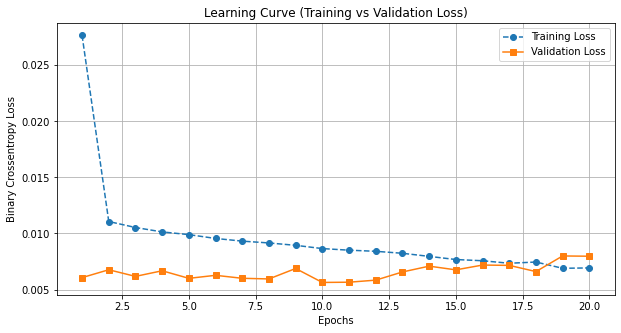

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# 1. Learning Curve (Training vs Validation Loss)
history = best_model_smote_to_rus.history.history

plt.figure(figsize=(10, 5))
epochs = range(1, len(history['loss']) + 1)

# Plot training loss
plt.plot(epochs, history['loss'], label='Training Loss', linestyle='--', marker='o')

# Plot validation loss (if exists)
val_loss = history.get('val_loss', [])
if val_loss:
    plt.plot(epochs, val_loss, label='Validation Loss', linestyle='-', marker='s')

# # Menambahkan label nilai loss pada titik-titik tertentu
# for epoch, loss in zip(epochs, history['loss']):
#     plt.text(epoch, loss, f'{loss:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# if val_loss:
#     for epoch, val in zip(epochs, val_loss):
#         plt.text(epoch, val, f'{val:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Menambahkan label, judul, dan grid
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.grid()
plt.show()

In [97]:
# Menampilkan semua kombinasi hyperparameters yang diuji
trials = tuner_smote_to_rus.oracle.get_best_trials(num_trials=5)  # Menampilkan 5 percobaan terbaik

for trial in trials:
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Validation Recall: {trial.score}\n")

Trial ID: 3
Hyperparameters: {'units_layer1': 61, 'units_layer2': 40, 'units_layer3': 60, 'learning_rate': 0.0006033327505222818}
Validation Recall: 0.7777777910232544

Trial ID: 0
Hyperparameters: {'units_layer1': 85, 'units_layer2': 19, 'units_layer3': 36, 'learning_rate': 9.420437028305497e-05}
Validation Recall: 0.7692307829856873

Trial ID: 1
Hyperparameters: {'units_layer1': 126, 'units_layer2': 46, 'units_layer3': 60, 'learning_rate': 2.2980497006447554e-05}
Validation Recall: 0.7692307829856873

Trial ID: 2
Hyperparameters: {'units_layer1': 125, 'units_layer2': 18, 'units_layer3': 41, 'learning_rate': 7.883914384218181e-05}
Validation Recall: 0.7692307829856873

Trial ID: 4
Hyperparameters: {'units_layer1': 78, 'units_layer2': 36, 'units_layer3': 12, 'learning_rate': 1.991475773272288e-05}
Validation Recall: 0.7606837749481201



### Undersampling followed by oversampling

#### RUS + ROS

In [98]:
from sklearn.metrics import auc, precision_recall_curve

tuner_time8 = time.time()
# Inisialisasi tuner dengan RandomSearch hanya untuk learning rate
tuner_rus_to_ros = kt.RandomSearch(
    lambda hp: build_ann_model(hp, input_shape_rus_to_ros),  # Model dengan hanya tuning learning rate
    objective=kt.Objective("val_recall", direction="max"),  # Mencari nilai AUC-PR tertinggi
    max_trials=5,  # Mencoba 5 kombinasi parameter
    executions_per_trial=3,  # Setiap percobaan dieksekusi 3 kali untuk hasil yang lebih stabil
    seed=49,
    directory='CCFD10/my_dir_rus_to_ros',  # Folder penyimpanan hasil tuning
    project_name='dnn_learning_rate_tuning'
)

# Memulai pencarian learning rate terbaik
tuner_rus_to_ros.search(df_X_rus_to_ros_selected, y_rus_to_ros,
                           epochs=20,
                           batch_size=32,
                           validation_data=(df_X_rus_to_ros_val_selected, y_val))

# Mendapatkan hasil hyperparameter terbaik
best_hps_rus_to_ros = tuner_rus_to_ros.get_best_hyperparameters(num_trials=1)[0]

# Mencetak learning rate terbaik yang ditemukan
print("Best learning rate found:")
print(f"Learning Rate: {best_hps_rus_to_ros.get('learning_rate')}")

# Membangun model terbaik dengan learning rate terbaik
best_model_rus_to_ros = tuner_rus_to_ros.hypermodel.build(best_hps_rus_to_ros)
end_tuner8 = time.time() - tuner_time8

count15 = time.time()
with tf.device('/GPU:0'):
    best_model_rus_to_ros.fit(df_X_rus_to_ros_selected, y_rus_to_ros,
                                 validation_data=(df_X_rus_to_ros_val_selected, y_val),
                                 epochs=20, verbose=1)
end_count15 = (time.time() - count15) + end_time7
end_count15_with_tuning = end_count15 + end_tuner8
print(f"\nWaktu komputasi tanpa hyperparameter tuning: {end_count15} sec")
print(f"\nWaktu komputasi dengan hyperparameter tuning: {end_count15_with_tuning} sec")

best_model_rus_to_ros.save('CCFD10/rus_to_ros_model_gain.keras')

Trial 5 Complete [00h 08m 57s]
val_recall: 0.8034188151359558

Best val_recall So Far: 0.811965823173523
Total elapsed time: 00h 44m 46s
Best learning rate found:
Learning Rate: 0.00017030485110152736
Epoch 1/20
3232/3232 [==============================] - 10s 3ms/step - loss: 0.0449 - accuracy: 0.9959 - precision: 0.9508 - recall: 0.6347 - f1_score: 0.7613 - aucpr: 0.6535 - val_loss: 0.0064 - val_accuracy: 0.9993 - val_precision: 0.8286 - val_recall: 0.7436 - val_f1_score: 0.7838 - val_aucpr: 0.6319
Epoch 2/20
3232/3232 [==============================] - 9s 3ms/step - loss: 0.0111 - accuracy: 0.9979 - precision: 0.9699 - recall: 0.8178 - f1_score: 0.8874 - aucpr: 0.8811 - val_loss: 0.0052 - val_accuracy: 0.9993 - val_precision: 0.8286 - val_recall: 0.7436 - val_f1_score: 0.7838 - val_aucpr: 0.6089
Epoch 3/20
3232/3232 [==============================] - 9s 3ms/step - loss: 0.0098 - accuracy: 0.9980 - precision: 0.9632 - recall: 0.8366 - f1_score: 0.8955 - aucpr: 0.8953 - val_loss: 0.00

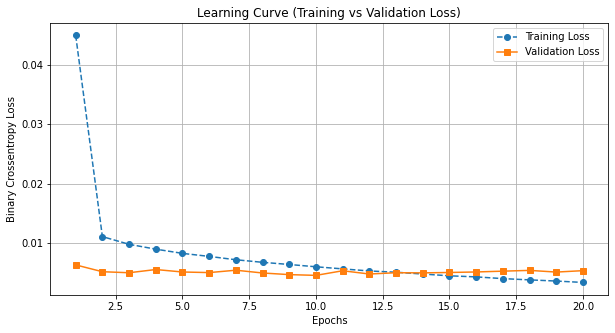

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# 1. Learning Curve (Training vs Validation Loss)
history = best_model_rus_to_ros.history.history

plt.figure(figsize=(10, 5))
epochs = range(1, len(history['loss']) + 1)

# Plot training loss
plt.plot(epochs, history['loss'], label='Training Loss', linestyle='--', marker='o')

# Plot validation loss (if exists)
val_loss = history.get('val_loss', [])
if val_loss:
    plt.plot(epochs, val_loss, label='Validation Loss', linestyle='-', marker='s')

# Menambahkan label nilai loss pada titik-titik tertentu
# for epoch, loss in zip(epochs, history['loss']):
#     plt.text(epoch, loss, f'{loss:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# if val_loss:
#     for epoch, val in zip(epochs, val_loss):
#         plt.text(epoch, val, f'{val:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Menambahkan label, judul, dan grid
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.grid()
plt.show()

In [100]:
# Menampilkan semua kombinasi hyperparameters yang diuji
trials = tuner_rus_to_ros.oracle.get_best_trials(num_trials=5)  # Menampilkan 5 percobaan terbaik

for trial in trials:
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Validation Recall: {trial.score}\n")

Trial ID: 2
Hyperparameters: {'units_layer1': 36, 'units_layer2': 44, 'units_layer3': 20, 'learning_rate': 0.00017030485110152736}
Validation Recall: 0.811965823173523

Trial ID: 3
Hyperparameters: {'units_layer1': 79, 'units_layer2': 61, 'units_layer3': 33, 'learning_rate': 0.0008028474807082748}
Validation Recall: 0.8034188151359558

Trial ID: 4
Hyperparameters: {'units_layer1': 72, 'units_layer2': 19, 'units_layer3': 12, 'learning_rate': 0.009261380821587763}
Validation Recall: 0.8034188151359558

Trial ID: 0
Hyperparameters: {'units_layer1': 38, 'units_layer2': 40, 'units_layer3': 21, 'learning_rate': 0.0819255627939509}
Validation Recall: 0.24786325295766196

Trial ID: 1
Hyperparameters: {'units_layer1': 91, 'units_layer2': 60, 'units_layer3': 13, 'learning_rate': 0.07305950948976508}
Validation Recall: 0.0



#### RUS + Smote

In [101]:
from sklearn.metrics import auc, precision_recall_curve

tuner_time9 = time.time()
# Inisialisasi tuner dengan RandomSearch hanya untuk learning rate
tuner_rus_to_smote = kt.RandomSearch(
    lambda hp: build_ann_model(hp, input_shape_rus_to_smote),  # Model dengan hanya tuning learning rate
    objective=kt.Objective("val_recall", direction="max"),  # Mencari nilai AUC-PR tertinggi
    max_trials=5,  # Mencoba 5 kombinasi parameter
    executions_per_trial=3,  # Setiap percobaan dieksekusi 3 kali untuk hasil yang lebih stabil
    seed=50,
    directory='CCFD10/my_dir_rus_to_smote',  # Folder penyimpanan hasil tuning
    project_name='dnn_learning_rate_tuning'
)

# Memulai pencarian learning rate terbaik
tuner_rus_to_smote.search(df_X_rus_to_smote_selected, y_rus_to_smote,
                           epochs=20,
                           batch_size=32,
                           validation_data=(df_X_rus_to_smote_val_selected, y_val))

# Mendapatkan hasil hyperparameter terbaik
best_hps_rus_to_smote = tuner_rus_to_smote.get_best_hyperparameters(num_trials=1)[0]

# Mencetak learning rate terbaik yang ditemukan
print("Best learning rate found:")
print(f"Learning Rate: {best_hps_rus_to_smote.get('learning_rate')}")

# Membangun model terbaik dengan learning rate terbaik
best_model_rus_to_smote = tuner_rus_to_smote.hypermodel.build(best_hps_rus_to_smote)
end_tuner9 = time.time() - tuner_time9

count16 = time.time()
with tf.device('/GPU:0'):
    best_model_rus_to_smote.fit(df_X_rus_to_smote_selected, y_rus_to_smote,
                                 validation_data=(df_X_rus_to_smote_val_selected, y_val),
                                 epochs=20, verbose=1)
end_count16 = (time.time() - count16) + end_time8
end_count16_with_tuning = end_count16 + end_tuner9
print(f"\nWaktu komputasi tanpa hyperparameter tuning: {end_count16} sec")
print(f"\nWaktu komputasi dengan hyperparameter tuning: {end_count16_with_tuning} sec")

best_model_rus_to_smote.save('CCFD10/rus_to_smote_model_gain.keras')

Trial 5 Complete [00h 08m 58s]
val_recall: 0.7692307829856873

Best val_recall So Far: 0.7692307829856873
Total elapsed time: 00h 44m 55s
Best learning rate found:
Learning Rate: 0.002941480046354757
Epoch 1/20
3232/3232 [==============================] - 9s 3ms/step - loss: 0.0186 - accuracy: 0.9967 - precision: 0.8888 - recall: 0.7728 - f1_score: 0.8267 - aucpr: 0.8067 - val_loss: 0.0067 - val_accuracy: 0.9993 - val_precision: 0.8286 - val_recall: 0.7436 - val_f1_score: 0.7838 - val_aucpr: 0.6246
Epoch 2/20
3232/3232 [==============================] - 9s 3ms/step - loss: 0.0135 - accuracy: 0.9977 - precision: 0.9588 - recall: 0.8075 - f1_score: 0.8767 - aucpr: 0.8445 - val_loss: 0.0056 - val_accuracy: 0.9993 - val_precision: 0.8286 - val_recall: 0.7436 - val_f1_score: 0.7838 - val_aucpr: 0.6071
Epoch 3/20
3232/3232 [==============================] - 9s 3ms/step - loss: 0.0128 - accuracy: 0.9977 - precision: 0.9592 - recall: 0.8160 - f1_score: 0.8818 - aucpr: 0.8549 - val_loss: 0.0058

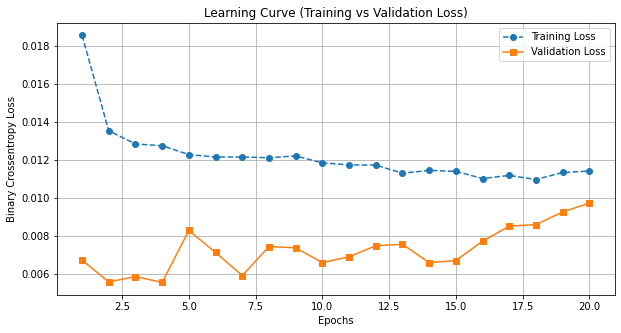

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# 1. Learning Curve (Training vs Validation Loss)
history = best_model_rus_to_smote.history.history

plt.figure(figsize=(10, 5))
epochs = range(1, len(history['loss']) + 1)

# Plot training loss
plt.plot(epochs, history['loss'], label='Training Loss', linestyle='--', marker='o')

# Plot validation loss (if exists)
val_loss = history.get('val_loss', [])
if val_loss:
    plt.plot(epochs, val_loss, label='Validation Loss', linestyle='-', marker='s')

# # Menambahkan label nilai loss pada titik-titik tertentu
# for epoch, loss in zip(epochs, history['loss']):
#     plt.text(epoch, loss, f'{loss:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# if val_loss:
#     for epoch, val in zip(epochs, val_loss):
#         plt.text(epoch, val, f'{val:.4f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Menambahkan label, judul, dan grid
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve (Training vs Validation Loss)')
plt.legend()
plt.grid()
plt.show()

In [103]:
# Menampilkan semua kombinasi hyperparameters yang diuji
trials = tuner_rus_to_smote.oracle.get_best_trials(num_trials=5)  # Menampilkan 5 percobaan terbaik

for trial in trials:
    print(f"Trial ID: {trial.trial_id}")
    print(f"Hyperparameters: {trial.hyperparameters.values}")
    print(f"Validation Recall: {trial.score}\n")

Trial ID: 0
Hyperparameters: {'units_layer1': 80, 'units_layer2': 27, 'units_layer3': 63, 'learning_rate': 0.002941480046354757}
Validation Recall: 0.7692307829856873

Trial ID: 1
Hyperparameters: {'units_layer1': 120, 'units_layer2': 20, 'units_layer3': 63, 'learning_rate': 1.4800038812985168e-05}
Validation Recall: 0.7692307829856873

Trial ID: 2
Hyperparameters: {'units_layer1': 88, 'units_layer2': 26, 'units_layer3': 25, 'learning_rate': 0.0009504947970741314}
Validation Recall: 0.7692307829856873

Trial ID: 3
Hyperparameters: {'units_layer1': 122, 'units_layer2': 37, 'units_layer3': 35, 'learning_rate': 0.0004560117122127547}
Validation Recall: 0.7692307829856873

Trial ID: 4
Hyperparameters: {'units_layer1': 38, 'units_layer2': 19, 'units_layer3': 50, 'learning_rate': 0.005457123842389516}
Validation Recall: 0.7692307829856873



In [104]:
current_time = datetime.now()

# Mencetak waktu dalam format jam:menit:detik
print("End of tuning hyperparameter")
print(current_time.strftime("%H:%M:%S"))

End of tuning hyperparameter
15:52:43


# Testing

In [105]:
current_time = datetime.now()

# Mencetak waktu dalam format jam:menit:detik
print("start of testing")
print(current_time.strftime("%H:%M:%S"))

start of testing
15:52:43


In [106]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Fungsi untuk mengevaluasi model pada data test, termasuk:
    - Confusion Matrix

    Parameters:
    - model: Model Keras yang sudah dilatih
    - X_test: Data fitur untuk pengujian
    - y_test: Label target untuk pengujian
    - model_name (str): Nama model untuk ditampilkan dalam output
    """
    print(f"\n==================== Evaluasi {model_name} ====================")

    # ================================
    # Evaluasi Model pada Data Test
    # ================================
    test_loss, test_acc, test_precision, test_recall, test_f1, test_aucpr = model.evaluate(X_test, y_test, verbose=1)

    print(f"\n🔹 **Metrics Evaluation before adjusting threshold: **")
    print(f"🔹 Test Loss: {test_loss:.4f}")
    print(f"🔹 Test Accuracy: {test_acc:.4f}")
    print(f"🔹 Test Precision: {test_precision:.4f}")
    print(f"🔹 Test Recall: {test_recall:.4f}")
    print(f"🔹 Test F1 Score: {test_f1:.4f}")
    print(f"🔹 Test AUCPR: {test_aucpr:.4f}")
    
    # Mendapatkan Probabilitas Prediksi
    un_time = time.time()
    y_pred_prob = model.predict(X_test).flatten()
    en_time = time.time() - un_time
    print(y_pred_prob)

    # Mengkonversi probabilitas ke label kelas berdasarkan thresholding
    start_time4 = time.time()
    with tf.device('/GPU:0'):
        y_pred4 = (y_pred_prob >= 0.1).astype(int)
    end_time4 = time.time() - start_time4 + en_time

    start_time5 = time.time()
    with tf.device('/GPU:0'):
        y_pred5 = (y_pred_prob >= 0.2).astype(int)
    end_time5 = time.time() - start_time5 + en_time

    start_time6 = time.time()
    with tf.device('/GPU:0'):
        y_pred6 = (y_pred_prob >= 0.3).astype(int)
    end_time6 = time.time() - start_time6 + en_time

    start_time7 = time.time()
    with tf.device('/GPU:0'):
        y_pred7 = (y_pred_prob >= 0.4).astype(int)
    end_time7 = time.time() - start_time7 + en_time

    start_time8 = time.time()
    with tf.device('/GPU:0'):
        y_pred8 = (y_pred_prob >= 0.5).astype(int)
    end_time8 = time.time() - start_time8 + en_time

    start_time9 = time.time()
    with tf.device('/GPU:0'):
        y_pred9 = (y_pred_prob >= 0.6).astype(int)
    end_time9 = time.time() - start_time9 + en_time

    start_time10 = time.time()
    with tf.device('/GPU:0'):
        y_pred10 = (y_pred_prob >= 0.7).astype(int)
    end_time10 = time.time() - start_time10 + en_time

    start_time11 = time.time()
    with tf.device('/GPU:0'):
        y_pred11 = (y_pred_prob >= 0.8).astype(int)
    end_time11 = time.time() - start_time11 + en_time

    start_time12 = time.time()
    with tf.device('/GPU:0'):
        y_pred12 = (y_pred_prob >= 0.9).astype(int)
    end_time12 = time.time() - start_time12 + en_time

    print(f"\nLatency After hyperparameter tuning with threshold 0.1: {end_time4:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.2: {end_time5:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.3: {end_time6:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.4: {end_time7:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.5: {end_time8:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.6: {end_time9:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.7: {end_time10:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.8: {end_time11:.6f} sec")
    print(f"\nLatency After hyperparameter tuning with threshold 0.9: {end_time12:.6f} sec")


    # Menghitung Confusion Matrix
    cm1 = confusion_matrix(y_test, y_pred4)
    cm2 = confusion_matrix(y_test, y_pred5)
    cm3 = confusion_matrix(y_test, y_pred6)
    cm4 = confusion_matrix(y_test, y_pred7)
    cm5 = confusion_matrix(y_test, y_pred8)
    cm6 = confusion_matrix(y_test, y_pred9)
    cm7 = confusion_matrix(y_test, y_pred10)
    cm8 = confusion_matrix(y_test, y_pred11)
    cm9 = confusion_matrix(y_test, y_pred12)
    

    # Menghitung AUCPR
    aucpr = average_precision_score(y_test, y_pred_prob)  # pakai probabilitas, bukan y_pred4
    print(f"AUC-PR dengan scikit-learn: {aucpr:.4f} \n")
    
    precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_pred_prob)

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.1:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred4)
    recall = recall_score(y_test, y_pred4)
    precision = precision_score(y_test, y_pred4)
    f1 = f1_score(y_test, y_pred4)

    # Menampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.2:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred5)
    recall = recall_score(y_test, y_pred5)
    precision = precision_score(y_test, y_pred5)
    f1 = f1_score(y_test, y_pred5)
    
    # menampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.3:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred6)
    recall = recall_score(y_test, y_pred6)
    precision = precision_score(y_test, y_pred6)
    f1 = f1_score(y_test, y_pred6)
    
    # menampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.4:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred7)
    recall = recall_score(y_test, y_pred7)
    precision = precision_score(y_test, y_pred7)
    f1 = f1_score(y_test, y_pred7)
    
    # menampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.5:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred8)
    recall = recall_score(y_test, y_pred8)
    precision = precision_score(y_test, y_pred8)
    f1 = f1_score(y_test, y_pred8)
    
    # menampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.6:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm6, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred9)
    recall = recall_score(y_test, y_pred9)
    precision = precision_score(y_test, y_pred9)
    f1 = f1_score(y_test, y_pred9)
    
    # menampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.7:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm7, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred10)
    recall = recall_score(y_test, y_pred10)
    precision = precision_score(y_test, y_pred10)
    f1 = f1_score(y_test, y_pred10)
    
    # menampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.8:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm8, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred11)
    recall = recall_score(y_test, y_pred11)
    precision = precision_score(y_test, y_pred11)
    f1 = f1_score(y_test, y_pred11)
    
    # menampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menampilkan Confusion Matrix
    print("\n🔹 Confusion Matrix with threshold 0.9:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm9, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues")
    plt.show()
    
    # Menghitung skor-skor
    accuracy = accuracy_score(y_test, y_pred12)
    recall = recall_score(y_test, y_pred12)
    precision = precision_score(y_test, y_pred12)
    f1 = f1_score(y_test, y_pred12)
    
    # Menampilkan semua
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    print("\n")
    print(f"aucpr, precision curve, recall curve: {aucpr}, {precision_pr}, {recall_pr}")
    
    return aucpr, precision_pr, recall_pr


==================== Evaluasi No Method Model ====================
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - precision: 0.8265 - recall: 0.8265 - f1_score: 0.8265 - aucpr: 0.8477

🔹 **Metrics Evaluation before adjusting threshold: **
🔹 Test Loss: 0.0031
🔹 Test Accuracy: 0.9994
🔹 Test Precision: 0.8265
🔹 Test Recall: 0.8265
🔹 Test F1 Score: 0.8265
🔹 Test AUCPR: 0.8477
1781/1781 [==============================] - 1s 433us/step
[1.3442443e-05 7.8788185e-07 1.8190684e-10 ... 2.4593987e-09 7.7086755e-05
 4.1305966e-04]

Latency After hyperparameter tuning with threshold 0.1: 1.267413 sec

Latency After hyperparameter tuning with threshold 0.2: 1.267286 sec

Latency After hyperparameter tuning with threshold 0.3: 1.267251 sec

Latency After hyperparameter tuning with threshold 0.4: 1.267250 sec

Latency After hyperparameter tuning with threshold 0.5: 1.267316 sec

Latency After hyperparameter tuning with threshold 0.6: 1.267313 sec

Latency

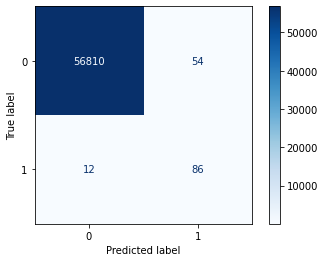

Akurasi: 0.9988
Recall: 0.8776
Precision: 0.6143
F1 Score: 0.7227

🔹 Confusion Matrix with threshold 0.2:


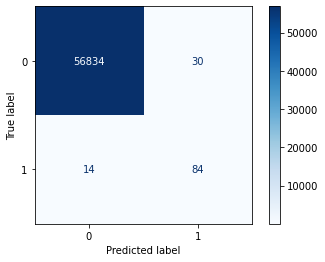

Akurasi: 0.9992
Recall: 0.8571
Precision: 0.7368
F1 Score: 0.7925

🔹 Confusion Matrix with threshold 0.3:


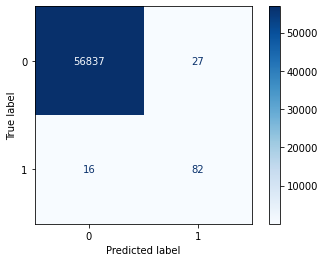

Akurasi: 0.9992
Recall: 0.8367
Precision: 0.7523
F1 Score: 0.7923

🔹 Confusion Matrix with threshold 0.4:


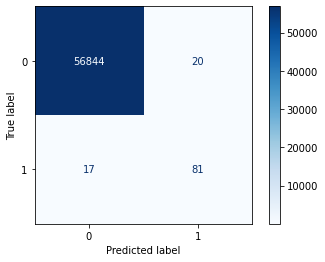

Akurasi: 0.9994
Recall: 0.8265
Precision: 0.8020
F1 Score: 0.8141

🔹 Confusion Matrix with threshold 0.5:


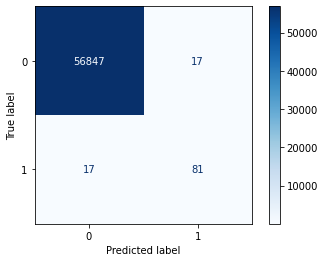

Akurasi: 0.9994
Recall: 0.8265
Precision: 0.8265
F1 Score: 0.8265

🔹 Confusion Matrix with threshold 0.6:


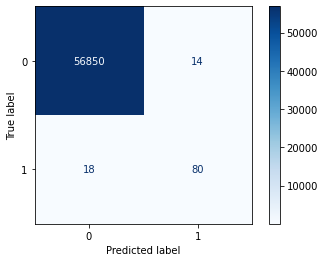

Akurasi: 0.9994
Recall: 0.8163
Precision: 0.8511
F1 Score: 0.8333

🔹 Confusion Matrix with threshold 0.7:


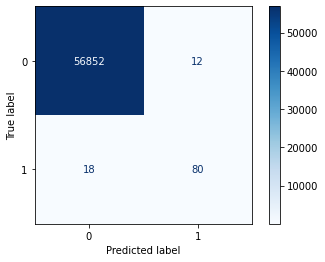

Akurasi: 0.9995
Recall: 0.8163
Precision: 0.8696
F1 Score: 0.8421

🔹 Confusion Matrix with threshold 0.8:


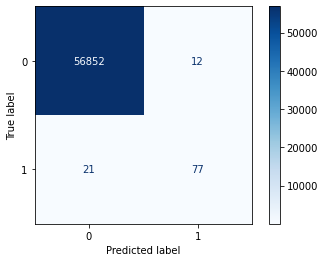

Akurasi: 0.9994
Recall: 0.7857
Precision: 0.8652
F1 Score: 0.8235

🔹 Confusion Matrix with threshold 0.9:


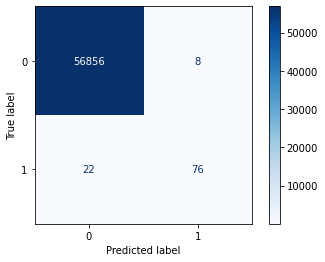

Akurasi: 0.9995
Recall: 0.7755
Precision: 0.9048
F1 Score: 0.8352


aucpr, precision curve, recall curve: 0.8570693723162346, [0.00172045 0.00172078 0.00172081 ... 1.         1.         1.        ], [1.         1.         1.         ... 0.10204082 0.09183673 0.        ]

==================== Evaluasi ROS Model ====================
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0067 - accuracy: 0.9992 - precision: 0.7477 - recall: 0.8469 - f1_score: 0.7943 - aucpr: 0.7905

🔹 **Metrics Evaluation before adjusting threshold: **
🔹 Test Loss: 0.0067
🔹 Test Accuracy: 0.9992
🔹 Test Precision: 0.7477
🔹 Test Recall: 0.8469
🔹 Test F1 Score: 0.7943
🔹 Test AUCPR: 0.7905
1781/1781 [==============================] - 1s 432us/step
[3.3608039e-13 7.5438066e-34 1.1082934e-15 ... 1.9105142e-24 1.8885494e-11
 3.0606684e-15]

Latency After hyperparameter tuning with threshold 0.1: 1.141478 sec

Latency After hyperparameter tuning with threshold 0.2: 1.141372 sec

Latency After hyperpar

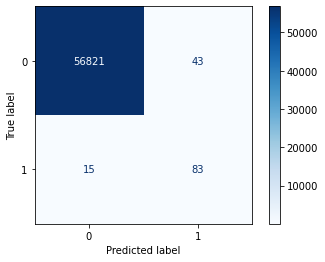

Akurasi: 0.9990
Recall: 0.8469
Precision: 0.6587
F1 Score: 0.7411

🔹 Confusion Matrix with threshold 0.2:


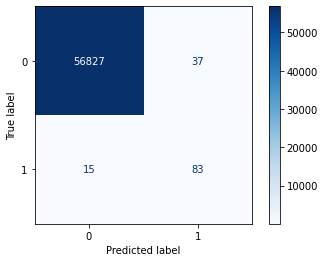

Akurasi: 0.9991
Recall: 0.8469
Precision: 0.6917
F1 Score: 0.7615

🔹 Confusion Matrix with threshold 0.3:


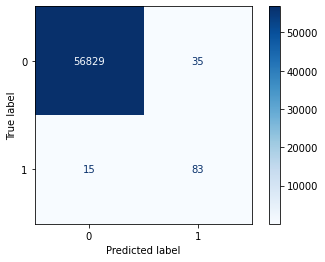

Akurasi: 0.9991
Recall: 0.8469
Precision: 0.7034
F1 Score: 0.7685

🔹 Confusion Matrix with threshold 0.4:


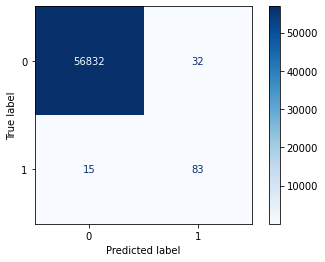

Akurasi: 0.9992
Recall: 0.8469
Precision: 0.7217
F1 Score: 0.7793

🔹 Confusion Matrix with threshold 0.5:


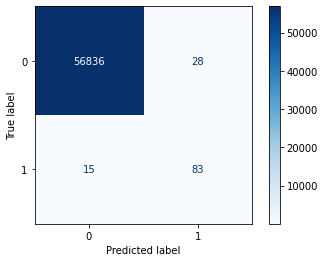

Akurasi: 0.9992
Recall: 0.8469
Precision: 0.7477
F1 Score: 0.7943

🔹 Confusion Matrix with threshold 0.6:


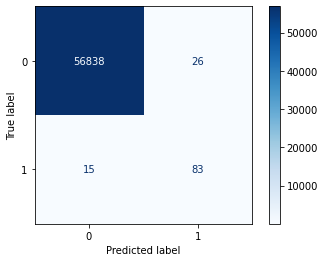

Akurasi: 0.9993
Recall: 0.8469
Precision: 0.7615
F1 Score: 0.8019

🔹 Confusion Matrix with threshold 0.7:


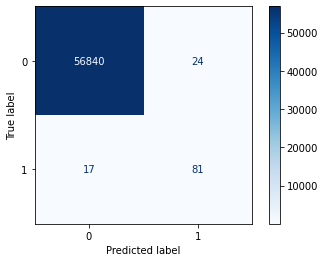

Akurasi: 0.9993
Recall: 0.8265
Precision: 0.7714
F1 Score: 0.7980

🔹 Confusion Matrix with threshold 0.8:


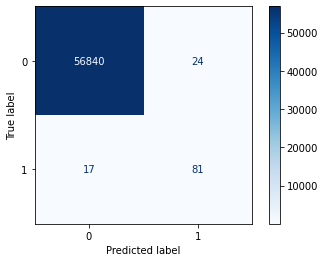

Akurasi: 0.9993
Recall: 0.8265
Precision: 0.7714
F1 Score: 0.7980

🔹 Confusion Matrix with threshold 0.9:


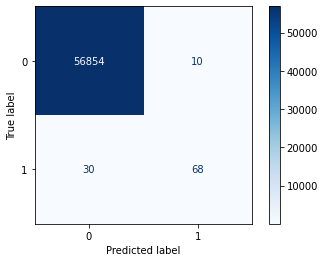

Akurasi: 0.9993
Recall: 0.6939
Precision: 0.8718
F1 Score: 0.7727


aucpr, precision curve, recall curve: 0.8124101582419515, [0.00172045 0.00178786 0.0017879  ... 1.         1.         1.        ], [1.         1.         1.         ... 0.18367347 0.14285714 0.        ]

==================== Evaluasi SMOTE Model ====================
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 0.9986 - precision: 0.5694 - recall: 0.8367 - f1_score: 0.6777 - aucpr: 0.7948

🔹 **Metrics Evaluation before adjusting threshold: **
🔹 Test Loss: 0.0060
🔹 Test Accuracy: 0.9986
🔹 Test Precision: 0.5694
🔹 Test Recall: 0.8367
🔹 Test F1 Score: 0.6777
🔹 Test AUCPR: 0.7948
1781/1781 [==============================] - 1s 442us/step
[1.3188920e-05 5.9200210e-07 6.1695125e-08 ... 2.5944561e-11 3.4145042e-09
 3.3730835e-06]

Latency After hyperparameter tuning with threshold 0.1: 1.137758 sec

Latency After hyperparameter tuning with threshold 0.2: 1.137689 sec

Latency After hyperp

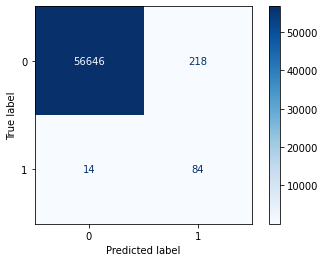

Akurasi: 0.9959
Recall: 0.8571
Precision: 0.2781
F1 Score: 0.4200

🔹 Confusion Matrix with threshold 0.2:


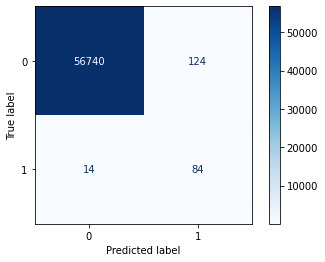

Akurasi: 0.9976
Recall: 0.8571
Precision: 0.4038
F1 Score: 0.5490

🔹 Confusion Matrix with threshold 0.3:


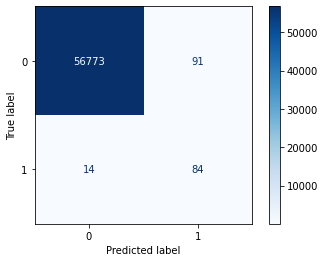

Akurasi: 0.9982
Recall: 0.8571
Precision: 0.4800
F1 Score: 0.6154

🔹 Confusion Matrix with threshold 0.4:


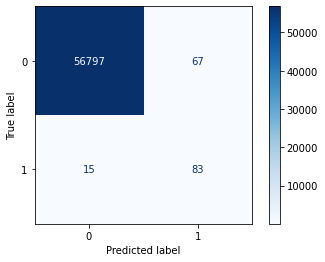

Akurasi: 0.9986
Recall: 0.8469
Precision: 0.5533
F1 Score: 0.6694

🔹 Confusion Matrix with threshold 0.5:


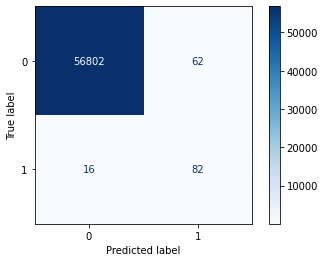

Akurasi: 0.9986
Recall: 0.8367
Precision: 0.5694
F1 Score: 0.6777

🔹 Confusion Matrix with threshold 0.6:


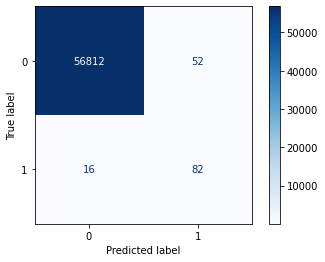

Akurasi: 0.9988
Recall: 0.8367
Precision: 0.6119
F1 Score: 0.7069

🔹 Confusion Matrix with threshold 0.7:


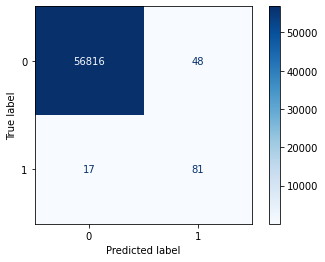

Akurasi: 0.9989
Recall: 0.8265
Precision: 0.6279
F1 Score: 0.7137

🔹 Confusion Matrix with threshold 0.8:


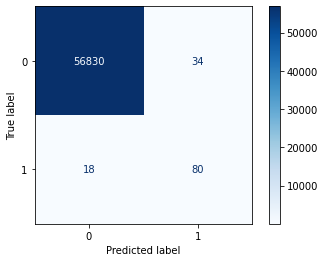

Akurasi: 0.9991
Recall: 0.8163
Precision: 0.7018
F1 Score: 0.7547

🔹 Confusion Matrix with threshold 0.9:


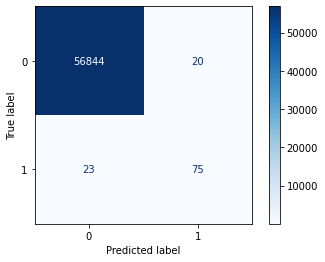

Akurasi: 0.9992
Recall: 0.7653
Precision: 0.7895
F1 Score: 0.7772


aucpr, precision curve, recall curve: 0.8115028673870562, [0.00172045 0.0017206  0.00172063 ... 1.         1.         1.        ], [1.         1.         1.         ... 0.05102041 0.04081633 0.        ]

==================== Evaluasi Adasyn Model ====================
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0089 - accuracy: 0.9988 - precision: 0.6194 - recall: 0.8469 - f1_score: 0.7155 - aucpr: 0.7237

🔹 **Metrics Evaluation before adjusting threshold: **
🔹 Test Loss: 0.0089
🔹 Test Accuracy: 0.9988
🔹 Test Precision: 0.6194
🔹 Test Recall: 0.8469
🔹 Test F1 Score: 0.7155
🔹 Test AUCPR: 0.7237
1781/1781 [==============================] - 1s 423us/step
[4.1736131e-25 1.6150897e-20 7.9423741e-02 ... 0.0000000e+00 2.3907541e-11
 3.0221642e-04]

Latency After hyperparameter tuning with threshold 0.1: 1.093138 sec

Latency After hyperparameter tuning with threshold 0.2: 1.093067 sec

Latency After hyper

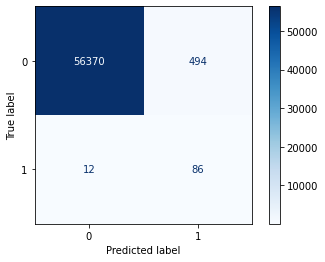

Akurasi: 0.9911
Recall: 0.8776
Precision: 0.1483
F1 Score: 0.2537

🔹 Confusion Matrix with threshold 0.2:


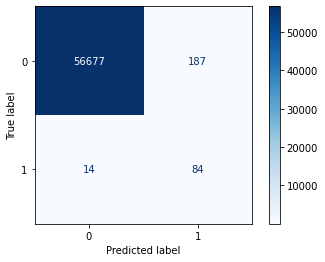

Akurasi: 0.9965
Recall: 0.8571
Precision: 0.3100
F1 Score: 0.4553

🔹 Confusion Matrix with threshold 0.3:


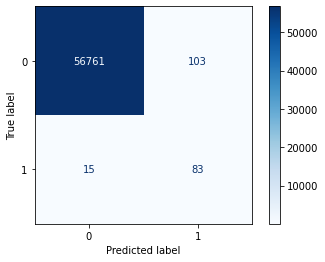

Akurasi: 0.9979
Recall: 0.8469
Precision: 0.4462
F1 Score: 0.5845

🔹 Confusion Matrix with threshold 0.4:


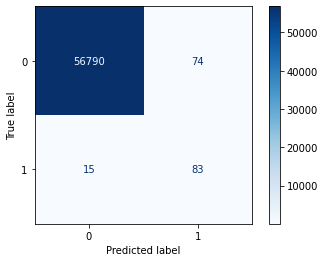

Akurasi: 0.9984
Recall: 0.8469
Precision: 0.5287
F1 Score: 0.6510

🔹 Confusion Matrix with threshold 0.5:


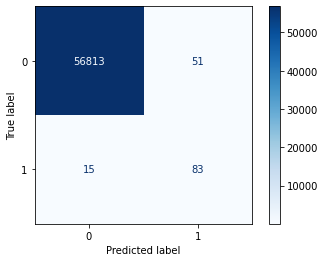

Akurasi: 0.9988
Recall: 0.8469
Precision: 0.6194
F1 Score: 0.7155

🔹 Confusion Matrix with threshold 0.6:


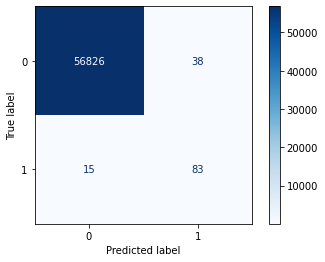

Akurasi: 0.9991
Recall: 0.8469
Precision: 0.6860
F1 Score: 0.7580

🔹 Confusion Matrix with threshold 0.7:


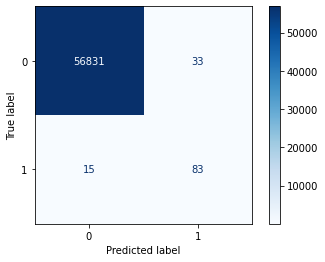

Akurasi: 0.9992
Recall: 0.8469
Precision: 0.7155
F1 Score: 0.7757

🔹 Confusion Matrix with threshold 0.8:


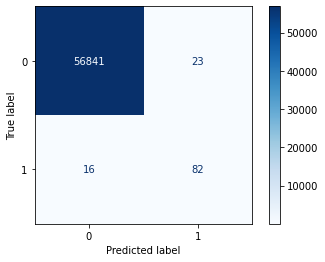

Akurasi: 0.9993
Recall: 0.8367
Precision: 0.7810
F1 Score: 0.8079

🔹 Confusion Matrix with threshold 0.9:


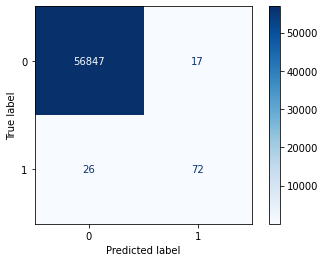

Akurasi: 0.9992
Recall: 0.7347
Precision: 0.8090
F1 Score: 0.7701


aucpr, precision curve, recall curve: 0.7309549545680998, [0.00172045 0.0018019  0.00180193 ... 1.         1.         1.        ], [1.         1.         1.         ... 0.03061224 0.02040816 0.        ]

==================== Evaluasi RUS Model ====================
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0047 - accuracy: 0.9987 - precision: 0.5985 - recall: 0.8061 - f1_score: 0.6870 - aucpr: 0.6991

🔹 **Metrics Evaluation before adjusting threshold: **
🔹 Test Loss: 0.0047
🔹 Test Accuracy: 0.9987
🔹 Test Precision: 0.5985
🔹 Test Recall: 0.8061
🔹 Test F1 Score: 0.6870
🔹 Test AUCPR: 0.6991
1781/1781 [==============================] - 1s 438us/step
[0.00030748 0.00036241 0.00406381 ... 0.00035284 0.00035772 0.00997826]

Latency After hyperparameter tuning with threshold 0.1: 1.124637 sec

Latency After hyperparameter tuning with threshold 0.2: 1.124565 sec

Latency After hyperparameter tuning with 

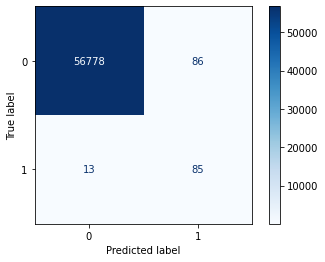

Akurasi: 0.9983
Recall: 0.8673
Precision: 0.4971
F1 Score: 0.6320

🔹 Confusion Matrix with threshold 0.2:


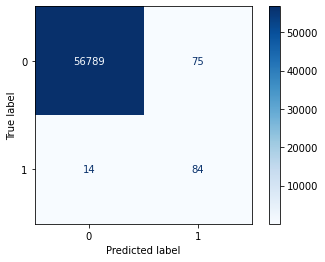

Akurasi: 0.9984
Recall: 0.8571
Precision: 0.5283
F1 Score: 0.6537

🔹 Confusion Matrix with threshold 0.3:


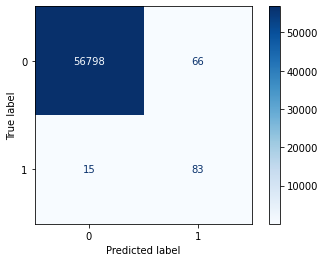

Akurasi: 0.9986
Recall: 0.8469
Precision: 0.5570
F1 Score: 0.6721

🔹 Confusion Matrix with threshold 0.4:


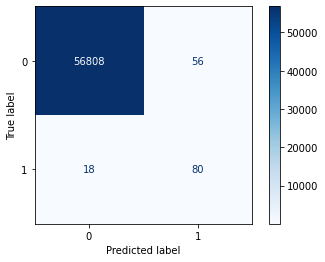

Akurasi: 0.9987
Recall: 0.8163
Precision: 0.5882
F1 Score: 0.6838

🔹 Confusion Matrix with threshold 0.5:


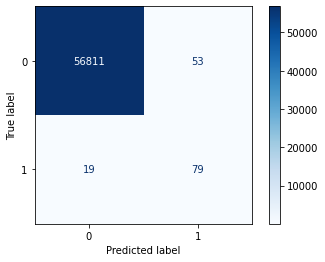

Akurasi: 0.9987
Recall: 0.8061
Precision: 0.5985
F1 Score: 0.6870

🔹 Confusion Matrix with threshold 0.6:


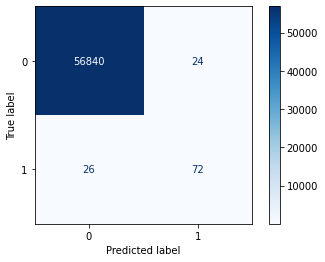

Akurasi: 0.9991
Recall: 0.7347
Precision: 0.7500
F1 Score: 0.7423

🔹 Confusion Matrix with threshold 0.7:


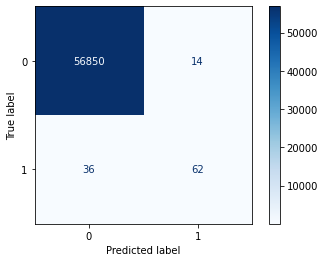

Akurasi: 0.9991
Recall: 0.6327
Precision: 0.8158
F1 Score: 0.7126

🔹 Confusion Matrix with threshold 0.8:


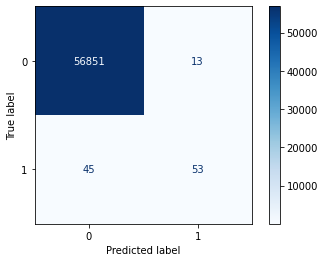

Akurasi: 0.9990
Recall: 0.5408
Precision: 0.8030
F1 Score: 0.6463

🔹 Confusion Matrix with threshold 0.9:


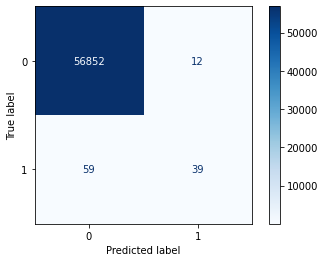

Akurasi: 0.9988
Recall: 0.3980
Precision: 0.7647
F1 Score: 0.5235


aucpr, precision curve, recall curve: 0.7034112756170622, [0.00172045 0.00172048 0.00172051 ... 1.         1.         1.        ], [1.         1.         1.         ... 0.02040816 0.01020408 0.        ]

==================== Evaluasi ROS + RUS Model ====================
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 0.9983 - precision: 0.4971 - recall: 0.8776 - f1_score: 0.6347 - aucpr: 0.7728

🔹 **Metrics Evaluation before adjusting threshold: **
🔹 Test Loss: 0.0062
🔹 Test Accuracy: 0.9983
🔹 Test Precision: 0.4971
🔹 Test Recall: 0.8776
🔹 Test F1 Score: 0.6347
🔹 Test AUCPR: 0.7728
1781/1781 [==============================] - 1s 442us/step
[3.0895877e-09 1.1171814e-12 8.4641781e-12 ... 4.5514474e-16 8.1544488e-07
 1.9443425e-09]

Latency After hyperparameter tuning with threshold 0.1: 1.138831 sec

Latency After hyperparameter tuning with threshold 0.2: 1.138789 sec

Latency After hy

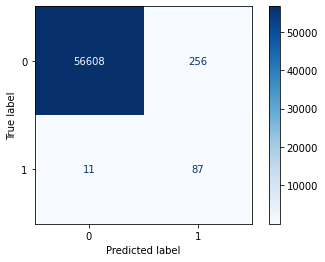

Akurasi: 0.9953
Recall: 0.8878
Precision: 0.2536
F1 Score: 0.3946

🔹 Confusion Matrix with threshold 0.2:


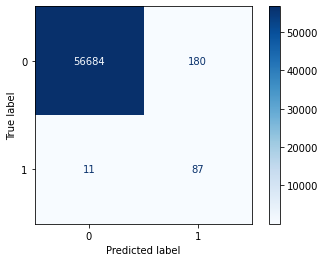

Akurasi: 0.9966
Recall: 0.8878
Precision: 0.3258
F1 Score: 0.4767

🔹 Confusion Matrix with threshold 0.3:


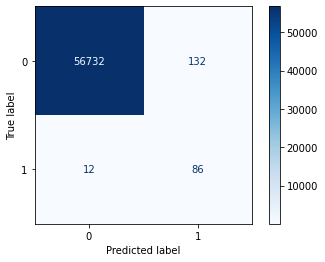

Akurasi: 0.9975
Recall: 0.8776
Precision: 0.3945
F1 Score: 0.5443

🔹 Confusion Matrix with threshold 0.4:


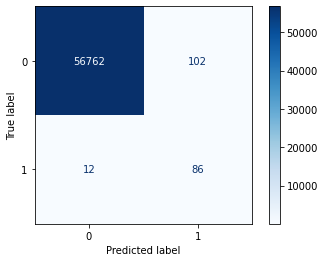

Akurasi: 0.9980
Recall: 0.8776
Precision: 0.4574
F1 Score: 0.6014

🔹 Confusion Matrix with threshold 0.5:


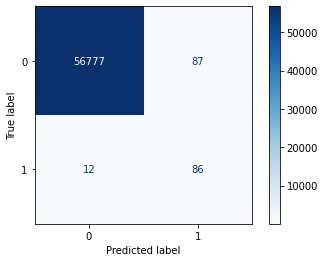

Akurasi: 0.9983
Recall: 0.8776
Precision: 0.4971
F1 Score: 0.6347

🔹 Confusion Matrix with threshold 0.6:


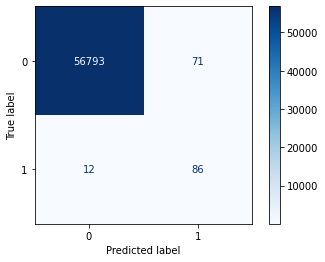

Akurasi: 0.9985
Recall: 0.8776
Precision: 0.5478
F1 Score: 0.6745

🔹 Confusion Matrix with threshold 0.7:


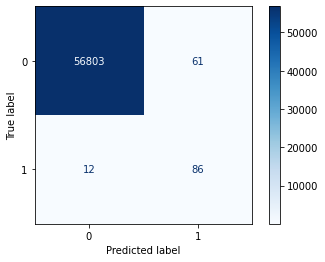

Akurasi: 0.9987
Recall: 0.8776
Precision: 0.5850
F1 Score: 0.7020

🔹 Confusion Matrix with threshold 0.8:


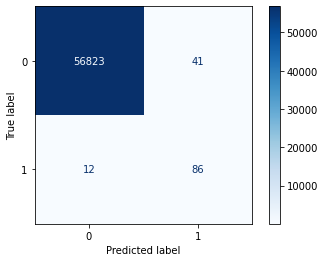

Akurasi: 0.9991
Recall: 0.8776
Precision: 0.6772
F1 Score: 0.7644

🔹 Confusion Matrix with threshold 0.9:


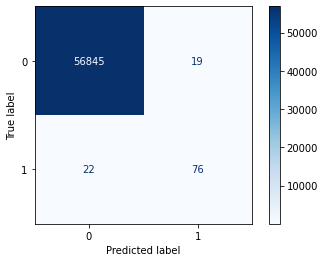

Akurasi: 0.9993
Recall: 0.7755
Precision: 0.8000
F1 Score: 0.7876


aucpr, precision curve, recall curve: 0.7791519676400587, [0.00172045 0.0017269  0.00172693 ... 1.         1.         1.        ], [1.         1.         1.         ... 0.03061224 0.02040816 0.        ]

==================== Evaluasi SMOTE + RUS Model ====================
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0036 - accuracy: 0.9992 - precision: 0.7434 - recall: 0.8571 - f1_score: 0.7962 - aucpr: 0.8493

🔹 **Metrics Evaluation before adjusting threshold: **
🔹 Test Loss: 0.0036
🔹 Test Accuracy: 0.9992
🔹 Test Precision: 0.7434
🔹 Test Recall: 0.8571
🔹 Test F1 Score: 0.7962
🔹 Test AUCPR: 0.8493
1781/1781 [==============================] - 1s 448us/step
[2.7206759e-09 9.0668053e-08 1.5067963e-07 ... 1.0510182e-14 1.6606120e-09
 2.2117230e-05]

Latency After hyperparameter tuning with threshold 0.1: 1.144593 sec

Latency After hyperparameter tuning with threshold 0.2: 1.144552 sec

Latency After 

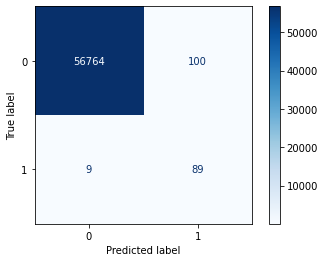

Akurasi: 0.9981
Recall: 0.9082
Precision: 0.4709
F1 Score: 0.6202

🔹 Confusion Matrix with threshold 0.2:


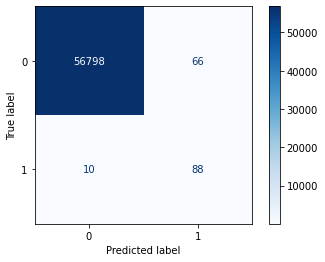

Akurasi: 0.9987
Recall: 0.8980
Precision: 0.5714
F1 Score: 0.6984

🔹 Confusion Matrix with threshold 0.3:


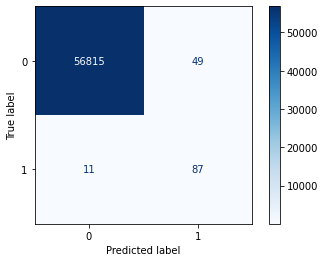

Akurasi: 0.9989
Recall: 0.8878
Precision: 0.6397
F1 Score: 0.7436

🔹 Confusion Matrix with threshold 0.4:


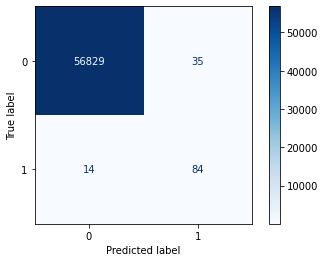

Akurasi: 0.9991
Recall: 0.8571
Precision: 0.7059
F1 Score: 0.7742

🔹 Confusion Matrix with threshold 0.5:


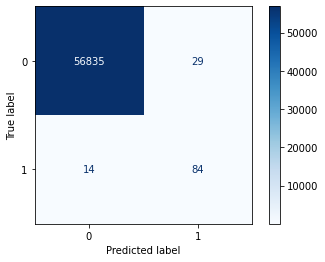

Akurasi: 0.9992
Recall: 0.8571
Precision: 0.7434
F1 Score: 0.7962

🔹 Confusion Matrix with threshold 0.6:


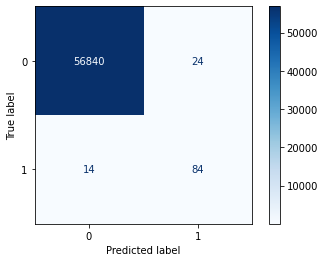

Akurasi: 0.9993
Recall: 0.8571
Precision: 0.7778
F1 Score: 0.8155

🔹 Confusion Matrix with threshold 0.7:


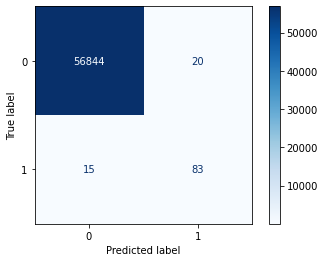

Akurasi: 0.9994
Recall: 0.8469
Precision: 0.8058
F1 Score: 0.8259

🔹 Confusion Matrix with threshold 0.8:


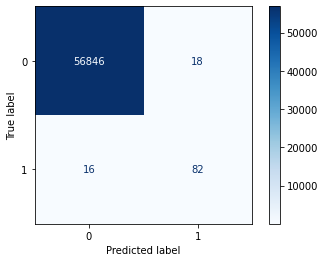

Akurasi: 0.9994
Recall: 0.8367
Precision: 0.8200
F1 Score: 0.8283

🔹 Confusion Matrix with threshold 0.9:


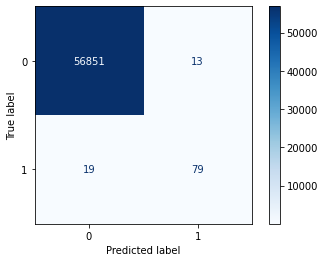

Akurasi: 0.9994
Recall: 0.8061
Precision: 0.8587
F1 Score: 0.8316


aucpr, precision curve, recall curve: 0.8579226716075948, [0.00172045 0.00172208 0.00172211 ... 1.         1.         1.        ], [1.         1.         1.         ... 0.05102041 0.03061224 0.        ]

==================== Evaluasi RUS + ROS Model ====================
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0045 - accuracy: 0.9991 - precision: 0.6885 - recall: 0.8571 - f1_score: 0.7636 - aucpr: 0.7912

🔹 **Metrics Evaluation before adjusting threshold: **
🔹 Test Loss: 0.0045
🔹 Test Accuracy: 0.9991
🔹 Test Precision: 0.6885
🔹 Test Recall: 0.8571
🔹 Test F1 Score: 0.7636
🔹 Test AUCPR: 0.7912
1781/1781 [==============================] - 1s 451us/step
[3.6691114e-07 3.8945149e-05 2.8965722e-05 ... 8.9291020e-15 1.8106938e-07
 1.9657325e-06]

Latency After hyperparameter tuning with threshold 0.1: 1.166861 sec

Latency After hyperparameter tuning with threshold 0.2: 1.166766 sec

Latency After hy

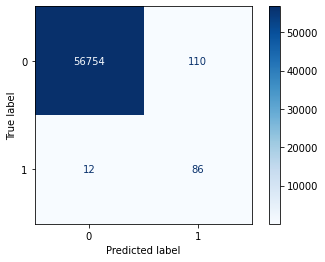

Akurasi: 0.9979
Recall: 0.8776
Precision: 0.4388
F1 Score: 0.5850

🔹 Confusion Matrix with threshold 0.2:


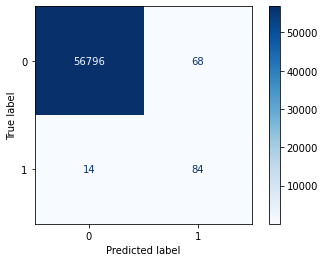

Akurasi: 0.9986
Recall: 0.8571
Precision: 0.5526
F1 Score: 0.6720

🔹 Confusion Matrix with threshold 0.3:


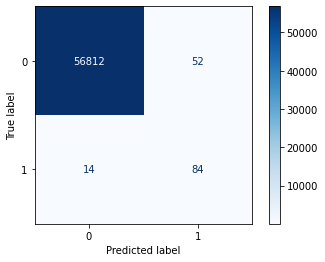

Akurasi: 0.9988
Recall: 0.8571
Precision: 0.6176
F1 Score: 0.7179

🔹 Confusion Matrix with threshold 0.4:


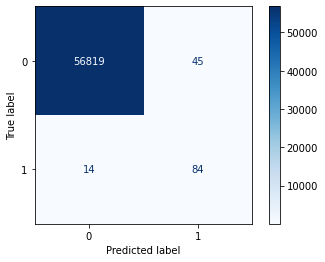

Akurasi: 0.9990
Recall: 0.8571
Precision: 0.6512
F1 Score: 0.7401

🔹 Confusion Matrix with threshold 0.5:


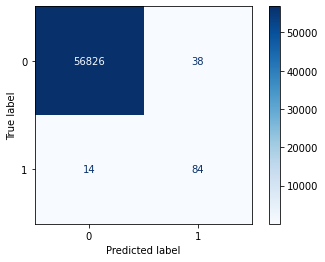

Akurasi: 0.9991
Recall: 0.8571
Precision: 0.6885
F1 Score: 0.7636

🔹 Confusion Matrix with threshold 0.6:


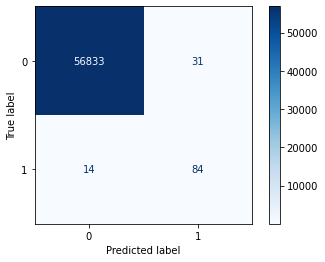

Akurasi: 0.9992
Recall: 0.8571
Precision: 0.7304
F1 Score: 0.7887

🔹 Confusion Matrix with threshold 0.7:


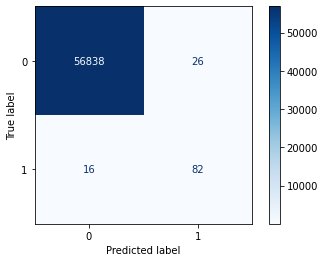

Akurasi: 0.9993
Recall: 0.8367
Precision: 0.7593
F1 Score: 0.7961

🔹 Confusion Matrix with threshold 0.8:


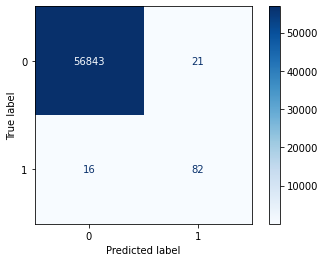

Akurasi: 0.9994
Recall: 0.8367
Precision: 0.7961
F1 Score: 0.8159

🔹 Confusion Matrix with threshold 0.9:


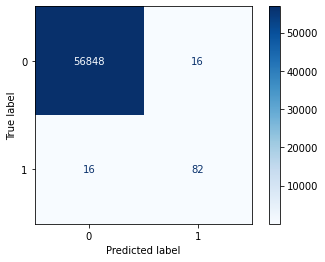

Akurasi: 0.9994
Recall: 0.8367
Precision: 0.8367
F1 Score: 0.8367


aucpr, precision curve, recall curve: 0.8343258616184533, [0.00172045 0.0017212  0.00172123 ... 1.         1.         1.        ], [1.         1.         1.         ... 0.05102041 0.04081633 0.        ]

==================== Evaluasi RUS + SMOTE Model ====================
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0048 - accuracy: 0.9993 - precision: 0.7900 - recall: 0.8061 - f1_score: 0.7980 - aucpr: 0.7713

🔹 **Metrics Evaluation before adjusting threshold: **
🔹 Test Loss: 0.0048
🔹 Test Accuracy: 0.9993
🔹 Test Precision: 0.7900
🔹 Test Recall: 0.8061
🔹 Test F1 Score: 0.7980
🔹 Test AUCPR: 0.7713
1781/1781 [==============================] - 1s 447us/step
[6.1359210e-04 5.4454165e-07 8.1447641e-20 ... 1.2477925e-06 2.7509273e-06
 9.1434233e-03]

Latency After hyperparameter tuning with threshold 0.1: 1.179645 sec

Latency After hyperparameter tuning with threshold 0.2: 1.179546 sec

Latency After 

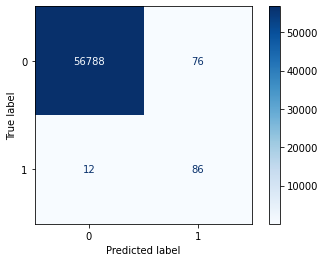

Akurasi: 0.9985
Recall: 0.8776
Precision: 0.5309
F1 Score: 0.6615

🔹 Confusion Matrix with threshold 0.2:


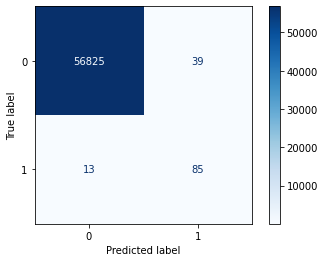

Akurasi: 0.9991
Recall: 0.8673
Precision: 0.6855
F1 Score: 0.7658

🔹 Confusion Matrix with threshold 0.3:


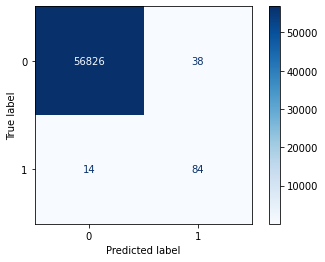

Akurasi: 0.9991
Recall: 0.8571
Precision: 0.6885
F1 Score: 0.7636

🔹 Confusion Matrix with threshold 0.4:


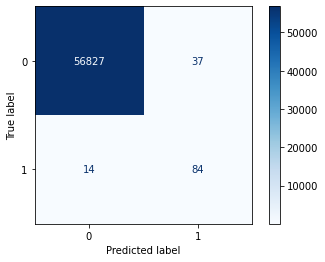

Akurasi: 0.9991
Recall: 0.8571
Precision: 0.6942
F1 Score: 0.7671

🔹 Confusion Matrix with threshold 0.5:


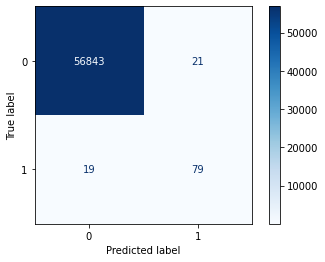

Akurasi: 0.9993
Recall: 0.8061
Precision: 0.7900
F1 Score: 0.7980

🔹 Confusion Matrix with threshold 0.6:


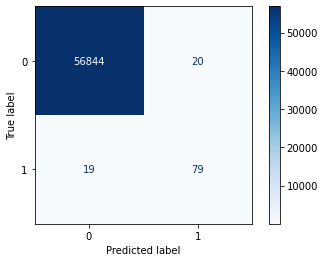

Akurasi: 0.9993
Recall: 0.8061
Precision: 0.7980
F1 Score: 0.8020

🔹 Confusion Matrix with threshold 0.7:


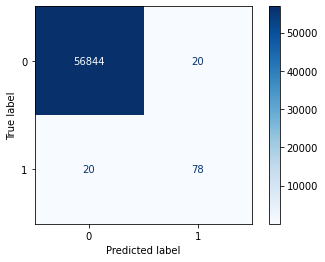

Akurasi: 0.9993
Recall: 0.7959
Precision: 0.7959
F1 Score: 0.7959

🔹 Confusion Matrix with threshold 0.8:


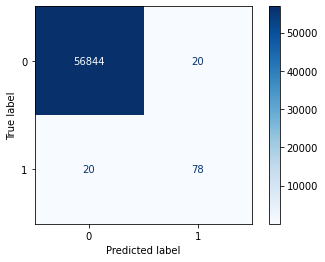

Akurasi: 0.9993
Recall: 0.7959
Precision: 0.7959
F1 Score: 0.7959

🔹 Confusion Matrix with threshold 0.9:


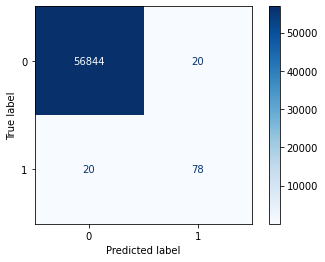

Akurasi: 0.9993
Recall: 0.7959
Precision: 0.7959
F1 Score: 0.7959


aucpr, precision curve, recall curve: 0.7436560366562419, [0.00172045 0.00172235 0.00172238 ... 1.         1.         1.        ], [1.         1.         1.         ... 0.02040816 0.01020408 0.        ]


In [107]:
# Evaluasi model 
aucpr, precision_pr, recall_pr = evaluate_model(best_model, df_X_test_selected, y_test, model_name="No Method Model")

# Evaluasi model ROS
aucpr_ros, precision_pr_ros, recall_pr_ros = evaluate_model(best_model_ros, df_X_ros_test_selected, y_test, model_name="ROS Model")

# Evaluasi model SMOTE
aucpr_smote, precision_pr_smote, recall_pr_smote = evaluate_model(best_model_smote, df_X_smote_test_selected, y_test, model_name="SMOTE Model")

# Evaluasi model Adasyn
aucpr_adaysn, precision_pr_adaysn, recall_pr_adaysn = evaluate_model(best_model_adasyn, df_X_adasyn_test_selected, y_test, model_name="Adasyn Model")

# Evaluasi model RUS
aucpr_rus, precision_pr_rus, recall_pr_rus = evaluate_model(best_model_rus, df_X_rus_test_selected, y_test, model_name="RUS Model")

# Evaluasi model ROS + RUS
aucpr_ros_to_rus, precision_pr_ros_to_rus, recall_pr_ros_to_rus = evaluate_model(best_model_ros_to_rus, df_X_ros_to_rus_test_selected, y_test, model_name="ROS + RUS Model")

# Evaluasi model SMOTE + RUS
aucpr_smote_to_rus, precision_pr_smote_to_rus, recall_pr_smote_to_rus = evaluate_model(best_model_smote_to_rus, df_X_smote_to_rus_test_selected, y_test, model_name="SMOTE + RUS Model")

# Evaluasi model RUS + ROS
aucpr_rus_to_ros, precision_pr_rus_to_ros, recall_pr_rus_to_ros = evaluate_model(best_model_rus_to_ros, df_X_rus_to_ros_test_selected, y_test, model_name="RUS + ROS Model")

# Evaluasi model RUS + SMOTE
aucpr_rus_to_smote, precision_pr_rus_to_smote, recall_pr_rus_to_smote = evaluate_model(best_model_rus_to_smote, df_X_rus_to_smote_test_selected, y_test, model_name="RUS + SMOTE Model")

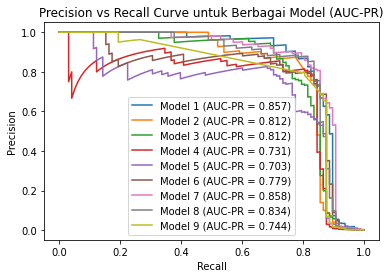

In [108]:
aucpr_all = [aucpr, aucpr_ros, aucpr_smote, aucpr_adaysn, aucpr_rus, aucpr_ros_to_rus, aucpr_smote_to_rus, aucpr_rus_to_ros, aucpr_rus_to_smote]
precision_all = [precision_pr, precision_pr_ros, precision_pr_smote, precision_pr_adaysn, precision_pr_rus, precision_pr_ros_to_rus, precision_pr_smote_to_rus, precision_pr_rus_to_ros, precision_pr_rus_to_smote]
recall_all = [recall_pr, recall_pr_ros, recall_pr_smote, recall_pr_adaysn, recall_pr_rus, recall_pr_ros_to_rus, recall_pr_smote_to_rus, recall_pr_rus_to_ros, recall_pr_rus_to_smote]
name_model = ["Model 1", "Model 2", "Model 3" ,"Model 4" ,"Model 5", "Model 6", "Model 7", "Model 8", "Model 9"]


for i in range(0, len(aucpr_all)):
    plt.plot(recall_all[i], precision_all[i], label=f'{name_model[i]} (AUC-PR = {aucpr_all[i]:.3f})')

# Menambahkan label dan judul
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall Curve untuk Berbagai Model (AUC-PR)')
plt.legend(loc='best')

# Menampilkan grafik
plt.show()

In [109]:
current_time = datetime.now()

# Mencetak waktu dalam format jam:menit:detik
print("end of testing")
print(current_time.strftime("%H:%M:%S"))

end of testing
15:53:30


In [110]:
!nvidia-smi

Sat Jun 14 15:53:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.02              Driver Version: 555.42.02      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060        Off |   00000000:2B:00.0 Off |                  N/A |
|  0%   59C    P0             36W /  183W |     838MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----